# &#x1F4D1; &nbsp; $\mathfrak {\color{#228B22} {P6:  Capstone \ Project.\ Sberbank \ Russian \ Housing \ Market}}$

----
## $\mathfrak {\color{#228B22} {0. \ Links \ and \ Code \ Library }}$
Sberbank Russian Housing Market https://www.kaggle.com/c/sberbank-russian-housing-market

Model evaluation: quantifying the quality of predictions http://scikit-learn.org/stable/modules/model_evaluation.html

In [2]:
from IPython.core.display import HTML
hide_code = ''
HTML('''<script> code_show = true;

function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else { 
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    }
    code_show = !code_show;
}

$(document).ready(code_display);</script>
<form action="javascript: code_display()">
<input style="color: #228B22; background: ghostwhite; opacity: 0.9;"
type="submit" value="Click to display or hide code"></form>''')

In [194]:
hide_code
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import scipy

import seaborn as sns
import matplotlib.pylab as plt

from random import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.model_selection import KFold, ParameterGrid, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV, BayesianRidge
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, RANSACRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

import keras as ks
from keras.models import Sequential, load_model, Model
from keras.optimizers import SGD, RMSprop
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.layers.embeddings import Embedding
from keras.wrappers.scikit_learn import KerasRegressor

In [123]:
hide_code
def regression(regressor, x_train, x_test, y_train):
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_train_reg = reg.predict(x_train)
    y_test_reg = reg.predict(x_test)
    
    return y_train_reg, y_test_reg

def loss_plot(fit_history):
    plt.figure(figsize=(18, 6))

    plt.plot(fit_history.history['loss'], color='#348ABD', label = 'train')
    plt.plot(fit_history.history['val_loss'], color='#FF7F50', label = 'test')

    plt.legend()
    plt.title('Loss Function');  
    
def mae_plot(fit_history):
    plt.figure(figsize=(18, 6))

    plt.plot(fit_history.history['mean_absolute_error'], color='#348ABD', label = 'train')
    plt.plot(fit_history.history['val_mean_absolute_error'], color='#FF7F50', label = 'test')

    plt.legend()
    plt.title('Mean Absolute Error');   

def scores(regressor, y_train, y_test, y_train_reg, y_test_reg):
    print("_______________________________________")
    print(regressor)
    print("_______________________________________")
    print("EV score. Train: ", explained_variance_score(y_train, y_train_reg))
    print("EV score. Test: ", explained_variance_score(y_test, y_test_reg))
    print("---------")
    print("R2 score. Train: ", r2_score(y_train, y_train_reg))
    print("R2 score. Test: ", r2_score(y_test, y_test_reg))
    print("---------")
    print("MSE score. Train: ", mean_squared_error(y_train, y_train_reg))
    print("MSE score. Test: ", mean_squared_error(y_test, y_test_reg))
    print("---------")
    print("MAE score. Train: ", mean_absolute_error(y_train, y_train_reg))
    print("MAE score. Test: ", mean_absolute_error(y_test, y_test_reg))
    print("---------")
    print("MdAE score. Train: ", median_absolute_error(y_train, y_train_reg))
    print("MdAE score. Test: ", median_absolute_error(y_test, y_test_reg))
    
def scores2(regressor, target, target_predict):
    print("_______________________________________")
    print(regressor)
    print("_______________________________________")
    print("EV score:", explained_variance_score(target, target_predict))
    print("---------")
    print("R2 score:", r2_score(target, target_predict))
    print("---------")
    print("MSE score:", mean_squared_error(target, target_predict))
    print("---------")
    print("MAE score:", mean_absolute_error(target, target_predict))
    print("---------")
    print("MdAE score:", median_absolute_error(target, target_predict))

----
## $\mathfrak {\color{#228B22} {1. \ Capstone \ Proposal \ Overview }}$
In this capstone project proposal, prior to completing the following **Capstone Project**, we will leverage what we've learned throughout the Nanodegree program to author a proposal for solving a problem of our choice by applying machine learning algorithms and techniques. A project proposal encompasses seven key points: 

- The project's **domain background** : the field of research where the project is derived;
- A **problem statement** : a problem being investigated for which a solution will be defined;
- The **datasets and inputs** : data or inputs being used for the problem;
- A **solution statement** : a the solution proposed for the problem given;
- A **benchmark model** : some simple or historical model or result to compare the defined solution to;
- A set of **evaluation metrics** : functional representations for how the solution can be measured;
- An outline of the **project design** : how the solution will be developed and results obtained.

----
## $\mathfrak {\color{#228B22} {2. \ Domain \ Background }}$
***Housing costs*** demand a significant investment from both consumers and developers. And when it comes to planning a budget—whether personal or corporate—the last thing anyone needs is uncertainty about one of their budgets expenses. Sberbank, Russia’s oldest and largest bank, helps their customers by making predictions about reality prices so renters, developers, and lenders are more confident when they sign a lease or purchase a building.

Although the housing market is relatively stable in Russia, the country’s volatile economy makes forecasting prices as a function of apartment characteristics a unique challenge. Complex interactions between housing features such as a number of bedrooms and location are enough to make pricing predictions complicated. Adding an unstable economy to the mix means Sberbank and their customers need more than simple regression models in their arsenal.

----
## $\mathfrak {\color{#228B22} {3. \ Problem \ Statement }}$
Sberbank is challenging programmers to develop algorithms which use a broad spectrum of features to predict real prices. Competitors will rely on a rich dataset that includes housing data and macroeconomic patterns. An accurate forecasting model will allow Sberbank to provide more certainty to their customers in an uncertain economy.

----
## $\mathfrak {\color{#228B22} {4. \ Datasets \ and \ Inputs }}$
### 4.1 Data Description (data_dictionary.txt)

#### Description by files
#### train.csv and test.csv
- *price_doc:* sale price (this is the target variable)
- *id:* transaction id
- *timestamp:* date of transaction
- *full_sq:* total area in square meters, including loggias, balconies and other non-residential areas
- *life_sq:* living area in square meters, excluding loggias, balconies and other non-residential areas
- *floor:* for apartments, floor of the building
- *max_floor:* number of floors in the building
- *material:* wall material
- *build_year:* year built
- *num_room:* number of living rooms
- *kitch_sq:* kitchen area
- *state:* apartment condition
- *product_type:* owner-occupier purchase or investment
- *sub_area:* name of the district

The dataset also includes a collection of features about each property's surrounding neighbourhood, and some features that are constant across each sub area (known as a Raion). Most of the feature names are self explanatory, with the following notes. See below for a complete list.

- *full_all:* subarea population
- *male_f, female_f:* subarea population by gender
- *young_*:* population younger than working age
- *work_*:* working-age population
- *ekder_*:* retirement-age population
- *n_m_{all|male|female}:* population between n and m years old
- *build_count_*:* buildings in the subarea by construction type or year
- *x_count_500:* the number of x within 500m of the property
- *x_part_500:* the share of x within 500m of the property
- *_sqm_:* square meters
- *cafe_count_d_price_p:* number of cafes within d meters of the property that have an average bill under p RUB
- *trc_:* shopping malls
- *prom_:* industrial zones
- *green_:* green zones
- *metro_:* subway
- *_avto_:* distances by car
- *mkad_:* Moscow Circle Auto Road
- *ttk_:* Third Transport Ring
- *sadovoe_:* Garden Ring
- *bulvar_ring_:* Boulevard Ring
- *kremlin_:* City center
- *zd_vokzaly_:* Train station
- *oil_chemistry_:* Dirty industry
- *ts_:* Power plant

#### macro.csv
A set of macroeconomic indicators, one for each date.

- *timestamp:* Transaction timestamp
- *oil_urals:* Crude Oil Urals (usd/bbl)
- *gdp_quart:* GDP
- *gdp_quart_growth:* Real GDP growth
- *cpi:* Inflation - Consumer Price Index Growth
- *ppi:* Inflation - Producer Price index Growth
- *gdp_deflator:* Inflation - GDP deflator
- *balance_trade:* Trade surplus
- *balance_trade_growth:* Trade balance (as a percentage of previous year)
- *usdrub:* Ruble/USD exchange rate
- *eurrub:* Ruble/EUR exchange rate
- *brent:* London Brent (usd/bbl)
- *net_capital_export:* Net import / export of capital
- *gdp_annual:* GDP at current prices
- *gdp_annual_growth:* GDP growth (in real terms)
- *average_provision_of_build_contract:* Provision by orders in Russia (for the developer)
- *average_provision_of_build_contract_moscow:* Provision by orders in Moscow (for the developer)
- *rts:* Index RTS / return
- *micex:* MICEX index / return
- *micex_rgbi_tr:* MICEX index for government bonds (MICEX RGBI TR) / yield
- *micex_cbi_tr:* MICEX Index corporate bonds (MICEX CBI TR) / yield
- *deposits_value:* Volume of household deposits
- *deposits_growth:* Volume growth of population's deposits
- *deposits_rate:* Average interest rate on deposits
- *mortgage_value:* Volume of mortgage loans
- *mortgage_growth:* Growth of mortgage lending
- *mortgage_rate:* Weighted average rate of mortgage loans
- *grp:* GRP of the subject of Russian Federation where Apartment is located
- *grp_growth:* Growth of gross regional product of the subject of the Russian Federation where Apartment is located
- *income_per_cap* Average income per capita 
- *real_dispos_income_per_cap_growth:* Growth in real disposable income of Population
- *salary:* Average monthly salary
- *salary_growth:* Growth of nominal wages
- *fixed_basket:* Cost of a fixed basket of consumer goods and services for inter-regional comparisons of purchasing power
- *retail_trade_turnover:* Retail trade turnover
- *retail_trade_turnover_per_cap:* Retail trade turnover per capita
- *retail_trade_turnover_growth:* Retail turnover (in comparable prices in% to corresponding period of previous year)
- *labor_force:* Size of labor force
- *unemployment:* Unemployment rate
- *employment:* Employment rate
- *invest_fixed_capital_per_cap:* Investments in fixed capital per capita
- *invest_fixed_assets:* Absolute volume of investments in fixed assets
- *profitable_enterpr_share:* Share of profitable enterprises
- *unprofitable_enterpr_share:* The share of unprofitable enterprises
- *share_own_revenues:* The share of own revenues in the total consolidated budget revenues
- *overdue_wages_per_cap:* Overdue wages per person
- *fin_res_per_cap:* The financial results of companies per capita
- *marriages_per_1000_cap:* Number of marriages per 1,000 people
- *divorce_rate:* The divorce rate / growth rate
- *construction_value:* Volume of construction work performed (million rubles)
- *invest_fixed_assets_phys:* The index of physical volume of investment in fixed assets (in comparable prices in% to the corresponding month of Previous year)
- *pop_natural_increase:* Rate of natural increase / decrease in Population (1,000 persons)
- *pop_migration:* Migration increase (decrease) of population
- *pop_total_inc:* Total population growth
- *childbirth:* Childbirth
- *mortality:* Mortality
- *housing_fund_sqm:* Housing Fund (sqm)
- *lodging_sqm_per_cap:* Lodging (sqm / pax)
- *water_pipes_share:* Plumbing availability (pax)
- *baths_share:* Bath availability (pax)
- *sewerage_share:* Canalization availability
- *gas_share:* Gas (mains, liquefied) availability
- *hot_water_share:* Hot water availability
- *electric_stove_share:* Electric heating for the floor
- *heating_share:* Heating availability
- *old_house_share:* Proportion of old and dilapidated housing, percent
- *average_life_exp:* Average life expectancy
- *infant_mortarity_per_1000_cap:* Infant mortality rate (per 1,000 children aged up to one year)
- *perinatal_mort_per_1000_cap:* Perinatal mortality rate (per 1,000 live births)
- *incidence_population:* Overall incidence of the total population
- *rent_price_4+room_bus:* rent price for 4-room apartment, business class
- *rent_price_3room_bus:* rent price for 3-room apartment, business class
- *rent_price_2room_bus:* rent price for 2-room apartment, business class
- *rent_price_1room_bus:* rent price for 1-room apartment, business class
- *rent_price_3room_eco:* rent price for 3-room apartment, econom class
- *rent_price_2room_eco:* rent price for 2-room apartment, econom class
- *rent_price_1room_eco:* rent price for 1-room apartment, econom class
- *load_of_teachers_preschool_per_teacher:* Load of teachers of preschool educational institutions (number of children per 100 teachers)
- *child_on_acc_pre_school:* Number of children waiting for the determination to pre-school educational institutions, for capacity of 100
- *load_of_teachers_school_per_teacher:* Load on teachers in high school (number of pupils in hugh school for 100 teachers)
- *students_state_oneshift:* Proportion of pupils in high schools with one shift, of the total number of pupils in high schools
- *modern_education_share:* Share of state (municipal) educational organizations, corresponding to modern requirements of education in the total number of high schools
- *old_education_build_share:* The share of state (municipal) educational organizations, buildings are in disrepair and in need of major repairs of the total number
- *provision_doctors:* Provision (relative number) of medical doctors in area
- *provision_nurse:* Provision of nursing staff
- *load_on_doctors:* The load on doctors (number of visits per physician)
- *power_clinics:* Capacity of outpatient clinics
- *hospital_beds_available_per_cap:* Availability of hospital beds per 100 000 persons
- *hospital_bed_occupancy_per_year:* Average occupancy rate of the hospital beds during a year
- *provision_retail_space_sqm:* Retail space
- *provision_retail_space_modern_sqm:* Provision of population with retail space of modern formats, square meter
- *retail_trade_turnover_per_cap:* Retail trade turnover per capita
- *turnover_catering_per_cap:* Turnover of catering industry per person
- *theaters_viewers_per_1000_cap:* Number of theaters viewers per 1000 population
- *seats_theather_rfmin_per_100000_cap:* Total number of seats in Auditorium of the Ministry of Culture Russian theaters per 100,000 population
- *museum_visitis_per_100_cap:* Number of visits to museums per 1000 of population
- *bandwidth_sports:* Capacity of sports facilities
- *population_reg_sports_share:* Proportion of population regularly doing  sports
- *students_reg_sports_share:* Proportion of pupils and students regularly doing sports in the total number
- *apartment_build:* City residential apartment construction
- *apartment_fund_sqm:* City residential apartment fund 

#### Complete description of neighbourhood features
- *area_m*	Area mun. area, sq.m.
- *raion_popul*	Number of municipality population. district
- *green_zone_part*	Proportion of area of greenery in the total area
- *indust_part*	Share of industrial zones in area of the total area
- *children_preschool*	Number of pre-school age population
- *preschool_quota*	Number of seats in pre-school organizations
- *preschool_education_centers_raion*	Number of pre-school  institutions
- *children_school*	Population of school-age children
- *school_quota*	Number of high school seats in area
- *school_education_centers_raion*	Number of  high school institutions
- *school_education_centers_top_20_raion*	Number of high schools of the top 20 best schools in Moscow
- *hospital_beds_raion*	Number of hospital beds for the district
- *healthcare_centers_raion*	Number of healthcare centers in district
- *university_top_20_raion*	Number of higher education institutions in the top ten ranking of the Federal rank
- *sport_objects_raion*	Number of higher education institutions
- *additional_education_raion*	Number of additional education organizations
- *culture_objects_top_25*	Presence of the key objects of cultural heritage (significant objects for the level of the RF constituent entities, city)
- *culture_objects_top_25_raion*	Number of  objects of cultural heritage
- *shopping_centers_raion*	Number of malls and shopping centres in district
- *office_raion*	Number of office centres in district
- *thermal_power_plant_raion*	Presence of thermal power station in district
- *incineration_raion*	Presence of incinerators
- *oil_chemistry_raion*	Presence of dirty industries
- *radiation_raion*	Presence of radioactive waste disposal
- *railroad_terminal_raion*	Presence of the railroad terminal in district
- *big_market_raion*	Presence of large grocery / wholesale markets
- *nuclear_reactor_raion*	Presence of existing nuclear reactors
- *detention_facility_raion*	Presence of detention centers, prisons
- *full_all*	Total number of  population in the municipality
----
- *male_f*	Male population
- *female_f*	Female population
- *young_all*	Population younger than working age
- *young_male*	Male population younger than working age 
- *young_female*	Feale population younger than working age 
- *work_all*	Working-age population
- *work_male*	Male working-age population
- *work_female*	Female working-age population
- *ekder_all*	Population older than  working age
- *ekder_male*	Male population older than  working age
- *ekder_female*	Female population older than  working age
- *0_6_all*	Population aged 0-6
- *0_6_male*	Male population aged 0-7
- *0_6_female*	Female population aged 0-8
- *7_14_all*	Population aged  7-14
- *7_14_male*	Male population aged 7-14
- *7_14_female*	Female population aged 7-14
- *0_17_all*	Population aged 0-17
- *0_17_male*	Male population aged 0-17
- *0_17_female*	Female population aged 0-17
- *16_29_all*	Population aged 16-19
- *16_29_male*	Male population aged 16-19
- *16_29_female*	Female population aged 16-19
- *0_13_all*	Population aged 0-13
- *0_13_male*	Male population aged 0-13
- *0_13_female*	Female population aged 0-13
- *raion_build_count_with_material_info*	Number of building with material info in district
- *build_count_block*	Share of block buildings
- *build_count_wood*	Share of wood buildings
- *build_count_frame*	Share of frame buildings
- *build_count_brick*	Share of brick buildings
- *build_count_monolith*	Share of monolith buildings
- *build_count_panel*	Share of panel buildings
- *build_count_foam*	Share of foam buildings
- *build_count_slag*	Share of slag buildings
- *build_count_mix*	Share of mixed buildings
- *raion_build_count_with_builddate_info*	Number of building with build year info in district
- *build_count_before_1920*	Share of before_1920 buildings
- *build_count_1921-1945*	Share of 1921-1945 buildings
- *build_count_1946-1970*	Share of 1946-1970 buildings
- *build_count_1971-1995*	Share of 1971-1995 buildings
- *build_count_after_1995*	Share of after_1995 buildings
- *7_14_male*	Male population aged 7-14
- *7_14_female*	Female population aged 7-14
- *0_17_all*	Population aged 0-17
- *0_17_male*	Male population aged 0-17
- *0_17_female*	Female population aged 0-17
- *16_29_all*	Population aged 16-19
- *16_29_male*	Male population aged 16-19
- *16_29_female*	Female population aged 16-19
- *0_13_all*	Population aged 0-13
- *0_13_male*	Male population aged 0-13
- *0_13_female*	Female population aged 0-13
----
- *metro_min_avto*	Time to subway by car, min.
- *metro_km_avto*	Distance to subway by car, km
- *metro_min_walk*	Time to metro by foot
- *metro_km_walk*	Distance to the metro, km
- *kindergarten_km*	Distance to kindergarten
- *school_km*	Distance to high school 
- *park_km*	Distance to park
- *green_zone_km*	Distance to green zone
- *industrial_zone_km*	Distance to industrial zone
- *water_treatment_km*	Distance to water treatment
- *cemetery_km*	Distance to the cemetery
- *incineration_km*	Distance to the incineration
- *railroad_station_walk_km*	Distance to the railroad station (walk)
- *railroad_station_walk_min*	Time to the railroad station (walk)
- *ID_railroad_station_walk*	Nearest railroad station id (walk)
- *railroad_station_avto_km*	Distance to the railroad station (avto)
- *railroad_station_avto_min*	Time to the railroad station (avto)
- *ID_railroad_station_avto*	Nearest railroad station id (avto)
- *public_transport_station_km*	Distance to the public transport station (walk)
- *public_transport_station_min_walk*	Time to the public transport station (walk)
- *water_km*	Distance to the water reservoir / river
- *water_1line*	First line to the river (150 m)
- *mkad_km*	Distance to MKAD (Moscow Circle Auto Road)
- *ttk_km*	Distance to the TTC (Third Transport Ring)
- *sadovoe_km*	Distance to the Garden Ring
- *bulvar_ring_km*	The distance to the Boulevard Ring
- *kremlin_km*	Distance to the city center (Kremlin)
- *big_road1_km*	Distance to Nearest major road
- *ID_big_road1*	Nearest big road id
- *big_road1_1line*	First line to the road (100 m for highwys, 250 m to MKAD)
- *big_road2_km*	The distance to next distant major road
- *ID_big_road2*	2nd nearest big road id
- *railroad_km*	Distance to the railway / Moscow Central Ring / open areas Underground
- *railroad_1line*	First line to the railway (100 m)
- *zd_vokzaly_avto_km*	Distance to train station
- *ID_railroad_terminal*	Nearest railroad terminal id
- *bus_terminal_avto_km*	Distance to bus terminal (avto)
- *ID_bus_terminal*	Nearest bus terminal id
- *oil_chemistry_km*	Distance to dirty industries
- *nuclear_reactor_km*	Distance to nuclear reactor
- *radiation_km*	Distance to burial of radioactive waste
- *power_transmission_line_km*	Distance to power transmission line
- *thermal_power_plant_km*	Distance to thermal power plant
- *ts_km*	Distance to power station
- *big_market_km*	Distance to grocery / wholesale markets
- *market_shop_km*	Distance to markets and department stores
- *fitness_km*	Distance to fitness
- *swim_pool_km*	Distance to swimming pool
- *ice_rink_km*	Distance to ice palace
- *stadium_km*	Distance to stadium
- *basketball_km*	Distance to the basketball courts
- *hospice_morgue_km*	Distance to hospice/morgue
- *detention_facility_km*	Distance to detention facility
- *public_healthcare_km*	Distance to public healthcare
- *university_km*	Distance to universities
- *workplaces_km*	Distance to workplaces
- *shopping_centers_km*	Distance to shopping centers
- *office_km*	Distance to business centers/ offices
- *additional_education_km*	Distance to additional education
- *preschool_km*	Distance to preschool education organizations
- *big_church_km*	Distance to large church
- *church_synagogue_km*	Distance to Christian chirches and Synagogues
- *mosque_km*	Distance to mosques
- *theater_km*	Distance to theater
- *museum_km*	Distance to museums
- *exhibition_km*	Distance to exhibition
- *catering_km*	Distance to catering
- *ecology*	Ecological zone where the house is located
----
- *green_part_500*	The share of green zones in 500 meters zone
- *prom_part_500*	The share of industrial zones in 500 meters zone
- *office_count_500*	The number of office space in 500 meters zone
- *office_sqm_500*	The square of office space in 500 meters zone
- *trc_count_500*	The number of shopping malls in 500 meters zone
- *trc_sqm_500*	The square of shopping malls in 500 meters zone
- *cafe_count_500*	The number of cafes or restaurants in 500 meters zone
- *cafe_sum_500_min_price_avg*	Cafes and restaurant min average bill in 500 meters zone
- *cafe_sum_500_max_price_avg*	Cafes and restaurant max average bill in 500 meters zone
- *cafe_avg_price_500*	Cafes and restaurant average bill in 500 meters zone
- *cafe_count_500_na_price*	Cafes and restaurant bill N/A in 500 meters zone
- *cafe_count_500_price_500*	Cafes and restaurant bill, average under 500 in 500 meters zone
- *cafe_count_500_price_1000*	Cafes and restaurant bill, average  500-1000 in 500 meters zone
- *cafe_count_500_price_1500*	Cafes and restaurant bill, average  1000-1500 in 500 meters zone
- *cafe_count_500_price_2500*	Cafes and restaurant bill, average  1500-2500 in 500 meters zone
- *cafe_count_500_price_4000*	Cafes and restaurant bill, average  2500-4000 in 500 meters zone
- *cafe_count_500_price_high*	Cafes and restaurant bill, average  over 4000 in 500 meters zone
- *big_church_count_500*	The number of big churchs in 500 meters zone
- *church_count_500*	The number of churchs in 500 meters zone
- *mosque_count_500*	The number of mosques in 500 meters zone
- *leisure_count_500*	The number of leisure facilities in 500 meters zone
- *sport_count_500*	The number of sport facilities in 500 meters zone
- *market_count_500*	The number of markets in 500 meters zone
- *green_part_1000*	The share of green zones in 1000 meters zone
- *prom_part_1000*	The share of industrial zones in 1000 meters zone
- *office_count_1000*	The number of office space in 1000 meters zone
- *office_sqm_1000*	The square of office space in 1000 meters zone
- *trc_count_1000*	The number of shopping malls in 1000 meters zone
- *trc_sqm_1000*	The square of shopping malls in 1000 meters zone
- *cafe_count_1000*	The number of cafes or restaurants in 1000 meters zone
- *cafe_sum_1000_min_price_avg*	Cafes and restaurant min average bill in 1000 meters zone
- *cafe_sum_1000_max_price_avg*	Cafes and restaurant max average bill in 1000 meters zone
- *cafe_avg_price_1000*	Cafes and restaurant average bill in 1000 meters zone
- *cafe_count_1000_na_price*	Cafes and restaurant bill N/A in 1000 meters zone
- *cafe_count_1000_price_500*	Cafes and restaurant bill, average under 500 in 1000 meters zone
- *cafe_count_1000_price_1000*	Cafes and restaurant bill, average  500-1000 in 1000 meters zone
- *cafe_count_1000_price_1500*	Cafes and restaurant bill, average  1000-1500 in 1000 meters zone
- *cafe_count_1000_price_2500*	Cafes and restaurant bill, average  1500-2500 in 1000 meters zone
- *cafe_count_1000_price_4000*	Cafes and restaurant bill, average  2500-4000 in 1000 meters zone
- *cafe_count_1000_price_high*	Cafes and restaurant bill, average  over 4000 in 1000 meters zone
- *big_church_count_1000*	The number of big churchs in 1000 meters zone
- *church_count_1000*	The number of churchs in 1000 meters zone
- *mosque_count_1000*	The number of mosques in 1000 meters zone
- *leisure_count_1000*	The number of leisure facilities in 1000 meters zone
- *sport_count_1000*	The number of sport facilities in 1000 meters zone
- *market_count_1000*	The number of markets in 1000 meters zone
- *green_part_1500*	The share of green zones in 1500 meters zone
- *prom_part_1500*	The share of industrial zones in 1500 meters zone
- *office_count_1500*	The number of office space in 1500 meters zone
- *office_sqm_1500*	The square of office space in 1500 meters zone
- *trc_count_1500*	The number of shopping malls in 1500 meters zone
- *trc_sqm_1500*	The square of shopping malls in 1500 meters zone
- *cafe_count_1500*	The number of cafes or restaurants in 1500 meters zone
- *cafe_sum_1500_min_price_avg*	Cafes and restaurant min average bill in 1500 meters zone
- *cafe_sum_1500_max_price_avg*	Cafes and restaurant max average bill in 1500 meters zone
- *cafe_avg_price_1500*	Cafes and restaurant average bill in 1500 meters zone
- *cafe_count_1500_na_price*	Cafes and restaurant bill N/A in 1500 meters zone
- *cafe_count_1500_price_500*	Cafes and restaurant bill, average under 500 in 1500 meters zone
- *cafe_count_1500_price_1000*	Cafes and restaurant bill, average  500-1000 in 1500 meters zone
- *cafe_count_1500_price_1500*	Cafes and restaurant bill, average  1000-1500 in 1500 meters zone
- *cafe_count_1500_price_2500*	Cafes and restaurant bill, average  1500-2500 in 1500 meters zone
- *cafe_count_1500_price_4000*	Cafes and restaurant bill, average  2500-4000 in 1500 meters zone
- *cafe_count_1500_price_high*	Cafes and restaurant bill, average  over 4000 in 1500 meters zone
- *big_church_count_1500*	The number of big churchs in 1500 meters zone
- *church_count_1500*	The number of churchs in 1500 meters zone
- *mosque_count_1500*	The number of mosques in 1500 meters zone
- *leisure_count_1500*	The number of leisure facilities in 1500 meters zone
- *sport_count_1500*	The number of sport facilities in 1500 meters zone
- *market_count_1500*	The number of markets in 1500 meters zone
- *green_part_2000*	The share of green zones in 2000 meters zone
- *prom_part_2000*	The share of industrial zones in 2000 meters zone
- *office_count_2000*	The number of office space in 2000 meters zone
- *office_sqm_2000*	The square of office space in 2000 meters zone
- *trc_count_2000*	The number of shopping malls in 2000 meters zone
- *trc_sqm_2000*	The square of shopping malls in 2000 meters zone
- *cafe_count_2000*	The number of cafes or restaurants in 1500 meters zone
- *cafe_sum_2000_min_price_avg*	Cafes and restaurant min average bill in 2000 meters zone
- *cafe_sum_2000_max_price_avg*	Cafes and restaurant max average bill in 2000 meters zone
- *cafe_avg_price_2000*	Cafes and restaurant average bill in 2000 meters zone
- *cafe_count_2000_na_price*	Cafes and restaurant bill N/A in 2000 meters zone
- *cafe_count_2000_price_500*	Cafes and restaurant bill, average under 500 in 2000 meters zone
- *cafe_count_2000_price_1000*	Cafes and restaurant bill, average  500-1000 in 2000 meters zone
- *cafe_count_2000_price_1500*	Cafes and restaurant bill, average  1000-1500 in 2000 meters zone
- *cafe_count_2000_price_2500*	Cafes and restaurant bill, average  1500-2500 in 2000 meters zone
- *cafe_count_2000_price_4000*	Cafes and restaurant bill, average  2500-4000 in 2000 meters zone
- *cafe_count_2000_price_high*	Cafes and restaurant bill, average  over 4000 in 2000 meters zone
- *big_church_count_2000*	The number of big churchs in 2000 meters zone
- *church_count_2000*	The number of churchs in 2000 meters zone
- *mosque_count_2000*	The number of mosques in 2000 meters zone
- *leisure_count_2000*	The number of leisure facilities in 2000 meters zone
- *sport_count_2000*	The number of sport facilities in 2000 meters zone
- *market_count_2000*	The number of markets in 2000 meters zone
- *green_part_3000*	The share of green zones in 3000 meters zone
- *prom_part_3000*	The share of industrial zones in 3000 meters zone
- *office_count_3000*	The number of office space in 3000 meters zone
- *office_sqm_3000*	The square of office space in 3000 meters zone
- *trc_count_3000*	The number of shopping malls in 3000 meters zone
- *trc_sqm_3000*	The square of shopping malls in 3000 meters zone
- *cafe_count_3000*	The number of cafes or restaurants in 1500 meters zone
- *cafe_sum_3000_min_price_avg*	Cafes and restaurant min average bill in 3000 meters zone
- *cafe_sum_3000_max_price_avg*	Cafes and restaurant max average bill in 3000 meters zone
- *cafe_avg_price_3000*	Cafes and restaurant average bill in 3000 meters zone
- *cafe_count_3000_na_price*	Cafes and restaurant bill N/A in 3000 meters zone
- *cafe_count_3000_price_500*	Cafes and restaurant bill, average under 500 in 3000 meters zone
- *cafe_count_3000_price_1000*	Cafes and restaurant bill, average  500-1000 in 3000 meters zone
- *cafe_count_3000_price_1500*	Cafes and restaurant bill, average  1000-1500 in 3000 meters zone
- *cafe_count_3000_price_2500*	Cafes and restaurant bill, average  1500-2500 in 3000 meters zone
- *cafe_count_3000_price_4000*	Cafes and restaurant bill, average  2500-4000 in 3000 meters zone
- *cafe_count_3000_price_high*	Cafes and restaurant bill, average  over 4000 in 3000 meters zone
- *big_church_count_3000*	The number of big churchs in 3000 meters zone
- *church_count_3000*	The number of churchs in 3000 meters zone
- *mosque_count_3000*	The number of mosques in 3000 meters zone
- *leisure_count_3000*	The number of leisure facilities in 3000 meters zone
- *sport_count_3000*	The number of sport facilities in 3000 meters zone
- *market_count_3000*	The number of markets in 3000 meters zone
- *green_part_5000*	The share of green zones in 5000 meters zone
- *prom_part_5000*	The share of industrial zones in 5000 meters zone
- *office_count_5000*	The number of office space in 5000 meters zone
- *office_sqm_5000*	The square of office space in 5000 meters zone
- *trc_count_5000*	The number of shopping malls in 5000 meters zone
- *trc_sqm_5000*	The square of shopping malls in 5000 meters zone
- *cafe_count_5000*	The number of cafes or restaurants in 1500 meters zone
- *cafe_sum_5000_min_price_avg*	Cafes and restaurant min average bill in 5000 meters zone
- *cafe_sum_5000_max_price_avg*	Cafes and restaurant max average bill in 5000 meters zone
- *cafe_avg_price_5000*	Cafes and restaurant average bill in 5000 meters zone
- *cafe_count_5000_na_price*	Cafes and restaurant bill N/A in 5000 meters zone
- *cafe_count_5000_price_500*	Cafes and restaurant bill, average under 500 in 5000 meters zone
- *cafe_count_5000_price_1000*	Cafes and restaurant bill, average  500-1000 in 5000 meters zone
- *cafe_count_5000_price_1500*	Cafes and restaurant bill, average  1000-1500 in 5000 meters zone
- *cafe_count_5000_price_2500*	Cafes and restaurant bill, average  1500-2500 in 5000 meters zone
- *cafe_count_5000_price_4000*	Cafes and restaurant bill, average  2500-4000 in 5000 meters zone
- *cafe_count_5000_price_high*	Cafes and restaurant bill, average  over 4000 in 5000 meters zone
- *big_church_count_5000*	The number of big churchs in 5000 meters zone
- *church_count_5000*	The number of churchs in 5000 meters zone
- *mosque_count_5000*	The number of mosques in 5000 meters zone
- *leisure_count_5000*	The number of leisure facilities in 5000 meters zone
- *sport_count_5000*	The number of sport facilities in 5000 meters zone
- *market_count_5000*	The number of markets in 5000 meters zone

### 4.2 Data Loading and Displaying

In [169]:
hide_code
macro = pd.read_csv('macro.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [170]:
hide_code
macro[100:107].T[1:15]

100        101        102        103        104  \
oil_urals                 82.87      82.87      82.87      82.87      82.87   
gdp_quart                9995.8     9995.8     9995.8     9995.8     9995.8   
gdp_quart_growth            4.1        4.1        4.1        4.1        4.1   
cpi                       319.8      319.8      319.8      319.8      319.8   
ppi                       350.2      350.2      350.2      350.2      350.2   
gdp_deflator                NaN        NaN        NaN        NaN        NaN   
balance_trade            16.604     16.604     16.604     16.604     16.604   
balance_trade_growth       14.1       14.1       14.1       14.1       14.1   
usdrub                  29.1525    29.0261       29.1    28.9194    29.0239   
eurrub                  39.2564    39.4051    39.5008    39.5233    39.3691   
brent                     84.83      84.77      84.72      86.15      87.17   
net_capital_export          NaN        NaN        NaN        NaN        NaN   
gdp_annual              38807.2    38807.2    38807.2    38807.2    38807.2   
gdp_annual_growth    -0.0782086 -0.0782086 -0.0782086 -0.0782086 -0.0782086   

                            105        106  
oil_urals                 82.87      82.87  
gdp_quart                9995.8     9995.8  
gdp_quart_growth            4.1        4.1  
cpi                       319.8      319.8  
ppi                       350.2      350.2  
gdp_deflator                NaN        NaN  
balance_trade            16.604     16.604  
balance_trade_growth       14.1       14.1  
usdrub                   29.092     29.092  
eurrub                  39.2524    39.2524  
brent                     85.99      85.99  
net_capital_export          NaN        NaN  
gdp_annual              38807.2    38807.2  
gdp_annual_growth    -0.0782086 -0.0782086

In [171]:
hide_code
train[200:207].T[1:15]

200             201         202             203  \
timestamp       2011-10-25      2011-10-25  2011-10-25      2011-10-25   
full_sq                 38              33          30              76   
life_sq                 19              14          18              51   
floor                   15               8           3               2   
max_floor              NaN             NaN         NaN             NaN   
material               NaN             NaN         NaN             NaN   
build_year             NaN             NaN         NaN             NaN   
num_room               NaN             NaN         NaN             NaN   
kitch_sq               NaN             NaN         NaN             NaN   
state                  NaN             NaN         NaN             NaN   
product_type    Investment      Investment  Investment      Investment   
sub_area      Horoshevskoe  Juzhnoe Butovo     Marfino  Juzhnoportovoe   
area_m         8.56843e+06     2.61551e+07  2.1044e+06     4.57959e+06   
raion_popul          56535          178264       26943           71715   

                               204          205          206  
timestamp               2011-10-26   2011-10-26   2011-10-26  
full_sq                         44           35           72  
life_sq                         29           21           45  
floor                            8            5           10  
max_floor                      NaN          NaN          NaN  
material                       NaN          NaN          NaN  
build_year                     NaN          NaN          NaN  
num_room                       NaN          NaN          NaN  
kitch_sq                       NaN          NaN          NaN  
state                          NaN          NaN          NaN  
product_type            Investment   Investment   Investment  
sub_area      Vostochnoe Izmajlovo    Lefortovo   Krylatskoe  
area_m                     3.8e+06  8.99364e+06  1.21645e+07  
raion_popul                  76308        89971        78507

In [172]:
hide_code
test[100:107].T[1:15]

100          101          102          103  \
timestamp              2015-07-08   2015-07-08   2015-07-08   2015-07-08   
full_sq                      48.9         37.5         39.8         39.4   
life_sq                      31.2         18.8         18.9         25.4   
floor                           4           11            6            1   
max_floor                      14           17           14            5   
material                        5            1            1            2   
build_year                   1974          NaN          NaN         1968   
num_room                        2            1            2            2   
kitch_sq                      8.9          8.4          9.8          5.4   
state                           2            2            3            3   
product_type           Investment   Investment   Investment   Investment   
sub_area      Vostochnoe Degunino   Krylatskoe   Nekrasovka   Pechatniki   
area_m                3.87544e+06  1.21645e+07  1.13917e+07  1.84458e+07   
raion_popul                 94564        78507        19940        83369   

                                    104          105          106  
timestamp                    2015-07-08   2015-07-08   2015-07-09  
full_sq                           54.99         47.8         36.6  
life_sq                             NaN         46.1         21.3  
floor                                 3            8            1  
max_floor                             3           12            9  
material                              1            1            1  
build_year                         2015         1975         1978  
num_room                              2            2            1  
kitch_sq                              1          6.7          6.4  
state                               NaN            3            2  
product_type              OwnerOccupier   Investment   Investment  
sub_area      Poselenie Novofedorovskoe     Otradnoe     Bibirevo  
area_m                      1.48702e+08  1.00531e+07  6.40758e+06  
raion_popul                        6161       175518       155572

----
## $\mathfrak {\color{#228B22} {5. \ Solution \ Statement }}$
### 5.1 Selection of Features

In [173]:
hide_code
X_list_num = ['full_sq', 'num_room', 'floor', 'area_m', 
              'timestamp',
              'preschool_education_centers_raion', 'school_education_centers_raion', 
              'children_preschool', 'children_school',
              'shopping_centers_raion', 'healthcare_centers_raion', 
              'office_raion', 'sport_objects_raion',
              'public_transport_station_min_walk', 
              'railroad_station_walk_min', 'railroad_station_avto_km', 'bus_terminal_avto_km',
              'cafe_count_500',
              'kremlin_km', 'workplaces_km', 
              'ID_metro', 'metro_km_avto', 'metro_min_walk', 
              'public_healthcare_km', 'shopping_centers_km', 'big_market_km',
              'fitness_km', 'swim_pool_km', 'stadium_km', 'park_km',
              'kindergarten_km', 'school_km', 'preschool_km', 'university_km', 'additional_education_km',
              'theater_km', 'exhibition_km', 'museum_km', 
              'big_road1_km', 'big_road2_km',
              'detention_facility_km', 'cemetery_km', 'oil_chemistry_km', 'radiation_km',
              'raion_popul', 'work_all', 'young_all', 'ekder_all']

X_list_cat = ['sub_area', 'ecology', 'big_market_raion']

features_train = train[X_list_num]
features_test = test[X_list_num]
target_train = train['price_doc']

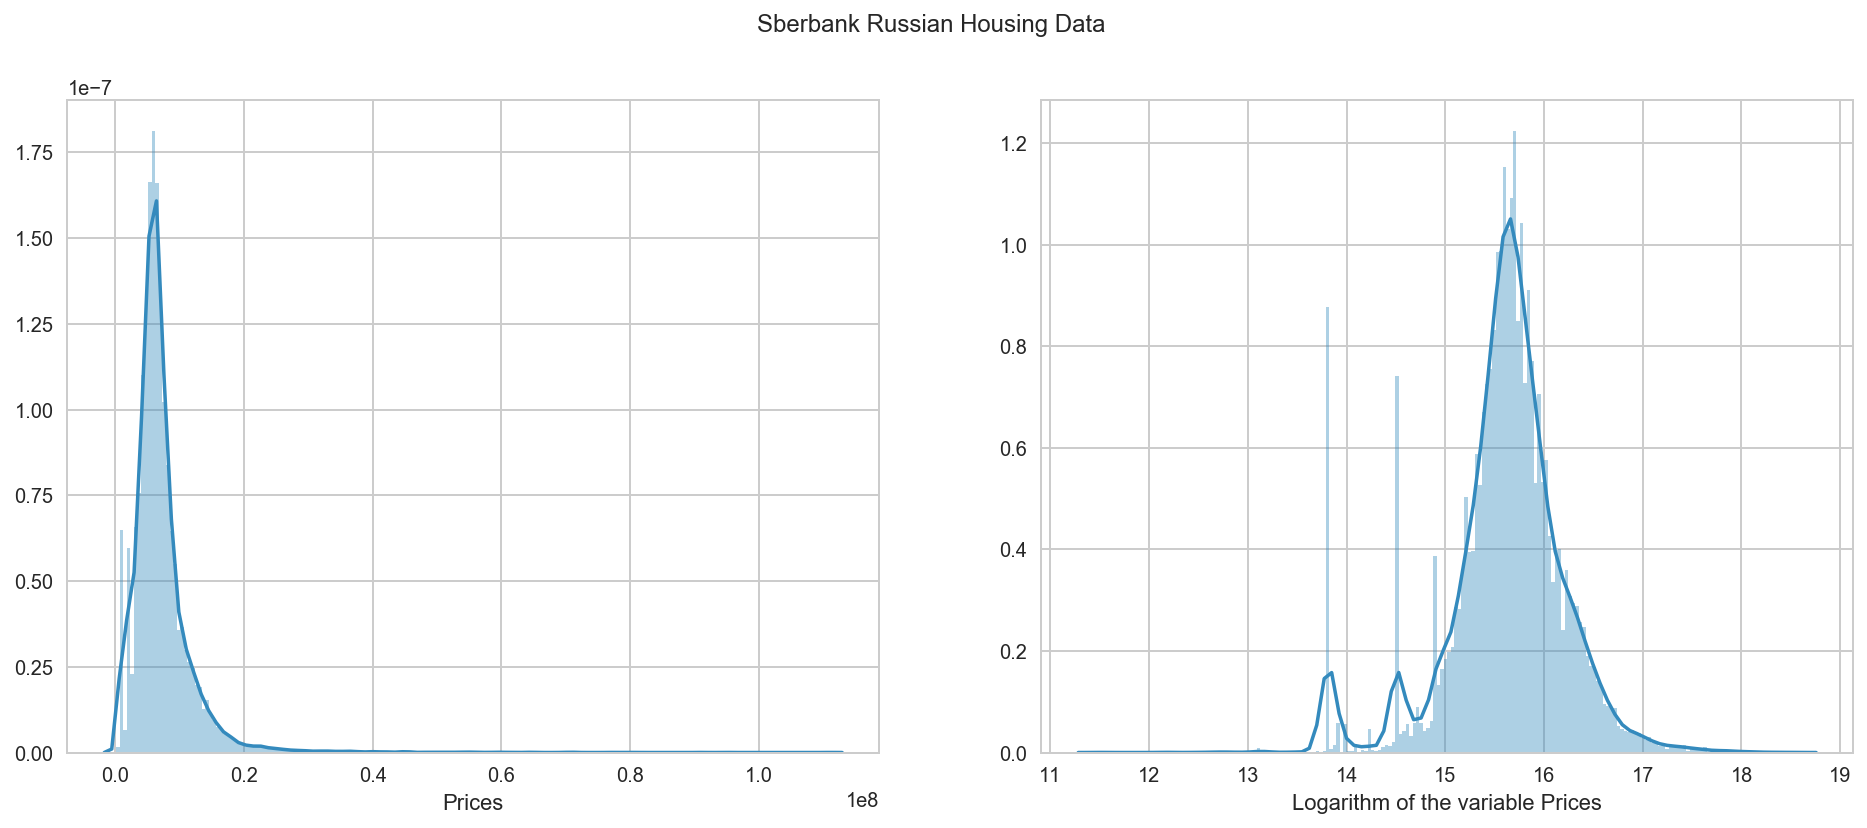

In [174]:
hide_code
plt.style.use('seaborn-whitegrid')

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

sns.distplot(target_train, bins=200, color='#348ABD', ax=ax1)
ax1.set_xlabel("Prices")

sns.distplot(np.log(target_train), bins=200, color='#348ABD', ax=ax2)
ax2.set_xlabel("Logarithm of the variable Prices")

plt.suptitle('Sberbank Russian Housing Data');

In [175]:
hide_code
print ("Sberbank Russian Housing Dataset Statistics: \n")
print ("Number of houses = ", len(target_train))
print ("Number of features = ", len(list(features_train.keys())))
print ("Minimum house price = ", np.min(target_train))
print ("Maximum house price = ", np.max(target_train))
print ("Mean house price = ", "%.2f" % np.mean(target_train))
print ("Median house price = ", "%.2f" % np.median(target_train))
print ("Standard deviation of house prices =", "%.2f" % np.std(target_train))

Sberbank Russian Housing Dataset Statistics: 

Number of houses =  30471
Number of features =  48
Minimum house price =  100000
Maximum house price =  111111112
Mean house price =  7123035.28
Median house price =  6274411.00
Standard deviation of house prices = 4780032.89


### 5.2 Fill in Missing Values

In [176]:
hide_code
features_train.isnull().sum()

full_sq                                 0
num_room                             9572
floor                                 167
area_m                                  0
timestamp                               0
preschool_education_centers_raion       0
school_education_centers_raion          0
children_preschool                      0
children_school                         0
shopping_centers_raion                  0
healthcare_centers_raion                0
office_raion                            0
sport_objects_raion                     0
public_transport_station_min_walk       0
railroad_station_walk_min              25
railroad_station_avto_km                0
bus_terminal_avto_km                    0
cafe_count_500                          0
kremlin_km                              0
workplaces_km                           0
ID_metro                                0
metro_km_avto                           0
metro_min_walk                         25
public_healthcare_km              

In [177]:
hide_code
features_test.isnull().sum()

full_sq                               0
num_room                              0
floor                                 0
area_m                                0
timestamp                             0
preschool_education_centers_raion     0
school_education_centers_raion        0
children_preschool                    0
children_school                       0
shopping_centers_raion                0
healthcare_centers_raion              0
office_raion                          0
sport_objects_raion                   0
public_transport_station_min_walk     0
railroad_station_walk_min            34
railroad_station_avto_km              0
bus_terminal_avto_km                  0
cafe_count_500                        0
kremlin_km                            0
workplaces_km                         0
ID_metro                              0
metro_km_avto                         0
metro_min_walk                       34
public_healthcare_km                  0
shopping_centers_km                   0


In [178]:
hide_code
df = pd.DataFrame(features_train, columns=X_list_num)
df['prices'] = target_train

df = df.dropna(subset=['num_room'])

df['metro_min_walk'] = df['metro_min_walk'].interpolate(method='linear')
features_test['metro_min_walk'] = features_test['metro_min_walk'].interpolate(method='linear')

df['railroad_station_walk_min'] = df['railroad_station_walk_min'].interpolate(method='linear')
features_test['railroad_station_walk_min'] = \
features_test['railroad_station_walk_min'].interpolate(method='linear')

df['floor'] = df['floor'].fillna(df['floor'].median())
len(df)

20899

### 5.3 Categorical and Macro Features

In [179]:
hide_code
ID_metro_cat = pd.factorize(df['ID_metro'])
df['ID_metro'] = ID_metro_cat[0]
ID_metro_pairs = dict(zip(list(ID_metro_cat[1]), list(set(ID_metro_cat[0]))))
ID_metro_pairs[224] = 219
features_test['ID_metro'].replace(ID_metro_pairs, inplace=True)

macro['salary'] = macro['salary'].interpolate(method='linear')
usdrub_pairs = dict(zip(list(macro['timestamp']), list(macro['usdrub'])))
salary_pairs = dict(zip(list(macro['timestamp']), list(macro['salary'])))

df['timestamp'].replace(usdrub_pairs,inplace=True)
features_test['timestamp'].replace(usdrub_pairs, inplace=True)
df.rename(columns={'timestamp' : 'usdrub'}, inplace=True)
features_test.rename(columns={'timestamp' : 'usdrub'}, inplace=True)

### 5.4 Display Correlation

In [180]:
hide_code
pearson = df.corr(method='pearson')
corr_with_prices = pearson.ix[-1][:-1]
corr_with_prices[abs(corr_with_prices).argsort()[::-1]]

full_sq                              0.593829
num_room                             0.476337
kremlin_km                          -0.290126
sport_objects_raion                  0.256412
ID_metro                             0.250502
stadium_km                          -0.238431
detention_facility_km               -0.233395
university_km                       -0.222964
theater_km                          -0.222873
workplaces_km                       -0.220889
swim_pool_km                        -0.220480
exhibition_km                       -0.212144
radiation_km                        -0.208256
museum_km                           -0.203846
park_km                             -0.201636
metro_min_walk                      -0.200058
fitness_km                          -0.197702
metro_km_avto                       -0.194751
school_education_centers_raion       0.193896
healthcare_centers_raion             0.185419
shopping_centers_km                 -0.182459
public_healthcare_km              

In [181]:
hide_code
features_list2 = corr_with_prices[abs(corr_with_prices).argsort()[::-1]][:32].index.values.tolist()
print(features_list2)

['full_sq', 'num_room', 'kremlin_km', 'sport_objects_raion', 'ID_metro', 'stadium_km', 'detention_facility_km', 'university_km', 'theater_km', 'workplaces_km', 'swim_pool_km', 'exhibition_km', 'radiation_km', 'museum_km', 'park_km', 'metro_min_walk', 'fitness_km', 'metro_km_avto', 'school_education_centers_raion', 'healthcare_centers_raion', 'shopping_centers_km', 'public_healthcare_km', 'big_road2_km', 'bus_terminal_avto_km', 'ekder_all', 'area_m', 'school_km', 'preschool_education_centers_raion', 'preschool_km', 'office_raion', 'additional_education_km', 'raion_popul']


### 5.5 Scale, Shuffle and Split the Data

In [182]:
hide_code
target_train = df['prices']
features_train = df.drop('prices', 1)
target_train2 = target_train
features_train2 = features_train[features_list2]
features_test2 = features_test[features_list2]

target_train = target_train.as_matrix()
features_train = features_train.as_matrix()
features_test = features_test.as_matrix()
target_train2 = target_train2.as_matrix()
features_train2 = features_train2.as_matrix()
features_test2 = features_test2.as_matrix()

In [184]:
hide_code
X_train, X_test, y_train, y_test = train_test_split(features_train, target_train, 
                                                    test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16719, 48), (4180, 48), (16719,), (4180,))

In [185]:
hide_code
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_train2, target_train2, 
                                                        test_size = 0.2, random_state = 1)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((16719, 32), (4180, 32), (16719,), (4180,))

In [188]:
hide_code
x_scale = RobustScaler()
X_train = x_scale.fit_transform(X_train)
X_test = x_scale.transform(X_test)

x_scale2 = RobustScaler()
X_train2 = x_scale2.fit_transform(X_train2)
X_test2 = x_scale2.transform(X_test2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16719, 48), (4180, 48), (16719,), (4180,))

In [189]:
hide_code
y_scale = RobustScaler()
s_y_train = y_scale.fit_transform(y_train.reshape(-1,1))
s_y_test = y_scale.transform(y_test.reshape(-1,1))

y_scale2 = RobustScaler()
s_y_train2 = y_scale2.fit_transform(y_train2.reshape(-1,1))
s_y_test2 = y_scale2.transform(y_test2.reshape(-1,1))

s_y_train.shape, s_y_test.shape

((16719, 1), (4180, 1))

----
## $\mathfrak {\color{#228B22} {6. \ Benchmark \ Models }}$
### 6.1 Regressors; Scikit-Learn
#### Tuning Parameters

In [49]:
hide_code
param_grid_gbr = {'max_depth': [4, 5, 6], 'n_estimators': range(48, 481, 48)}
gridsearch_gbr = GridSearchCV(GradientBoostingRegressor(), 
                              param_grid_gbr, n_jobs=5).fit(X_train, y_train)

gridsearch_gbr.best_params_

{'max_depth': 4, 'n_estimators': 240}

In [56]:
hide_code
param_grid_gbr2 = {'max_depth': [3, 4, 5], 'n_estimators': range(32, 321, 32)}
gridsearch_gbr2 = GridSearchCV(GradientBoostingRegressor(), 
                               param_grid_gbr2, n_jobs=5).fit(X_train2, y_train2)

gridsearch_gbr2.best_params_

{'max_depth': 4, 'n_estimators': 288}

In [51]:
hide_code
param_grid_br = {'n_estimators': range(48, 481, 48)}
gridsearch_br = GridSearchCV(BaggingRegressor(), 
                             param_grid_br, n_jobs=5).fit(X_train, y_train)

gridsearch_br.best_params_

{'n_estimators': 384}

In [60]:
hide_code
param_grid_br2 = {'n_estimators': range(32, 321, 32)}
gridsearch_br2 = GridSearchCV(BaggingRegressor(), 
                              param_grid_br2, n_jobs=5).fit(X_train2, y_train2)

gridsearch_br2.best_params_

{'n_estimators': 128}

#### Fit the Regressors

In [21]:
hide_code
y_train_gbr, y_test_gbr = regression(GradientBoostingRegressor(max_depth=4, n_estimators=240), 
                                     X_train, X_test, y_train)

y_train_br, y_test_br = regression(BaggingRegressor(n_estimators=384), 
                                   X_train, X_test, y_train)

In [22]:
hide_code
print('48 features')
scores('GradientBoostingRegressor', y_train, y_test, y_train_gbr, y_test_gbr)
scores('BaggingRegressor', y_train, y_test, y_train_br, y_test_br)

48 features
_______________________________________
GradientBoostingRegressor
_______________________________________
EV score. Train:  0.84429421648
EV score. Test:  0.717222751104
---------
R2 score. Train:  0.84429421648
R2 score. Test:  0.717164021221
---------
MSE score. Train:  3.66979708455e+12
MSE score. Test:  7.33442181165e+12
---------
MAE score. Train:  1186631.54657
MAE score. Test:  1436649.28701
---------
MdAE score. Train:  641967.791817
MdAE score. Test:  717542.327713
_______________________________________
BaggingRegressor
_______________________________________
EV score. Train:  0.956966974708
EV score. Test:  0.71736365465
---------
R2 score. Train:  0.956939330205
R2 score. Test:  0.716921331922
---------
MSE score. Train:  1.01488793094e+12
MSE score. Test:  7.34071516123e+12
---------
MAE score. Train:  522721.235406
MAE score. Test:  1402249.88094
---------
MdAE score. Train:  227142.388021
MdAE score. Test:  627311.283854


In [23]:
hide_code
y_train_gbr2, y_test_gbr2 = regression(GradientBoostingRegressor(max_depth=4, n_estimators=288), 
                                       X_train2, X_test2, y_train2)

y_train_br2, y_test_br2 = regression(BaggingRegressor(n_estimators=128), 
                                     X_train2, X_test2, y_train2)

In [24]:
hide_code
print('32 features')
scores('GradientBoostingRegressor', y_train2, y_test2, y_train_gbr2, y_test_gbr2)
scores('BaggingRegressor', y_train2, y_test2, y_train_br2, y_test_br2)

32 features
_______________________________________
GradientBoostingRegressor
_______________________________________
EV score. Train:  0.843076625974
EV score. Test:  0.712536399462
---------
R2 score. Train:  0.843076625974
R2 score. Test:  0.712472530424
---------
MSE score. Train:  3.69849422082e+12
MSE score. Test:  7.45608021092e+12
---------
MAE score. Train:  1204493.91739
MAE score. Test:  1472391.76539
---------
MdAE score. Train:  659823.287316
MdAE score. Test:  757552.315071
_______________________________________
BaggingRegressor
_______________________________________
EV score. Train:  0.947997124639
EV score. Test:  0.706809940732
---------
R2 score. Train:  0.947969628448
R2 score. Test:  0.706486514343
---------
MSE score. Train:  1.22629295786e+12
MSE score. Test:  7.61130787007e+12
---------
MAE score. Train:  609307.513809
MAE score. Test:  1457041.64576
---------
MdAE score. Train:  305178.634536
MdAE score. Test:  684045.511812


#### MLP Regressors

In [25]:
hide_code
mlpr = MLPRegressor(hidden_layer_sizes=(240,), max_iter=200, solver='lbfgs', 
                    alpha=0.01, verbose=2)
mlpr.fit(X_train, y_train)

y_train_mlpr = mlpr.predict(X_train)
y_test_mlpr = mlpr.predict(X_test)

scores('MLP Regressor #1', y_train, y_test, y_train_mlpr, y_test_mlpr)

_______________________________________
MLP Regressor #1
_______________________________________
EV score. Train:  0.66104496028
EV score. Test:  0.661748930506
---------
R2 score. Train:  0.661004705905
R2 score. Test:  0.661403014417
---------
MSE score. Train:  7.98970926978e+12
MSE score. Test:  8.78040031238e+12
---------
MAE score. Train:  1603903.13551
MAE score. Test:  1659204.29535
---------
MdAE score. Train:  885760.038664
MdAE score. Test:  915148.376151


In [26]:
hide_code
mlpr2 = MLPRegressor(hidden_layer_sizes=(288,), max_iter=300, solver='lbfgs', 
                    alpha=0.01, verbose=2)
mlpr2.fit(X_train2, y_train2)

y_train_mlpr2 = mlpr2.predict(X_train2)
y_test_mlpr2 = mlpr2.predict(X_test2)

scores('MLP Regressor #2', y_train2, y_test2, y_train_mlpr2, y_test_mlpr2)

_______________________________________
MLP Regressor #2
_______________________________________
EV score. Train:  0.693235421025
EV score. Test:  0.686745167826
---------
R2 score. Train:  0.693204469782
R2 score. Test:  0.686666854287
---------
MSE score. Train:  7.23079976155e+12
MSE score. Test:  8.12526563329e+12
---------
MAE score. Train:  1538378.67273
MAE score. Test:  1599805.85728
---------
MdAE score. Train:  814255.86223
MdAE score. Test:  856117.094979


#### Display Predictions

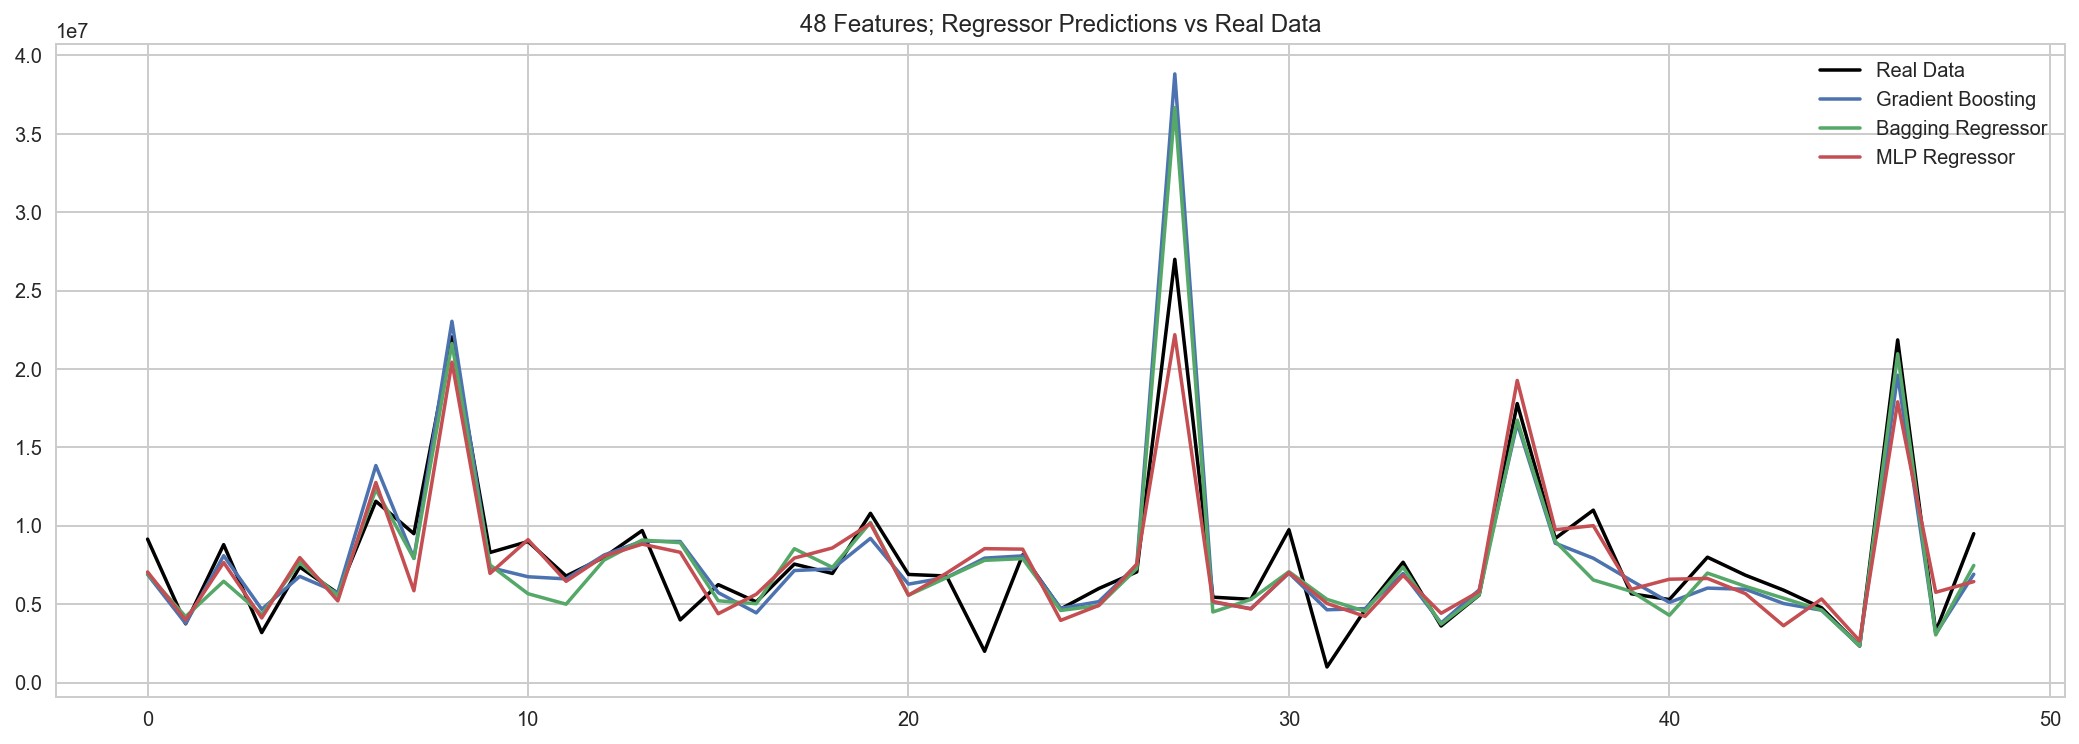

In [27]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test[1:50], color = 'black', label='Real Data')

plt.plot(y_test_gbr[1:50], label='Gradient Boosting')
plt.plot(y_test_br[1:50], label='Bagging Regressor')
plt.plot(y_test_mlpr[1:50], label='MLP Regressor')

plt.legend()
plt.title("48 Features; Regressor Predictions vs Real Data");

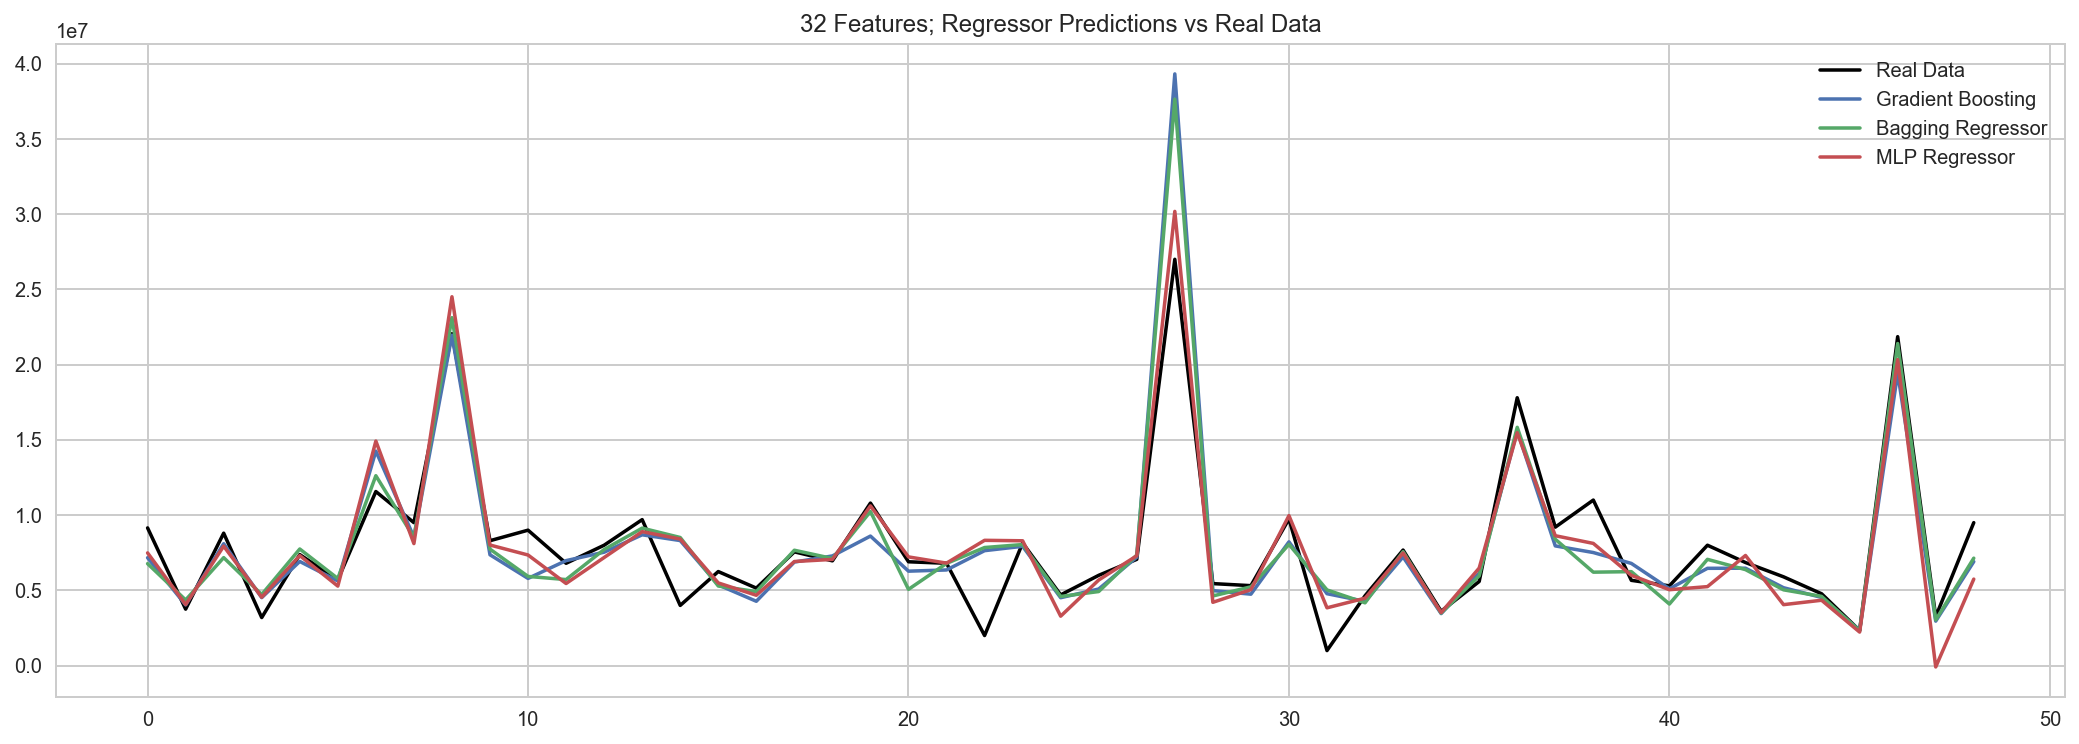

In [28]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test2[1:50], color = 'black', label='Real Data')

plt.plot(y_test_gbr2[1:50], label='Gradient Boosting')
plt.plot(y_test_br2[1:50], label='Bagging Regressor')
plt.plot(y_test_mlpr2[1:50], label='MLP Regressor')

plt.legend()
plt.title("32 Features; Regressor Predictions vs Real Data"); 

### 6.2 Neural Networks; Keras
#### MLP

In [301]:
hide_code
def mlp_model():
    model = Sequential()
    
    model.add(Dense(48, activation='relu', input_dim=48))
    model.add(Dense(48, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(192, activation='relu'))
    model.add(Dense(192, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(768, activation='relu'))
    model.add(Dense(768, activation='relu'))
    
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

mlp_model = mlp_model()

mlp_history = mlp_model.fit(X_train, s_y_train, validation_data=(X_test, s_y_test),
                            nb_epoch=20, batch_size=16, verbose=0)

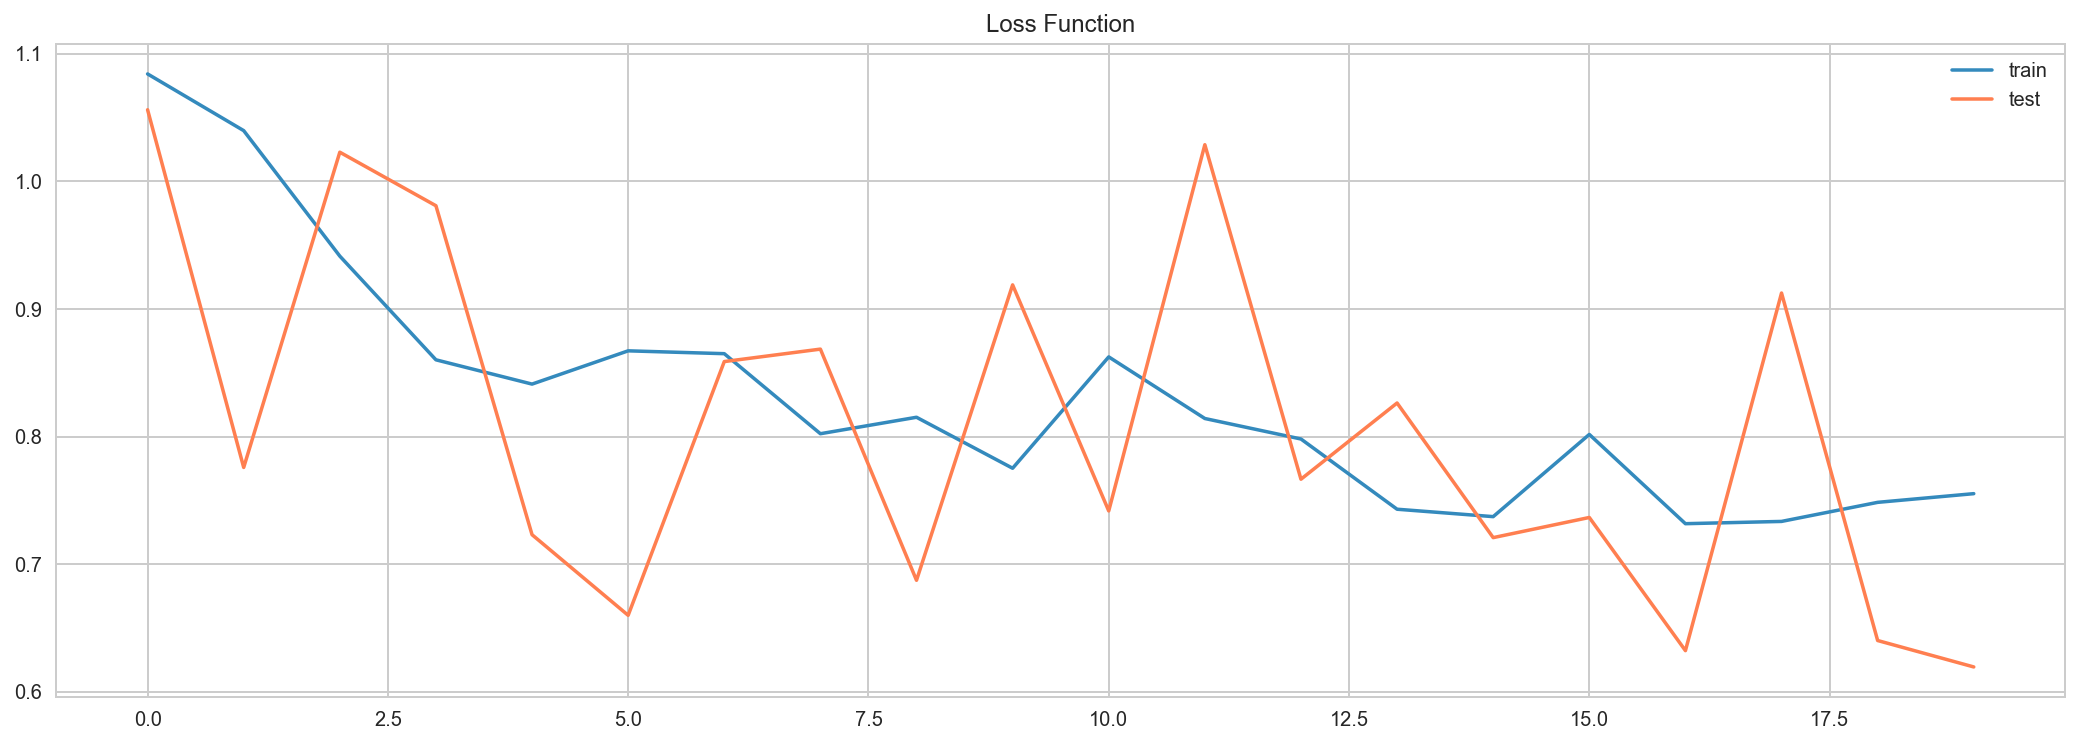

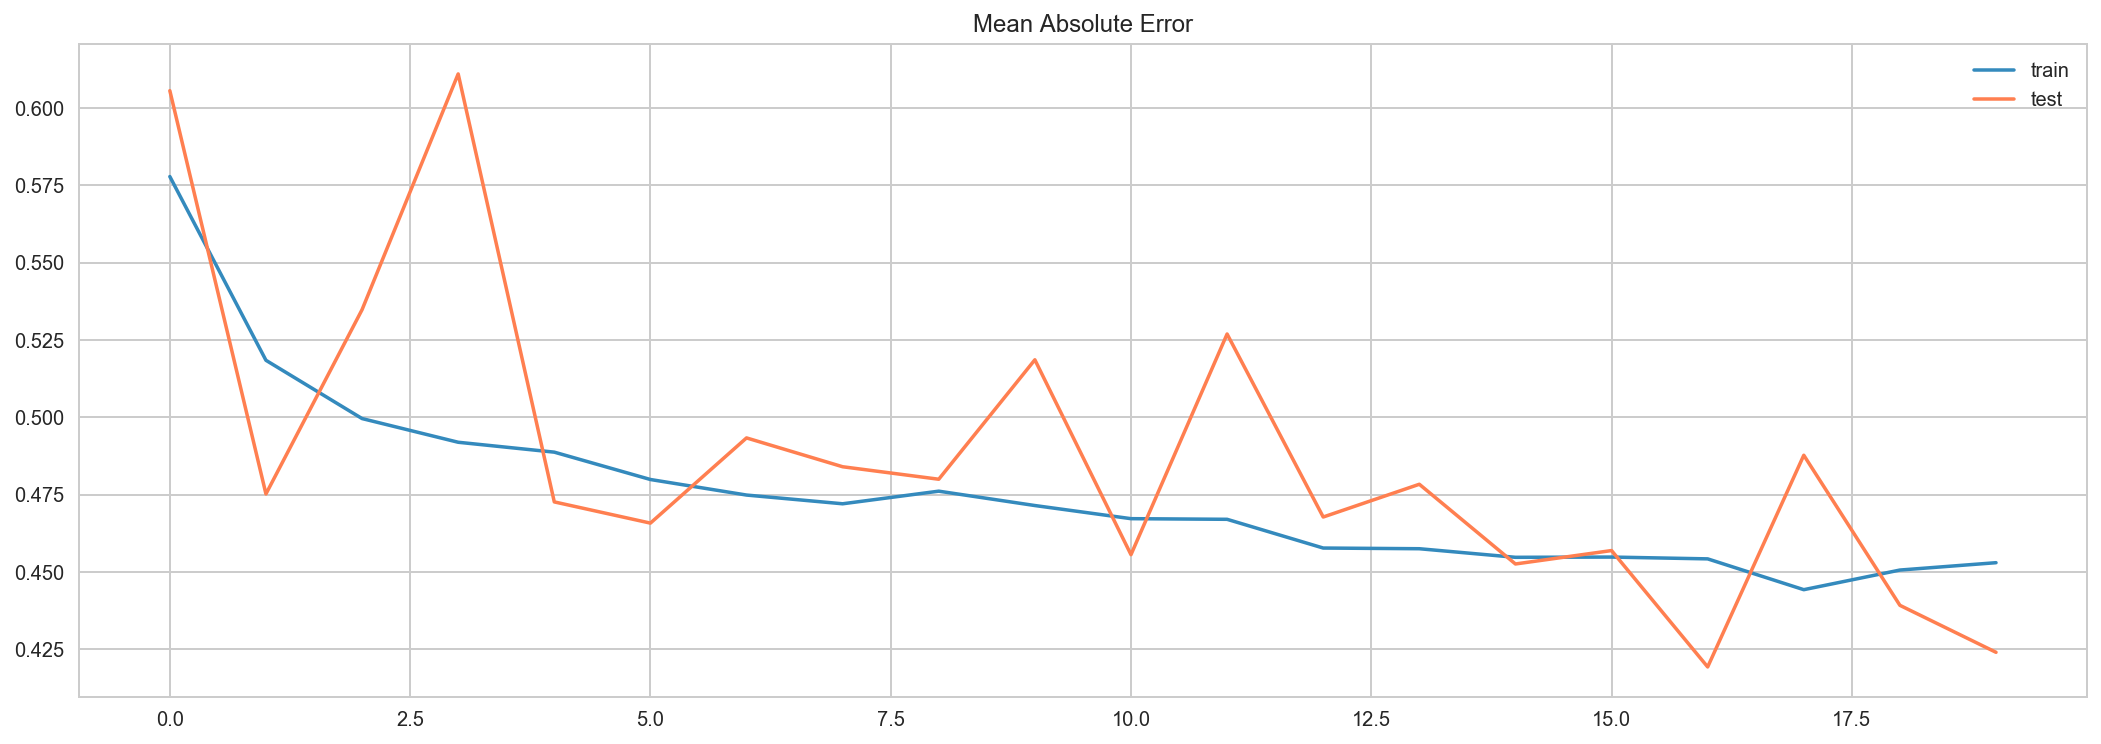

In [302]:
hide_code
loss_plot(mlp_history)
mae_plot(mlp_history)

In [303]:
hide_code
s_y_train_mlp = mlp_model.predict(X_train)
s_y_test_mlp = mlp_model.predict(X_test)

scores('MLP Model #1', s_y_train, s_y_test, s_y_train_mlp, s_y_test_mlp)

_______________________________________
MLP Model #1
_______________________________________
EV score. Train:  0.651685250865
EV score. Test:  0.690595786735
---------
R2 score. Train:  0.651684614715
R2 score. Test:  0.690438974259
---------
MSE score. Train:  0.633439240126
MSE score. Test:  0.619401859233
---------
MAE score. Train:  0.407406387265
MAE score. Test:  0.424039399589
---------
MdAE score. Train:  0.201703382583
MdAE score. Test:  0.214629895455


In [304]:
hide_code
mlp_model.save('mlp_model_p6.h5')

In [305]:
hide_code
def mlp_model2():
    model = Sequential()
    
    model.add(Dense(32, activation='relu', input_dim=32))
    model.add(Dense(32, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

mlp_model2 = mlp_model2()

mlp_history2 = mlp_model2.fit(X_train2, s_y_train2, validation_data=(X_test2, s_y_test2),
                              nb_epoch=40, batch_size=16, verbose=0)

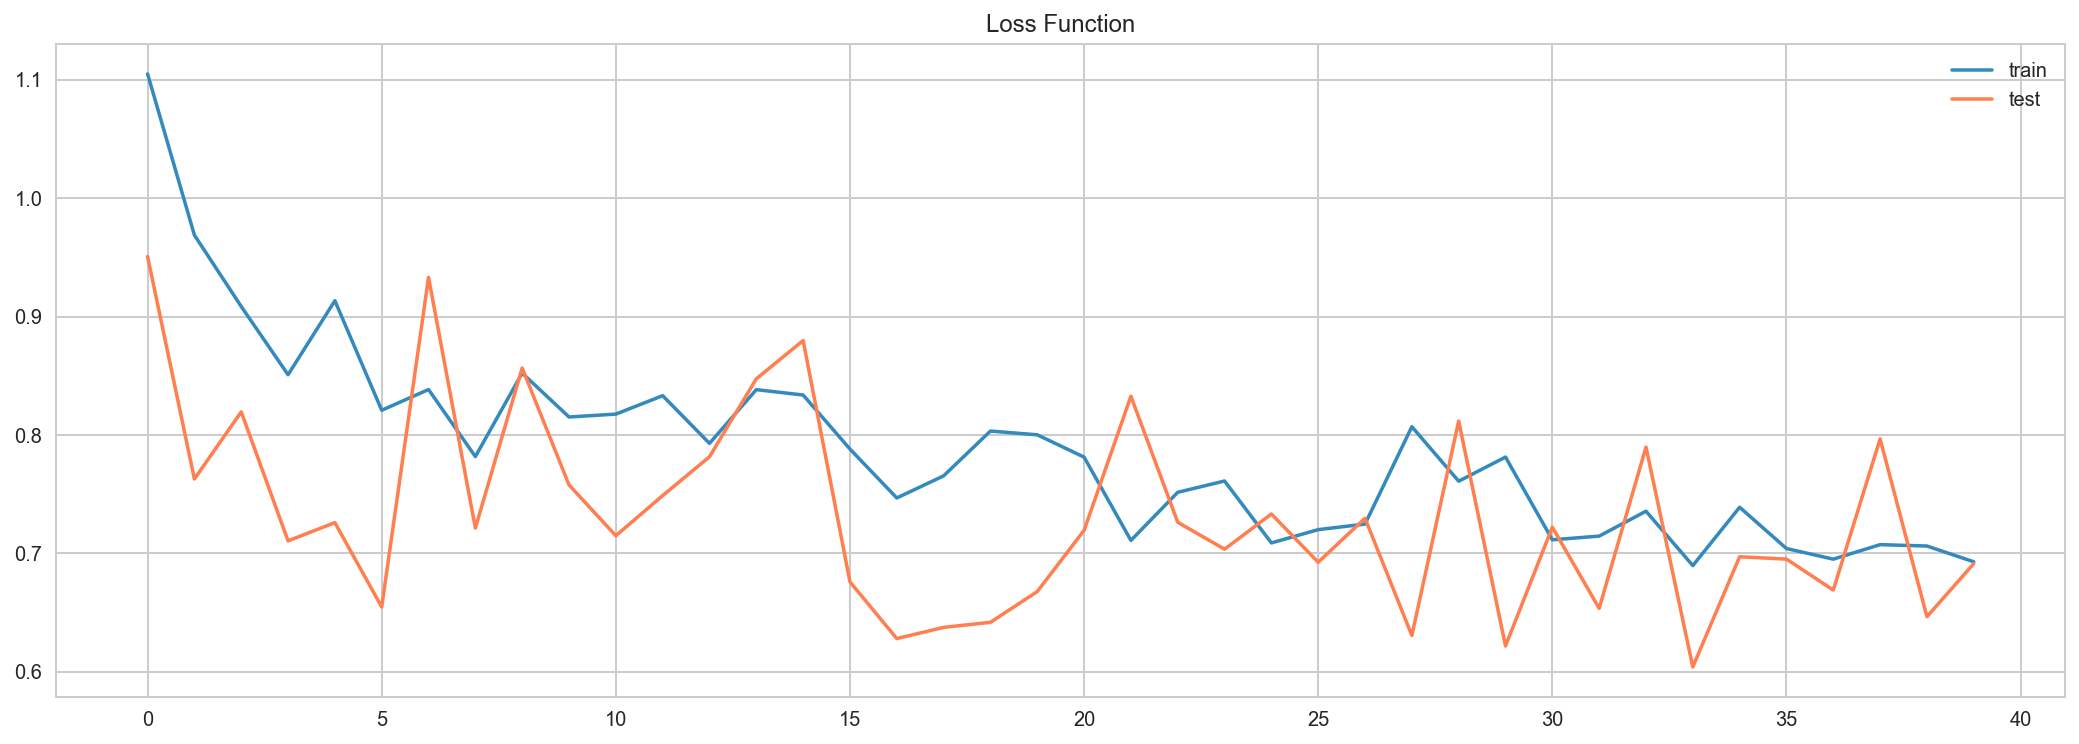

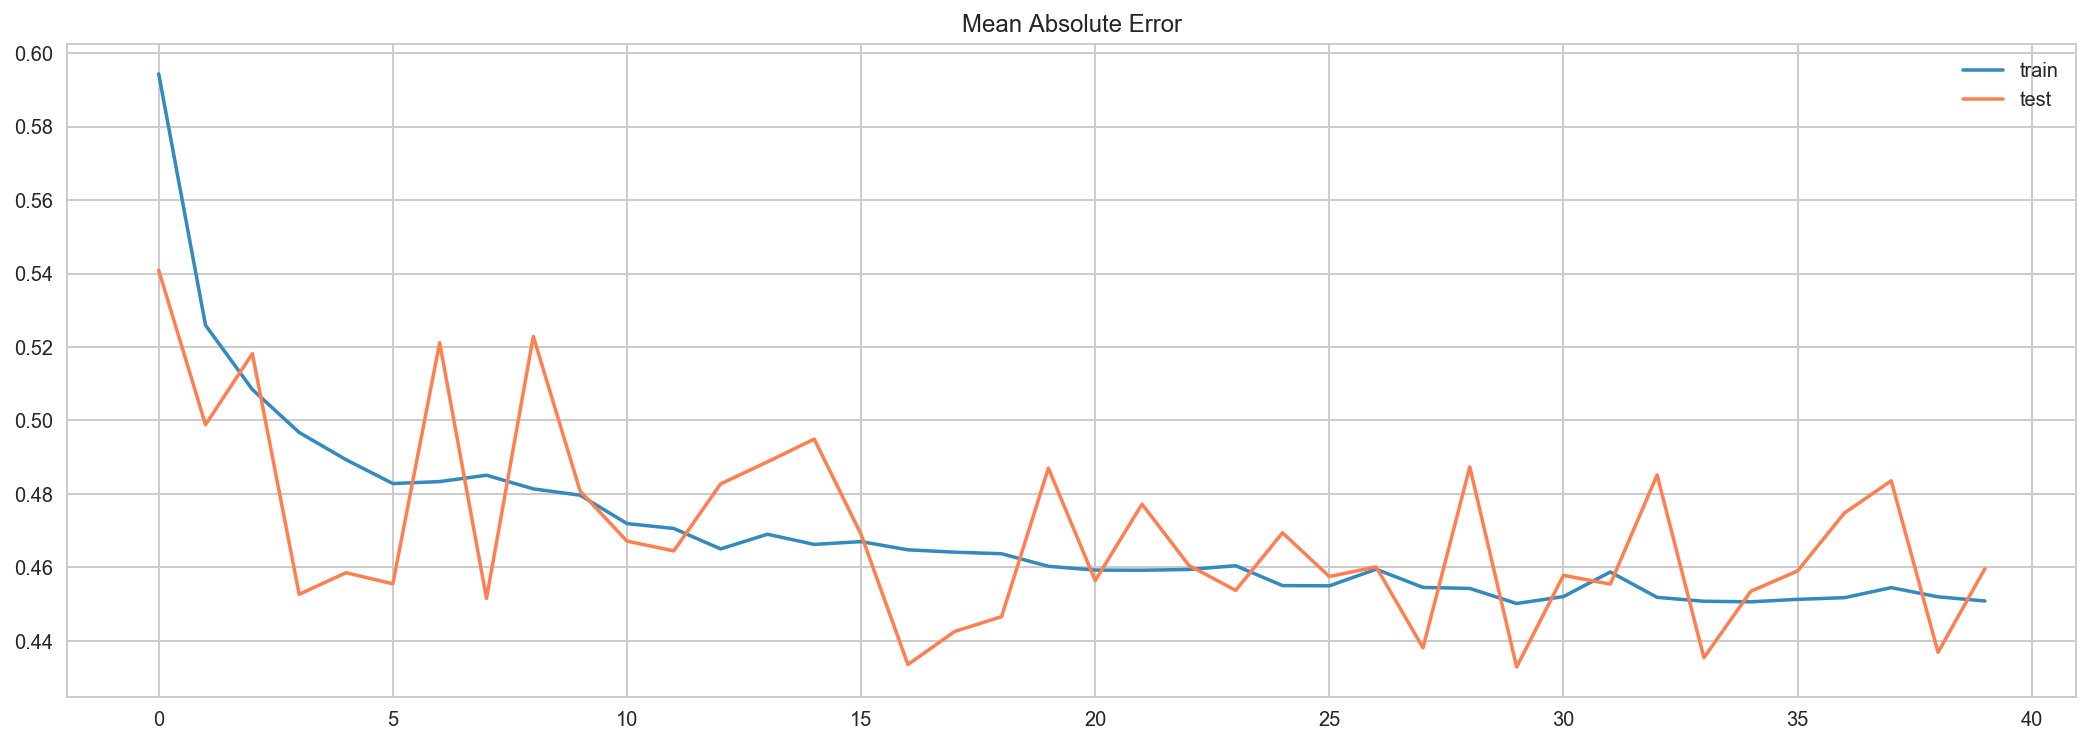

In [306]:
hide_code
loss_plot(mlp_history2)
mae_plot(mlp_history2)

In [307]:
hide_code
s_y_train_mlp2 = mlp_model2.predict(X_train2)
s_y_test_mlp2 = mlp_model2.predict(X_test2)

scores('MLP Model #2', s_y_train2, s_y_test2, s_y_train_mlp2, s_y_test_mlp2)

_______________________________________
MLP Model #2
_______________________________________
EV score. Train:  0.647044083991
EV score. Test:  0.664392864849
---------
R2 score. Train:  0.63344719128
R2 score. Test:  0.65446314789
---------
MSE score. Train:  0.666605445613
MSE score. Test:  0.691386030003
---------
MAE score. Train:  0.444339313087
MAE score. Test:  0.459656948743
---------
MdAE score. Train:  0.223214097559
MdAE score. Test:  0.238526810277


In [308]:
hide_code
mlp_model2.save('mlp_model2_p6.h5')

#### CNN

In [309]:
hide_code
def cnn_model():
    model = Sequential()
        
    model.add(Conv1D(48, 5, padding='valid', activation='relu', input_shape=(48, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(192, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(768, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, kernel_initializer='normal'))
    
#    opt = keras.optimizers.rmsprop(decay=1e-6)
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

cnn_model = cnn_model()
cnn_history = cnn_model.fit(X_train.reshape(16719, 48, 1), s_y_train, 
                            epochs=25, batch_size=64, verbose=0,
                            validation_data=(X_test.reshape(4180, 48, 1), s_y_test))

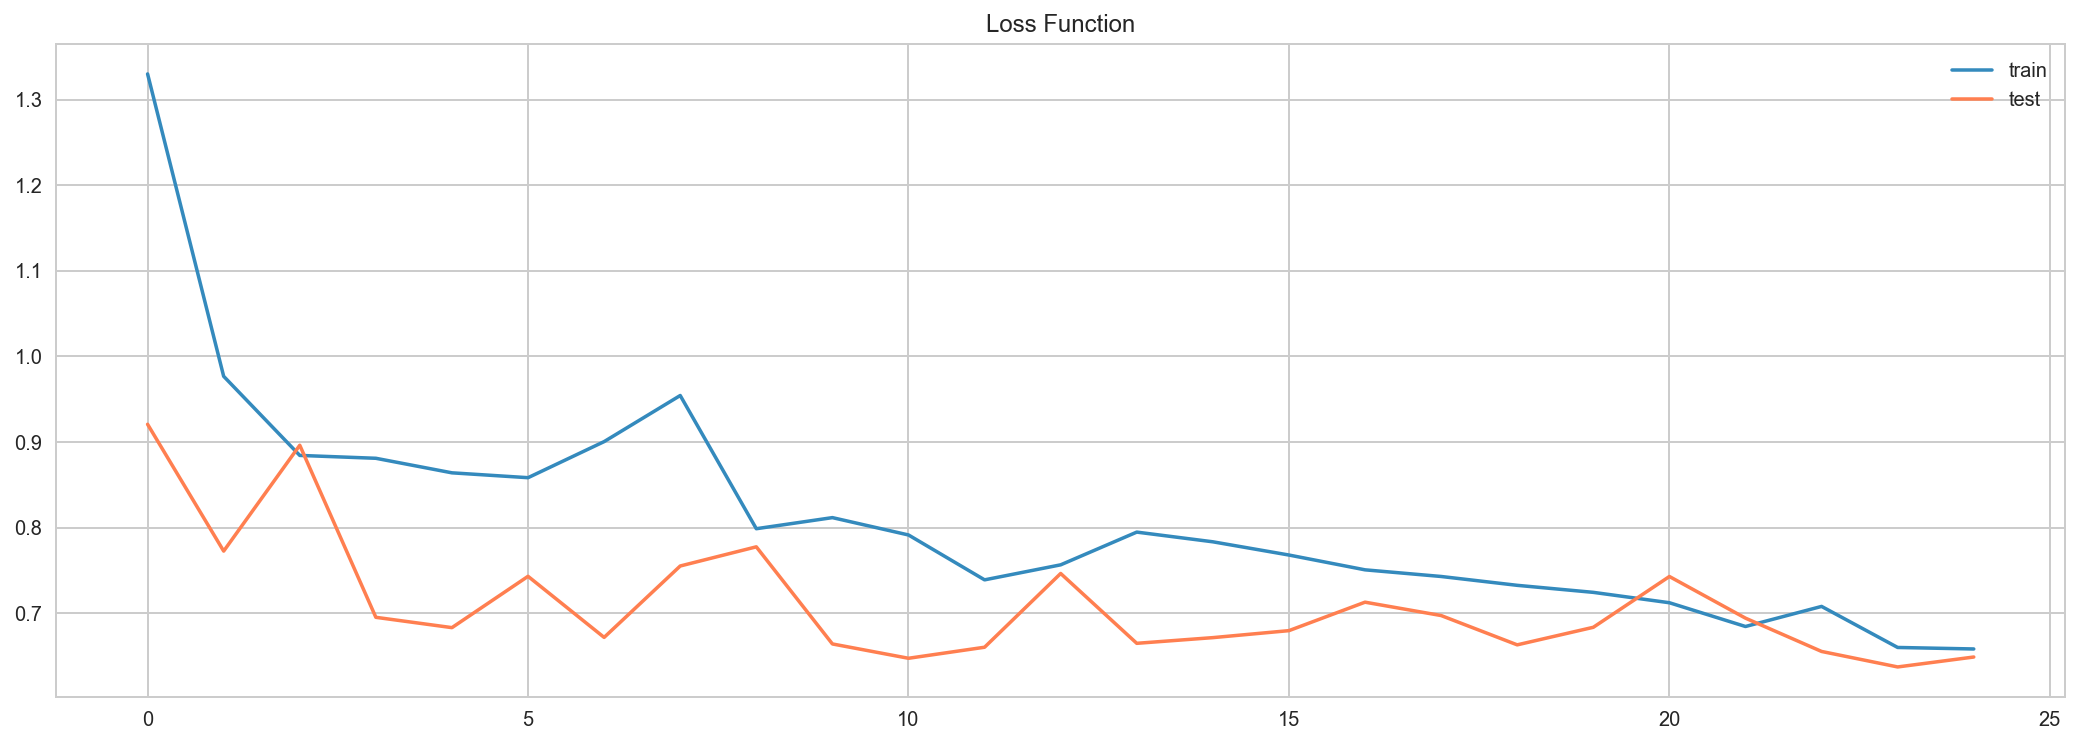

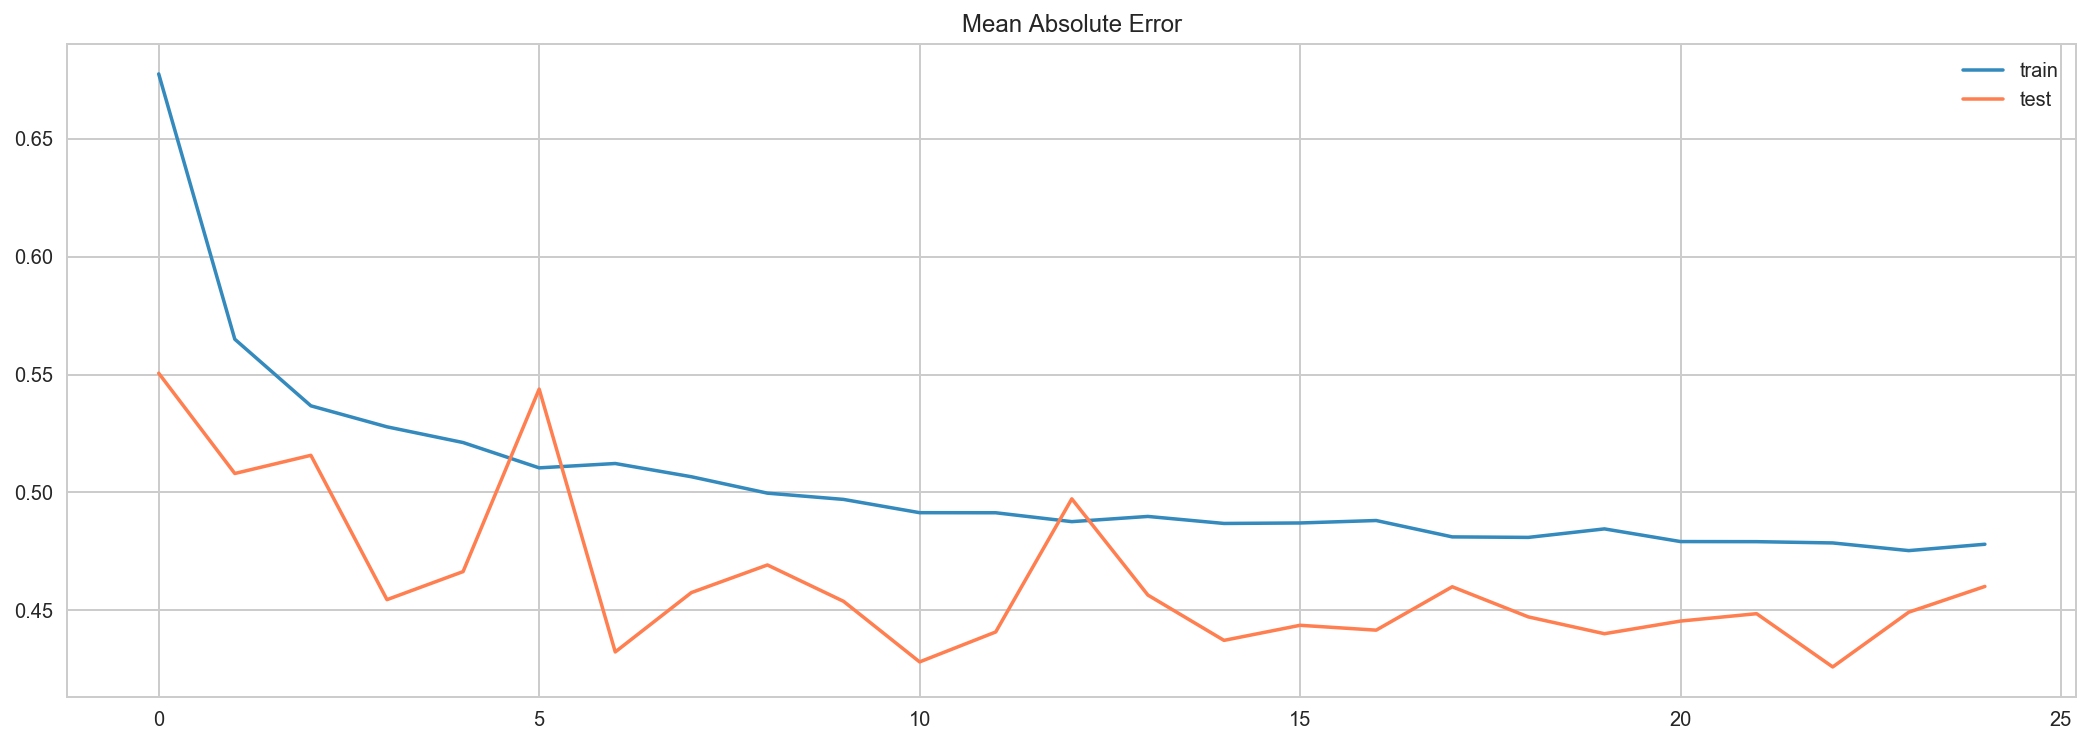

In [310]:
hide_code
loss_plot(cnn_history)
mae_plot(cnn_history)

In [311]:
hide_code
s_y_train_cnn = cnn_model.predict(X_train.reshape(16719, 48, 1))
s_y_test_cnn = cnn_model.predict(X_test.reshape(4180, 48, 1))

scores('CNN Model #1', s_y_train, s_y_test, s_y_train_cnn, s_y_test_cnn)

_______________________________________
CNN Model #1
_______________________________________
EV score. Train:  0.718231732205
EV score. Test:  0.679698344692
---------
R2 score. Train:  0.714944413504
R2 score. Test:  0.675778174695
---------
MSE score. Train:  0.518396263076
MSE score. Test:  0.648736710047
---------
MAE score. Train:  0.438653405757
MAE score. Test:  0.460115877486
---------
MdAE score. Train:  0.273668864833
MdAE score. Test:  0.277287479374


In [312]:
hide_code
cnn_model.save('cnn_model_p6.h5')

In [313]:
hide_code
def cnn_model2():
    model = Sequential()
        
    model.add(Conv1D(32, 5, padding='valid', activation='relu', input_shape=(32, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(128, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, kernel_initializer='normal'))
    
#    opt = keras.optimizers.rmsprop(decay=1e-6)
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

cnn_model2 = cnn_model2()
cnn_history2 = cnn_model2.fit(X_train2.reshape(16719, 32, 1), s_y_train2, 
                              epochs=30, batch_size=16, verbose=0,
                              validation_data=(X_test2.reshape(4180, 32, 1), s_y_test2))

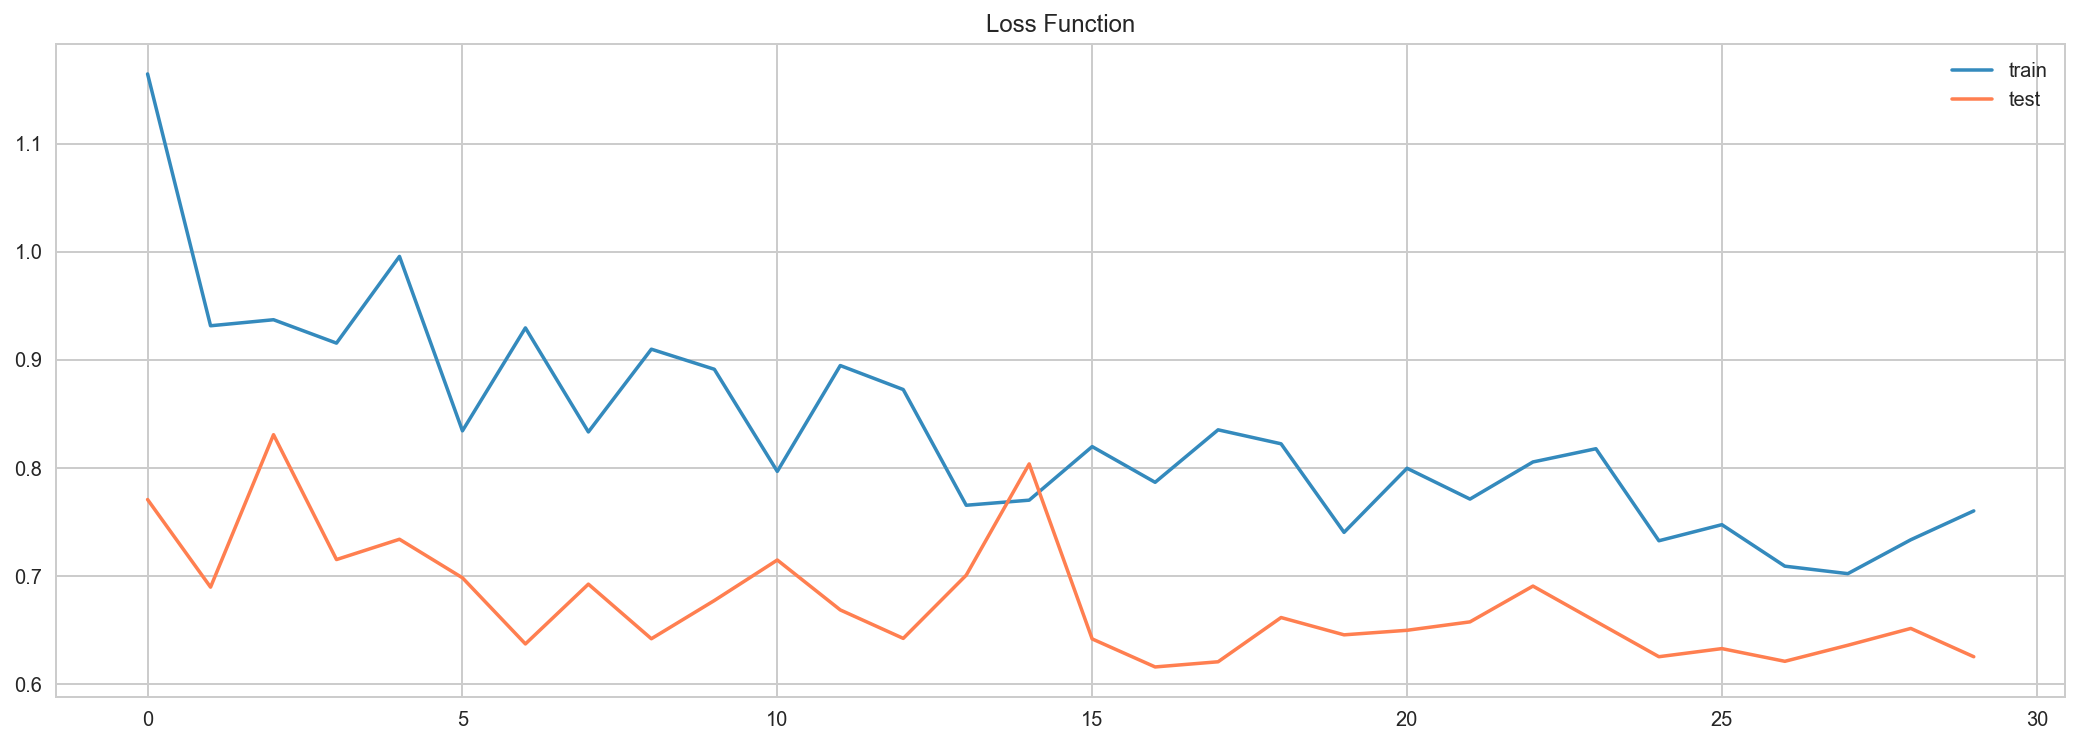

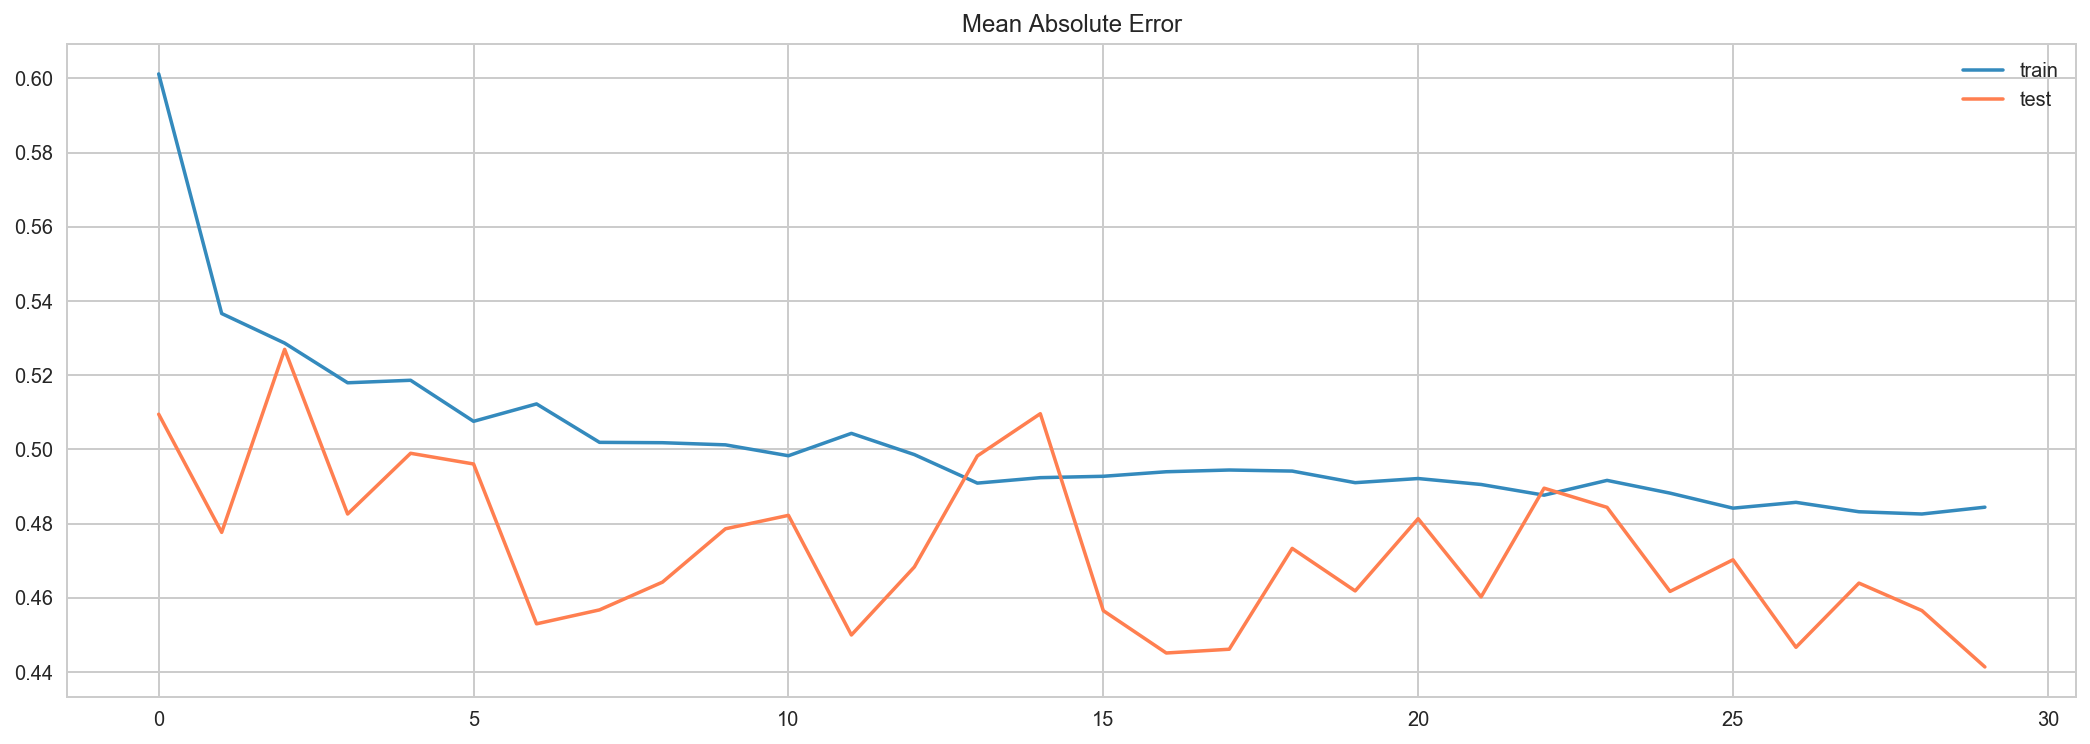

In [314]:
hide_code
loss_plot(cnn_history2)
mae_plot(cnn_history2)

In [315]:
hide_code
s_y_train_cnn2 = cnn_model2.predict(X_train2.reshape(16719, 32, 1))
s_y_test_cnn2 = cnn_model2.predict(X_test2.reshape(4180, 32, 1))

scores('CNN Model #2', s_y_train2, s_y_test2, s_y_train_cnn2, s_y_test_cnn2)

_______________________________________
CNN Model #2
_______________________________________
EV score. Train:  0.683510035276
EV score. Test:  0.688212327849
---------
R2 score. Train:  0.682683012642
R2 score. Test:  0.687531815381
---------
MSE score. Train:  0.577066187263
MSE score. Test:  0.625218804728
---------
MAE score. Train:  0.417907165479
MAE score. Test:  0.441350834867
---------
MdAE score. Train:  0.213669048945
MdAE score. Test:  0.222344950893


In [316]:
hide_code
cnn_model2.save('cnn_model2_p6.h5')

#### RNN

In [317]:
hide_code
def rnn_model():
    model = Sequential()
    
    model.add(LSTM(192, return_sequences=True, input_shape=(1, 48)))
    model.add(LSTM(768, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])     
    return model 

rnn_model = rnn_model()
rnn_history = rnn_model.fit(X_train.reshape(16719, 1, 48), s_y_train.reshape(16719), 
                            epochs=8, verbose=0, 
                            validation_data=(X_test.reshape(4180, 1, 48), s_y_test.reshape(4180)))

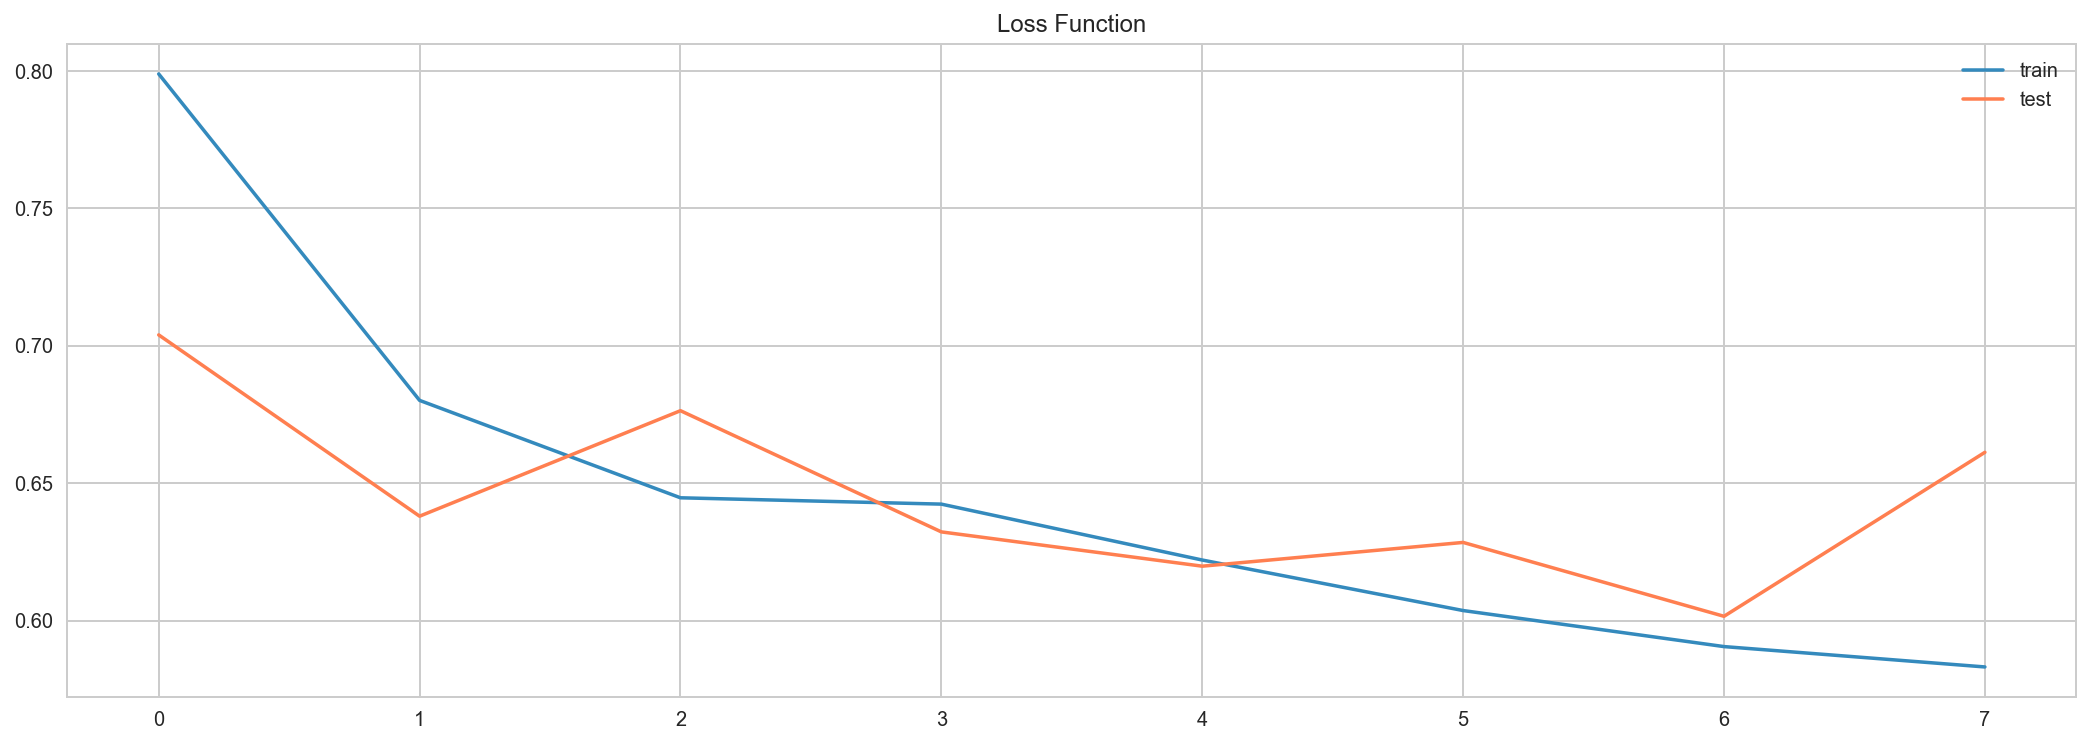

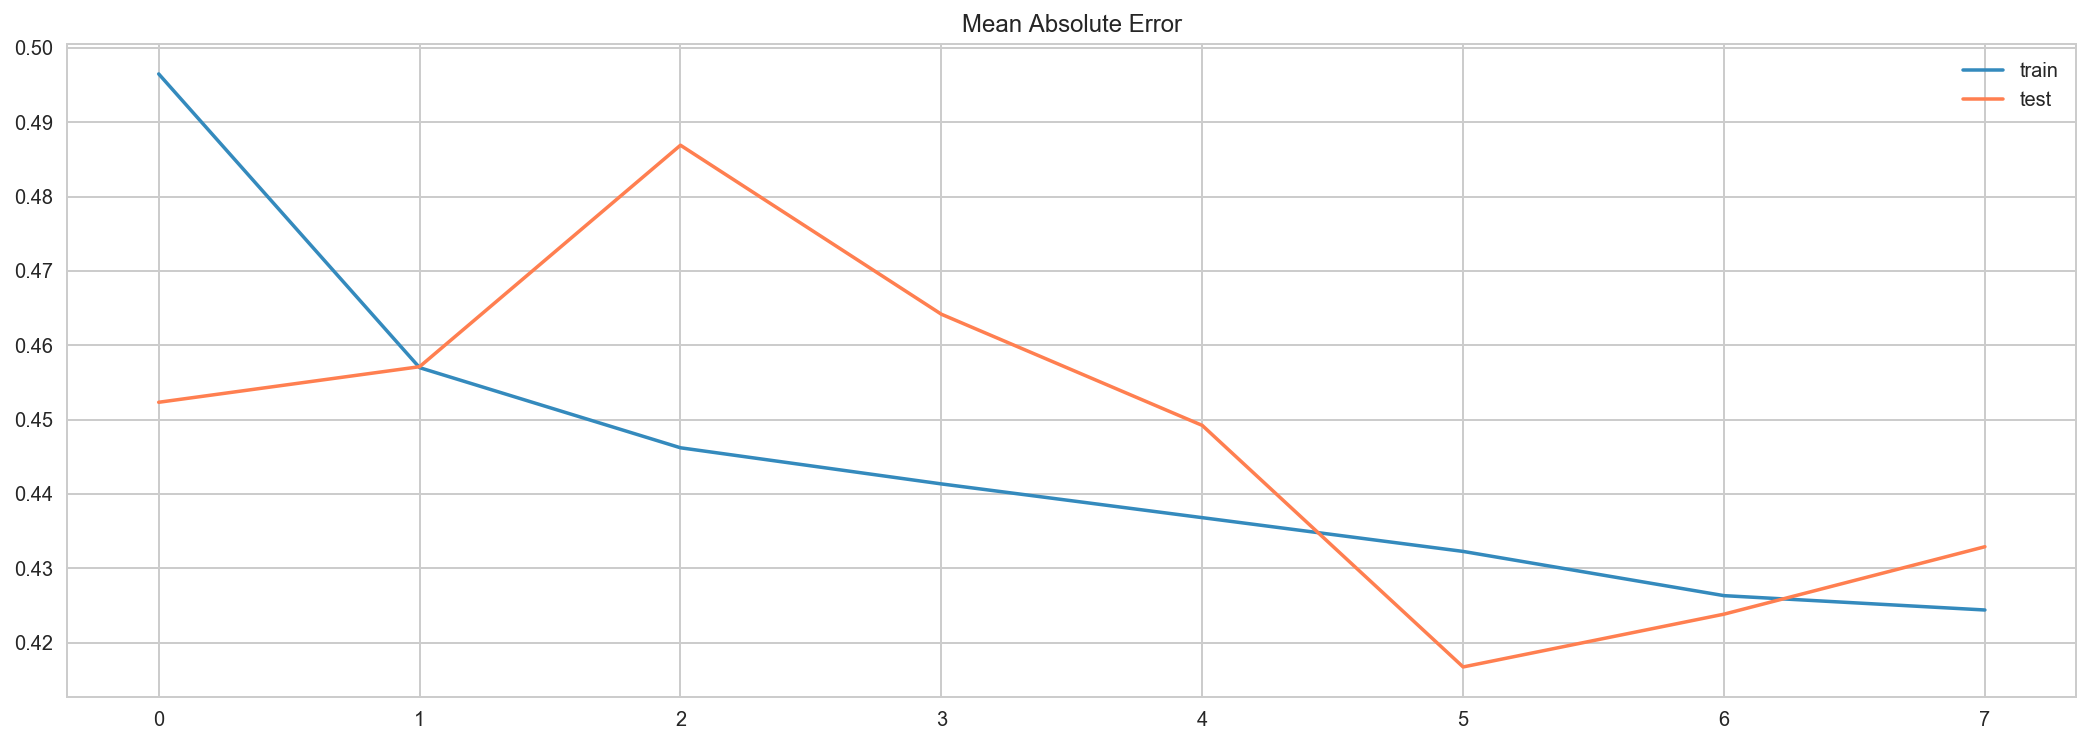

In [318]:
hide_code
loss_plot(rnn_history)
mae_plot(rnn_history)

In [319]:
hide_code
s_y_train_rnn = rnn_model.predict(X_train.reshape(16719, 1, 48))
s_y_test_rnn = rnn_model.predict(X_test.reshape(4180, 1, 48))

scores('RNN Model #1', s_y_train, s_y_test, s_y_train_rnn, s_y_test_rnn)

_______________________________________
RNN Model #1
_______________________________________
EV score. Train:  0.694180994458
EV score. Test:  0.669849828845
---------
R2 score. Train:  0.69410434945
R2 score. Test:  0.669505552794
---------
MSE score. Train:  0.556295577596
MSE score. Test:  0.661287623581
---------
MAE score. Train:  0.414027009292
MAE score. Test:  0.432888857164
---------
MdAE score. Train:  0.204195214113
MdAE score. Test:  0.213506053885


In [320]:
hide_code
rnn_model.save('rnn_model_p6.h5')

In [321]:
hide_code
def rnn_model2():
    model = Sequential()
    
    model.add(LSTM(128, return_sequences=True, input_shape=(1, 32)))
    model.add(LSTM(512, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])     
    return model 

rnn_model2 = rnn_model2()
rnn_history2 = rnn_model2.fit(X_train2.reshape(16719, 1, 32), s_y_train2, 
                              epochs=8, verbose=2, 
                              validation_data=(X_test2.reshape(4180, 1, 32), s_y_test2))

Train on 16719 samples, validate on 4180 samples
Epoch 1/8
82s - loss: 0.8268 - mean_absolute_error: 0.5059 - val_loss: 0.6910 - val_mean_absolute_error: 0.4711
Epoch 2/8
35s - loss: 0.6929 - mean_absolute_error: 0.4680 - val_loss: 0.7216 - val_mean_absolute_error: 0.4617
Epoch 3/8
34s - loss: 0.6756 - mean_absolute_error: 0.4598 - val_loss: 0.7252 - val_mean_absolute_error: 0.4861
Epoch 4/8
35s - loss: 0.6553 - mean_absolute_error: 0.4549 - val_loss: 0.6434 - val_mean_absolute_error: 0.4480
Epoch 5/8
34s - loss: 0.6372 - mean_absolute_error: 0.4491 - val_loss: 0.6527 - val_mean_absolute_error: 0.4528
Epoch 6/8
36s - loss: 0.6292 - mean_absolute_error: 0.4452 - val_loss: 0.6665 - val_mean_absolute_error: 0.4505
Epoch 7/8
34s - loss: 0.6236 - mean_absolute_error: 0.4428 - val_loss: 0.6256 - val_mean_absolute_error: 0.4527
Epoch 8/8
36s - loss: 0.6042 - mean_absolute_error: 0.4388 - val_loss: 0.6481 - val_mean_absolute_error: 0.4569


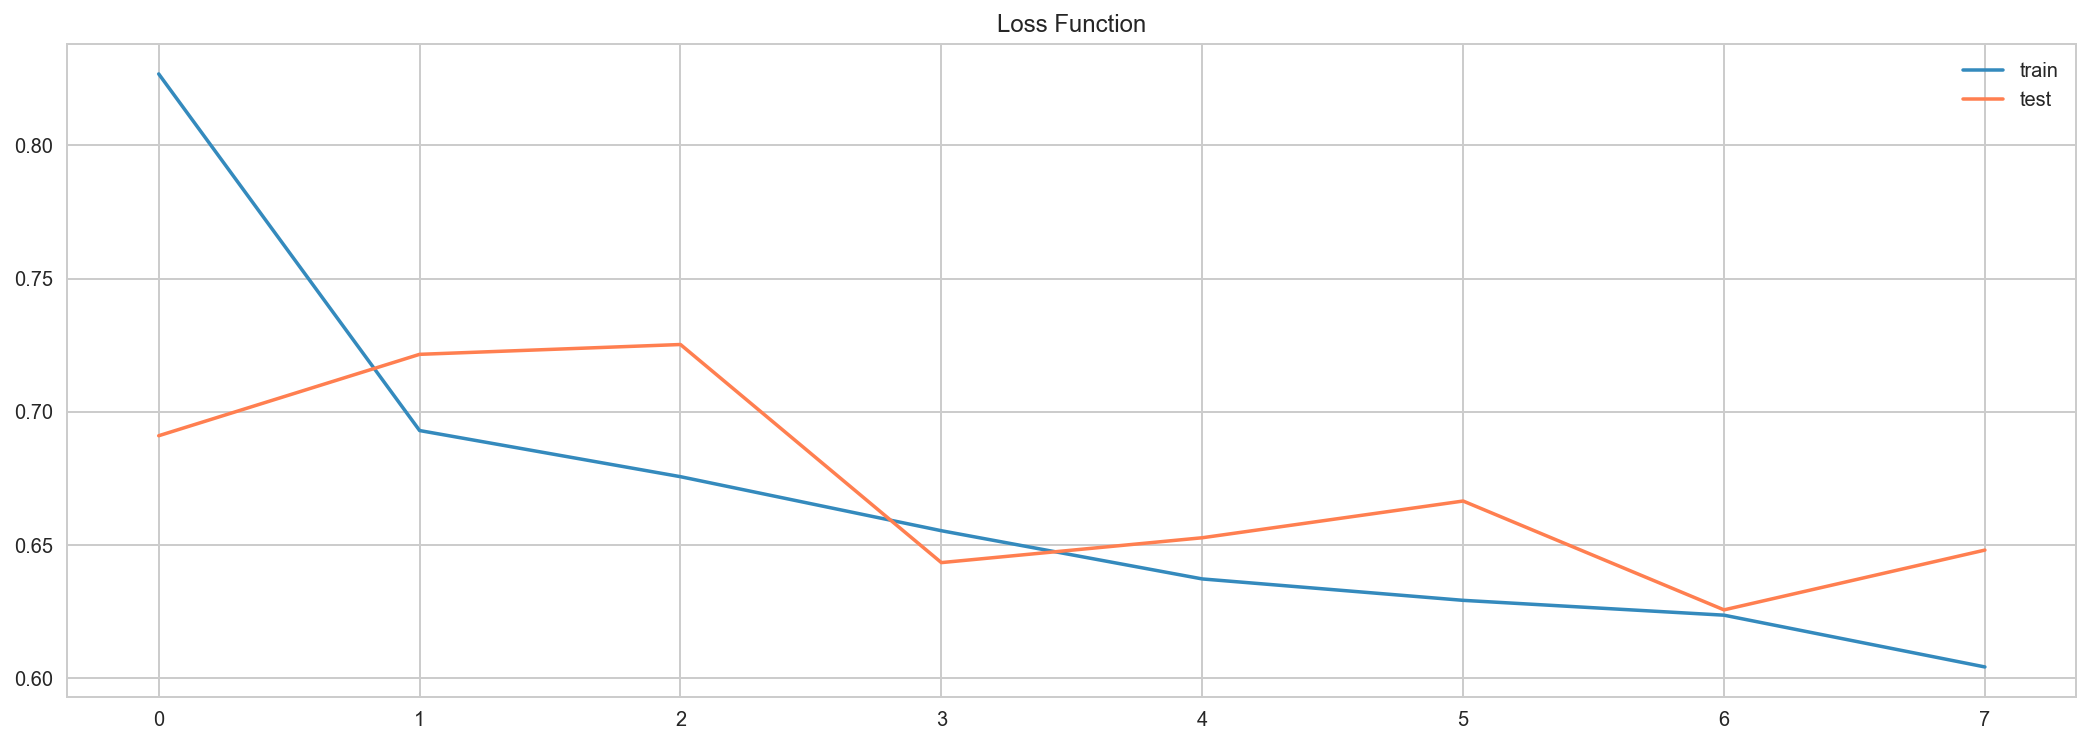

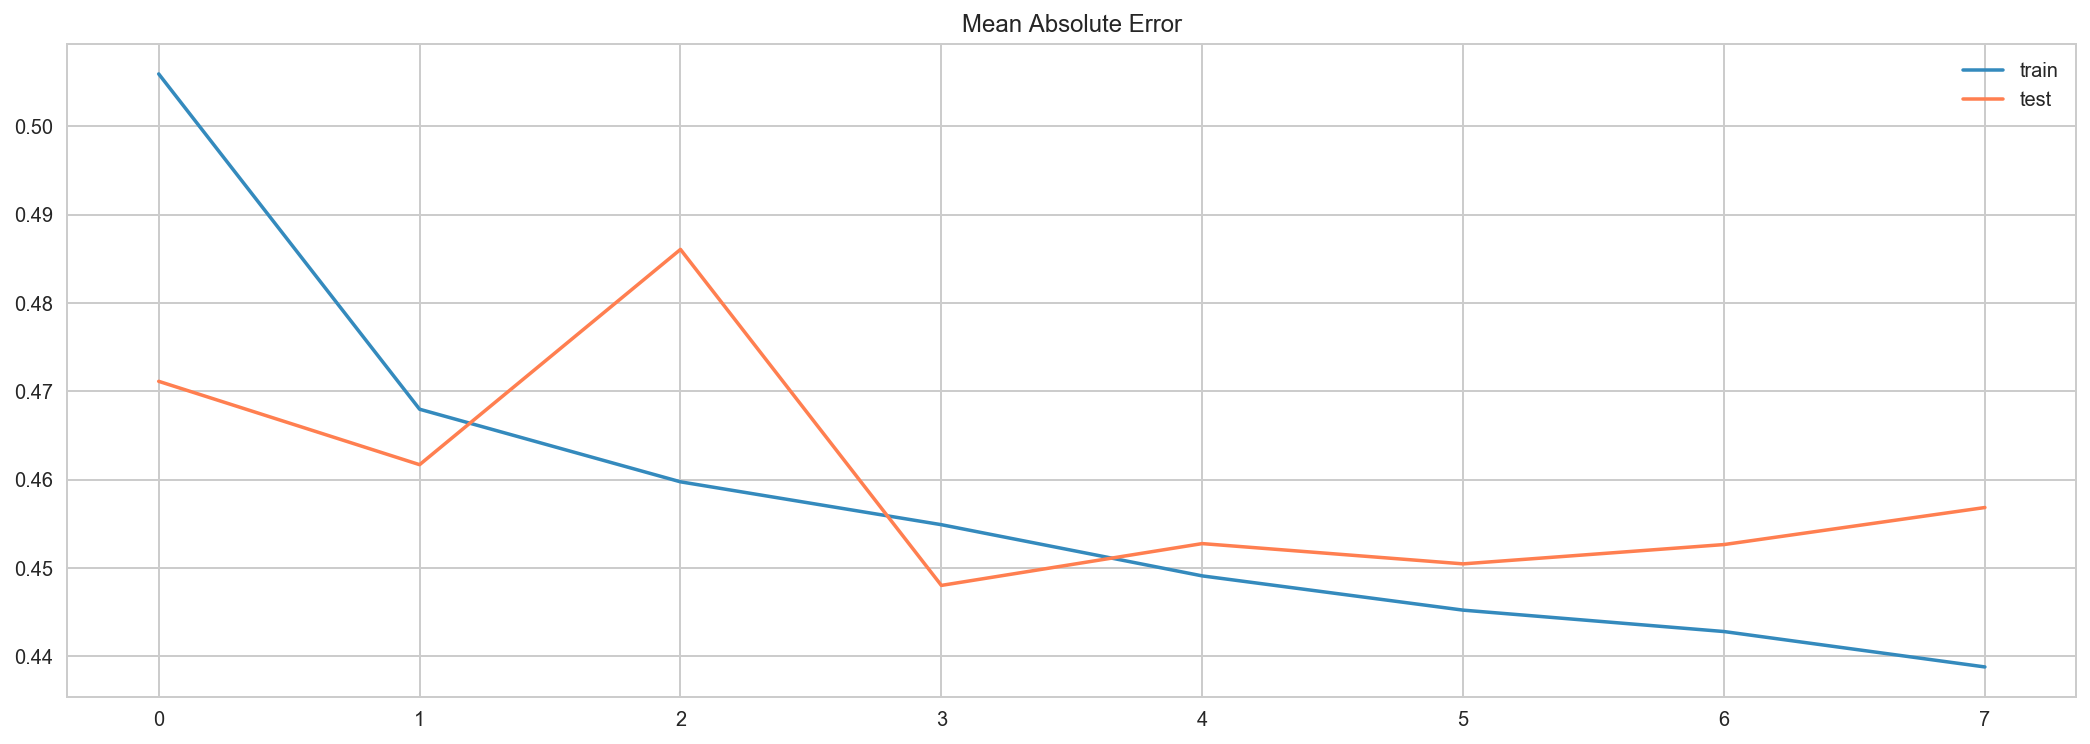

In [322]:
hide_code
loss_plot(rnn_history2)
mae_plot(rnn_history2)

In [323]:
hide_code
s_y_train_rnn2 = rnn_model2.predict(X_train2.reshape(16719, 1, 32))
s_y_test_rnn2 = rnn_model2.predict(X_test2.reshape(4180, 1, 32))

scores('RNN Model #2', s_y_train2, s_y_test2, s_y_train_rnn2, s_y_test_rnn2)

_______________________________________
RNN Model #2
_______________________________________
EV score. Train:  0.685670857225
EV score. Test:  0.679597402543
---------
R2 score. Train:  0.683087203938
R2 score. Test:  0.676119583212
---------
MSE score. Train:  0.576331133233
MSE score. Test:  0.648053584419
---------
MAE score. Train:  0.443593305802
MAE score. Test:  0.456857772297
---------
MdAE score. Train:  0.247995070438
MdAE score. Test:  0.255449966322


In [324]:
hide_code
rnn_model2.save('rnn_model2_p6.h5')

#### Display Predictions

In [325]:
hide_code
y_train_mlp = y_scale.inverse_transform(s_y_train_mlp)
y_test_mlp = y_scale.inverse_transform(s_y_test_mlp)

y_train_cnn = y_scale.inverse_transform(s_y_train_cnn)
y_test_cnn = y_scale.inverse_transform(s_y_test_cnn)

y_train_rnn = y_scale.inverse_transform(s_y_train_rnn)
y_test_rnn = y_scale.inverse_transform(s_y_test_rnn)
##########################################################
y_train_mlp2 = y_scale2.inverse_transform(s_y_train_mlp2)
y_test_mlp2 = y_scale2.inverse_transform(s_y_test_mlp2)

y_train_cnn2 = y_scale2.inverse_transform(s_y_train_cnn2)
y_test_cnn2 = y_scale2.inverse_transform(s_y_test_cnn2)

y_train_rnn2 = y_scale2.inverse_transform(s_y_train_rnn2)
y_test_rnn2 = y_scale2.inverse_transform(s_y_test_rnn2)

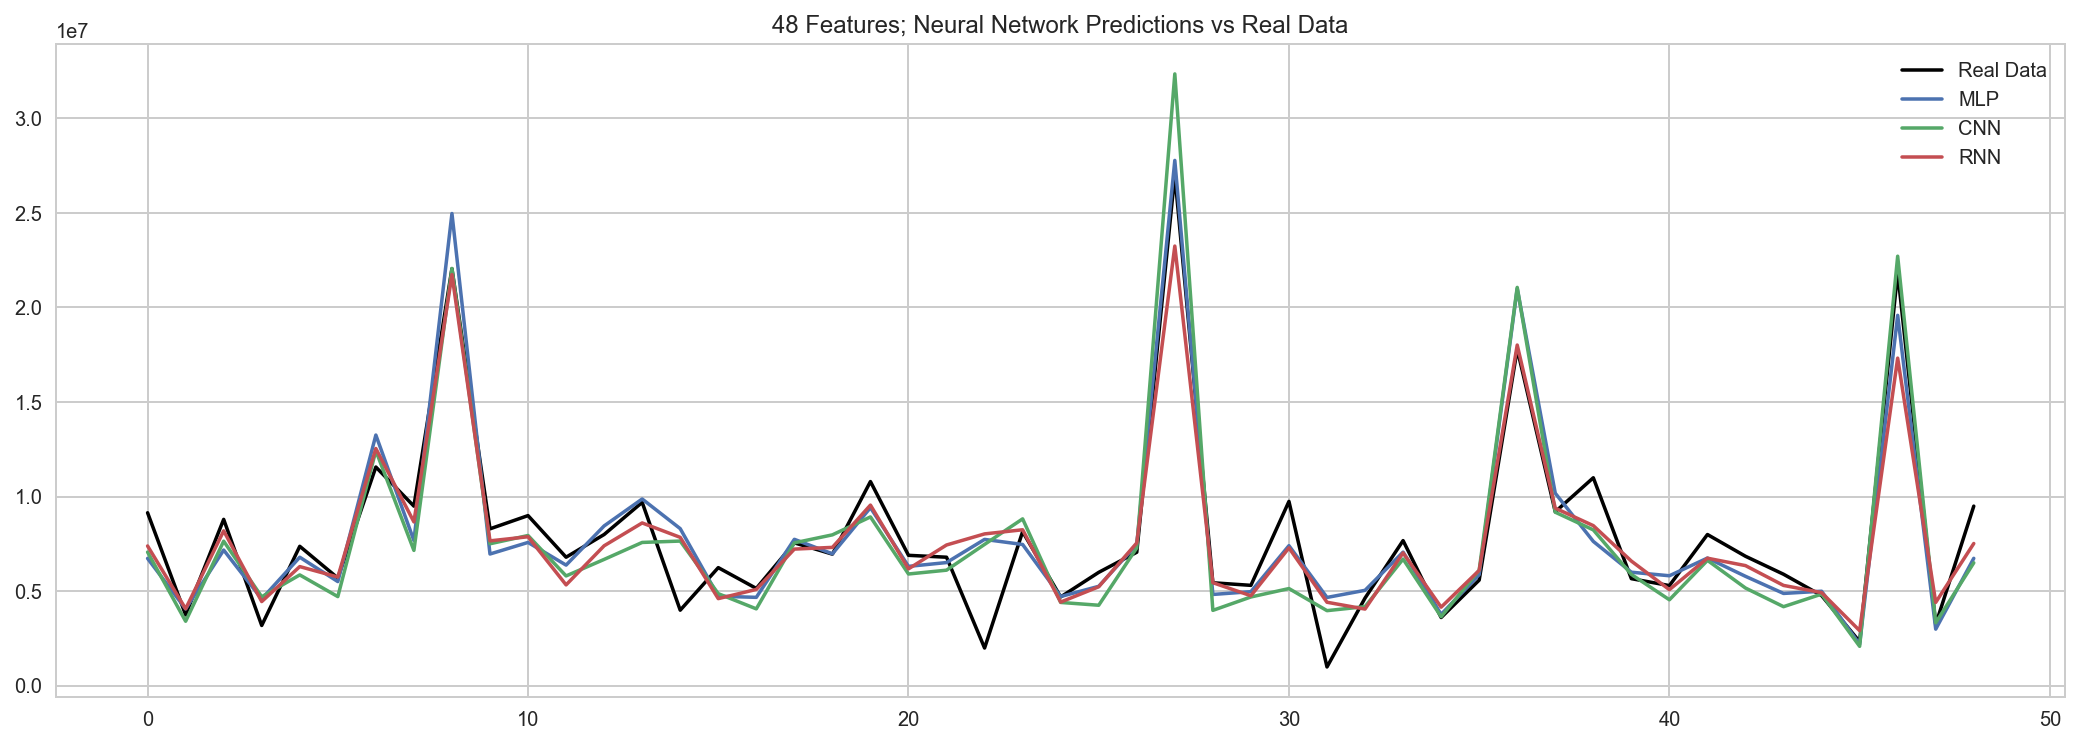

In [326]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test[1:50], color = 'black', label='Real Data')

plt.plot(y_test_mlp[1:50], label='MLP')
plt.plot(y_test_cnn[1:50], label='CNN')
plt.plot(y_test_rnn[1:50], label='RNN')

plt.legend()
plt.title("48 Features; Neural Network Predictions vs Real Data");

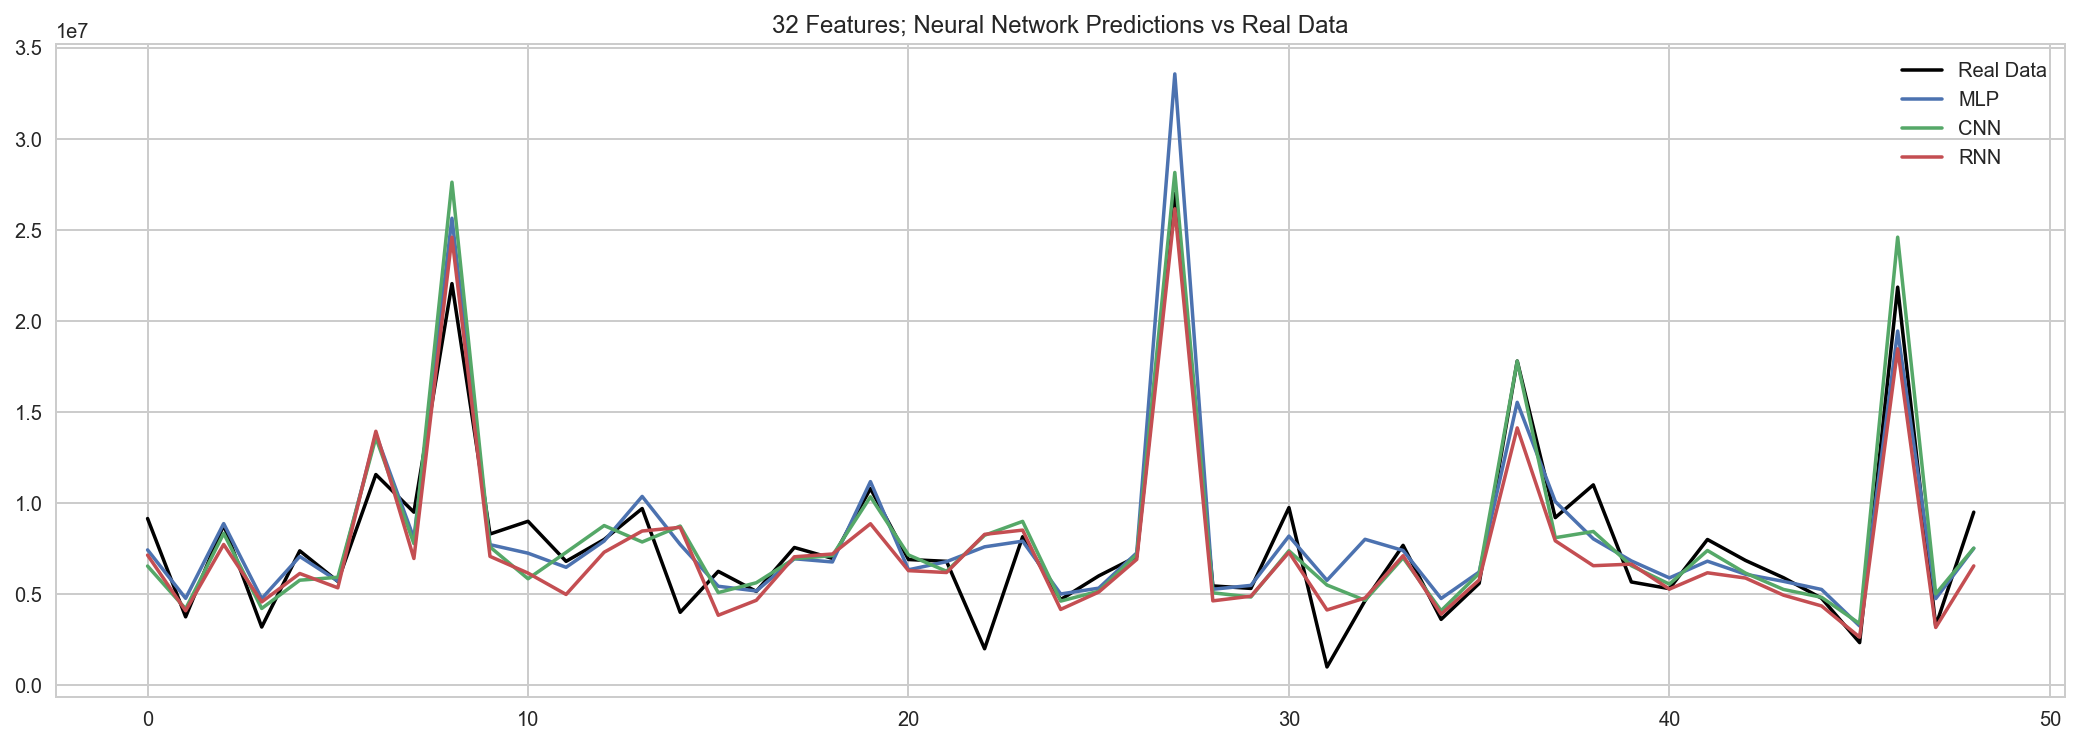

In [327]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(y_test2[1:50], color = 'black', label='Real Data')

plt.plot(y_test_mlp2[1:50], label='MLP')
plt.plot(y_test_cnn2[1:50], label='CNN')
plt.plot(y_test_rnn2[1:50], label='RNN')

plt.legend()
plt.title("32 Features; Neural Network Predictions vs Real Data");

----
## $\mathfrak {\color{#228B22} {7. \  Evaluation \ Metrics \ and \ Predictions }}$
- explained variance regression score
- coefficient of determination
- mean squared error
- mean absolute error
- median absolute error

In [265]:
hide_code
feature_scale = RobustScaler()
s_features_train = feature_scale.fit_transform(features_train)
s_features_test = feature_scale.transform(features_test)

target_scale = RobustScaler()
s_target_train = target_scale.fit_transform(target_train)
##################################################################
feature_scale2 = RobustScaler()
s_features_train2 = feature_scale2.fit_transform(features_train2)
s_features_test2 = feature_scale2.transform(features_test2)

target_scale2 = RobustScaler()
s_target_train2 = target_scale2.fit_transform(target_train2)

### 7.1 Regressors; Scikit-Learn
#### 48 Features

In [266]:
hide_code
gbr = GradientBoostingRegressor(max_depth=4, n_estimators=240)
gbr.fit(s_features_train, target_train)

target_train_predict_gbr = gbr.predict(s_features_train)
target_test_predict_gbr = gbr.predict(s_features_test)

scores2('Gradient Boosting Regressor', target_train, target_train_predict_gbr)

_______________________________________
Gradient Boosting Regressor
_______________________________________
EV score: 0.835396125665
---------
R2 score: 0.835396125665
---------
MSE score: 3.95738887867e+12
---------
MAE score: 1219859.03004
---------
MdAE score: 660793.732442


In [267]:
hide_code
br = BaggingRegressor(n_estimators=384)
br.fit(s_features_train, target_train)

target_train_predict_br = br.predict(s_features_train)
target_test_predict_br = br.predict(s_features_test)

scores2('Bagging Regressor', target_train, target_train_predict_br)

_______________________________________
Bagging Regressor
_______________________________________
EV score: 0.958941592523
---------
R2 score: 0.958920248592
---------
MSE score: 987635023893.0
---------
MAE score: 514105.818252
---------
MdAE score: 221116.169271


In [268]:
hide_code
target_train_predict_mlpr = mlpr.predict(s_features_train)
target_test_predict_mlpr = mlpr.predict(s_features_test)

scores2('MLP Regressor', target_train, target_train_predict_mlpr)

_______________________________________
MLP Regressor
_______________________________________
EV score: 0.661052576314
---------
R2 score: 0.660919525383
---------
MSE score: 8.15213678684e+12
---------
MAE score: 1617871.14194
---------
MdAE score: 896876.338598


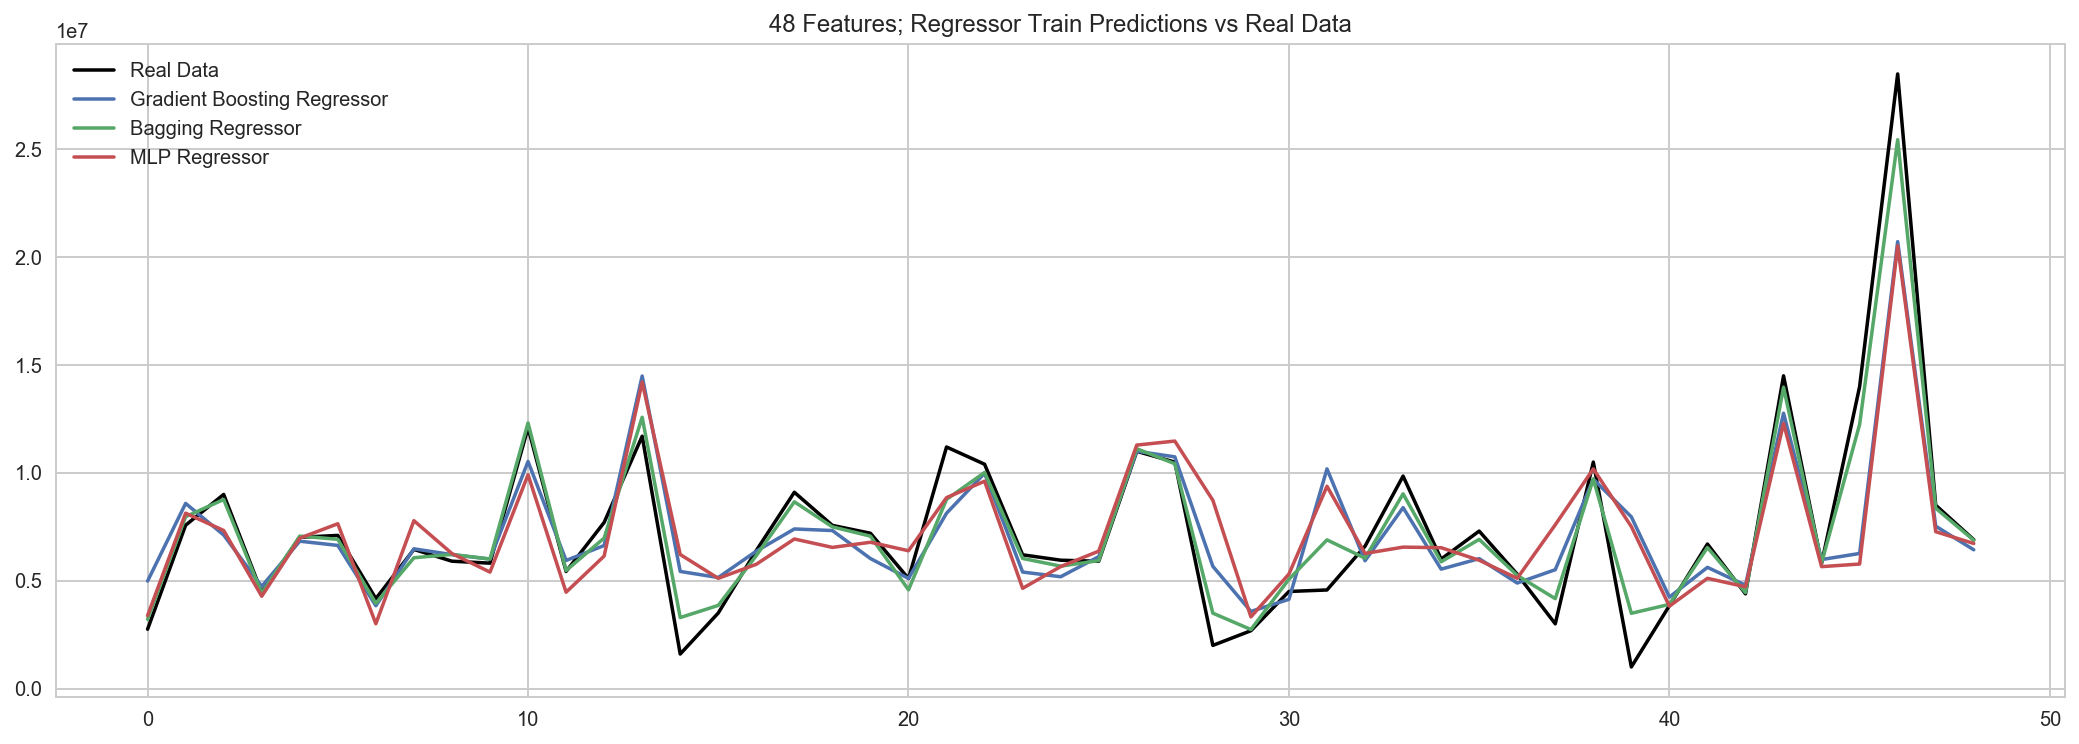

In [286]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_train[1:50], color = 'black', label='Real Data')

plt.plot(target_train_predict_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_train_predict_br[1:50], label='Bagging Regressor')
plt.plot(target_train_predict_mlpr[1:50], label='MLP Regressor')

plt.legend()
plt.title("48 Features; Regressor Train Predictions vs Real Data");

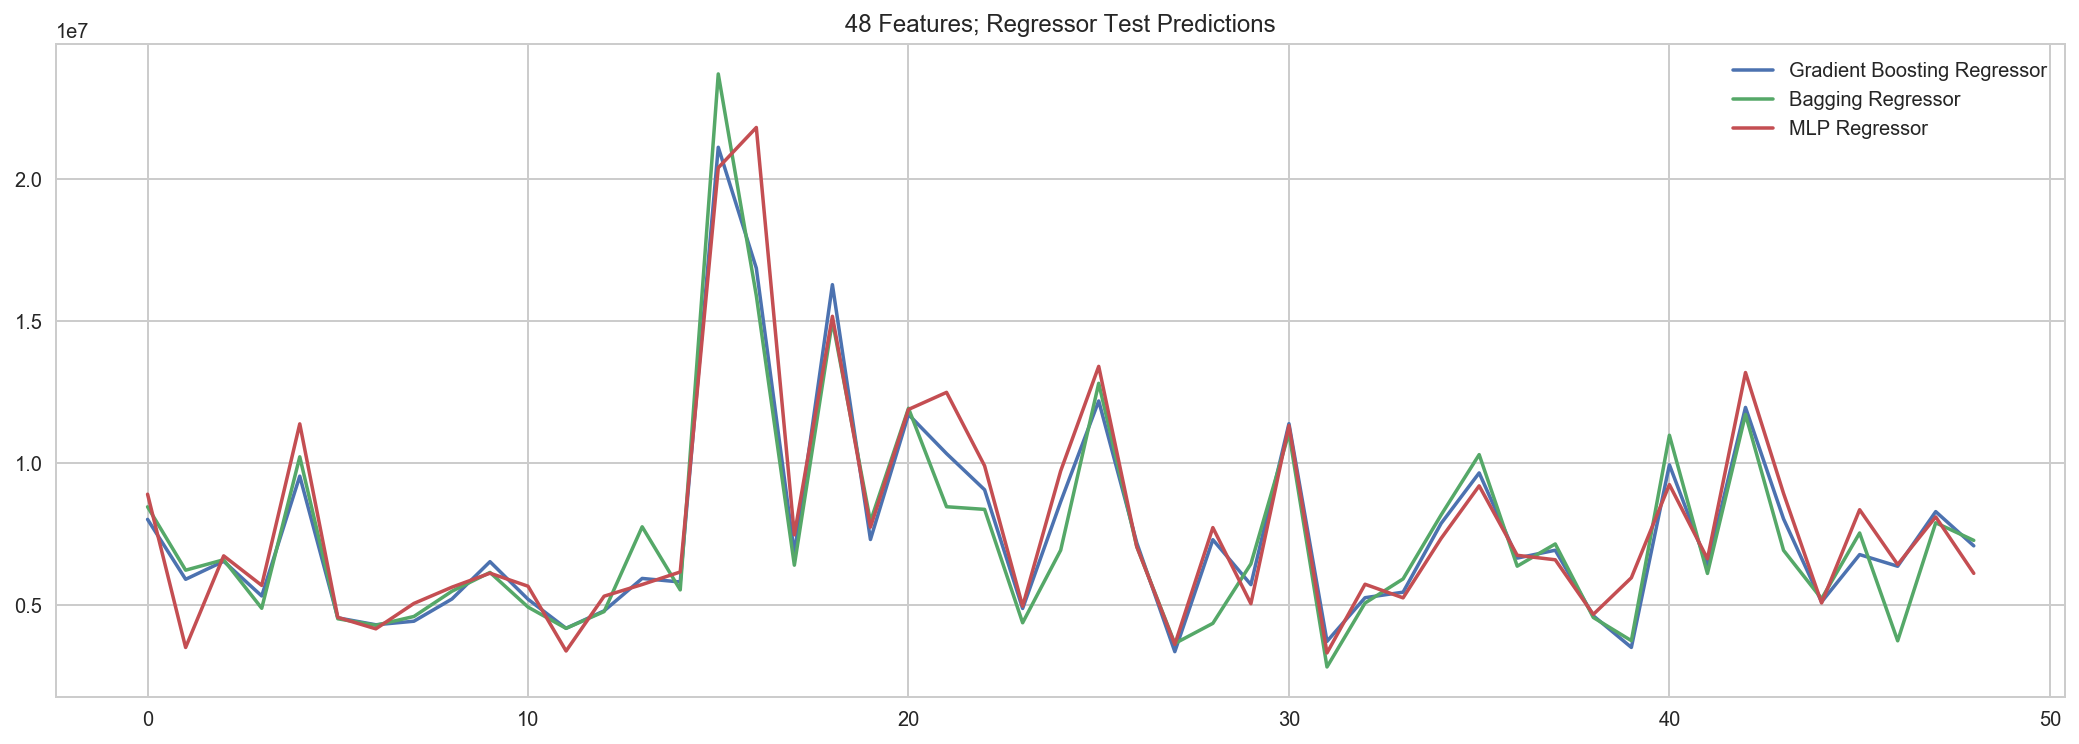

In [269]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_test_predict_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_test_predict_br[1:50], label='Bagging Regressor')
plt.plot(target_test_predict_mlpr[1:50], label='MLP Regressor')

plt.legend()
plt.title("48 Features; Regressor Test Predictions");

#### 32 features

In [270]:
hide_code
gbr2 = GradientBoostingRegressor(max_depth=4, n_estimators=288)
gbr2.fit(s_features_train2, target_train2)

target_train_predict_gbr2 = gbr2.predict(s_features_train2)
target_test_predict_gbr2 = gbr2.predict(s_features_test2)

scores2('Gradient Boosting Regressor', target_train2, target_train_predict_gbr2)

_______________________________________
Gradient Boosting Regressor
_______________________________________
EV score: 0.834612329764
---------
R2 score: 0.834612329764
---------
MSE score: 3.97623281654e+12
---------
MAE score: 1237975.70044
---------
MdAE score: 665922.657359


In [271]:
hide_code
br2 = BaggingRegressor(n_estimators=128)
br2.fit(s_features_train2, target_train2)

target_train_predict_br2 = br2.predict(s_features_train2)
target_test_predict_br2 = br2.predict(s_features_test2)

scores2('Bagging Regressor', target_train2, target_train_predict_br2)

_______________________________________
Bagging Regressor
_______________________________________
EV score: 0.949770566288
---------
R2 score: 0.949742469935
---------
MSE score: 1.2082862044e+12
---------
MAE score: 609454.073131
---------
MdAE score: 304172.067708


In [272]:
hide_code
target_train_predict_mlpr2 = mlpr2.predict(s_features_train2)
target_test_predict_mlpr2 = mlpr2.predict(s_features_test2)

scores2('MLP Regressor', target_train2, target_train_predict_mlpr2)

_______________________________________
MLP Regressor
_______________________________________
EV score: 0.691683161903
---------
R2 score: 0.691679591662
---------
MSE score: 7.41260653767e+12
---------
MAE score: 1551042.92678
---------
MdAE score: 819868.405609


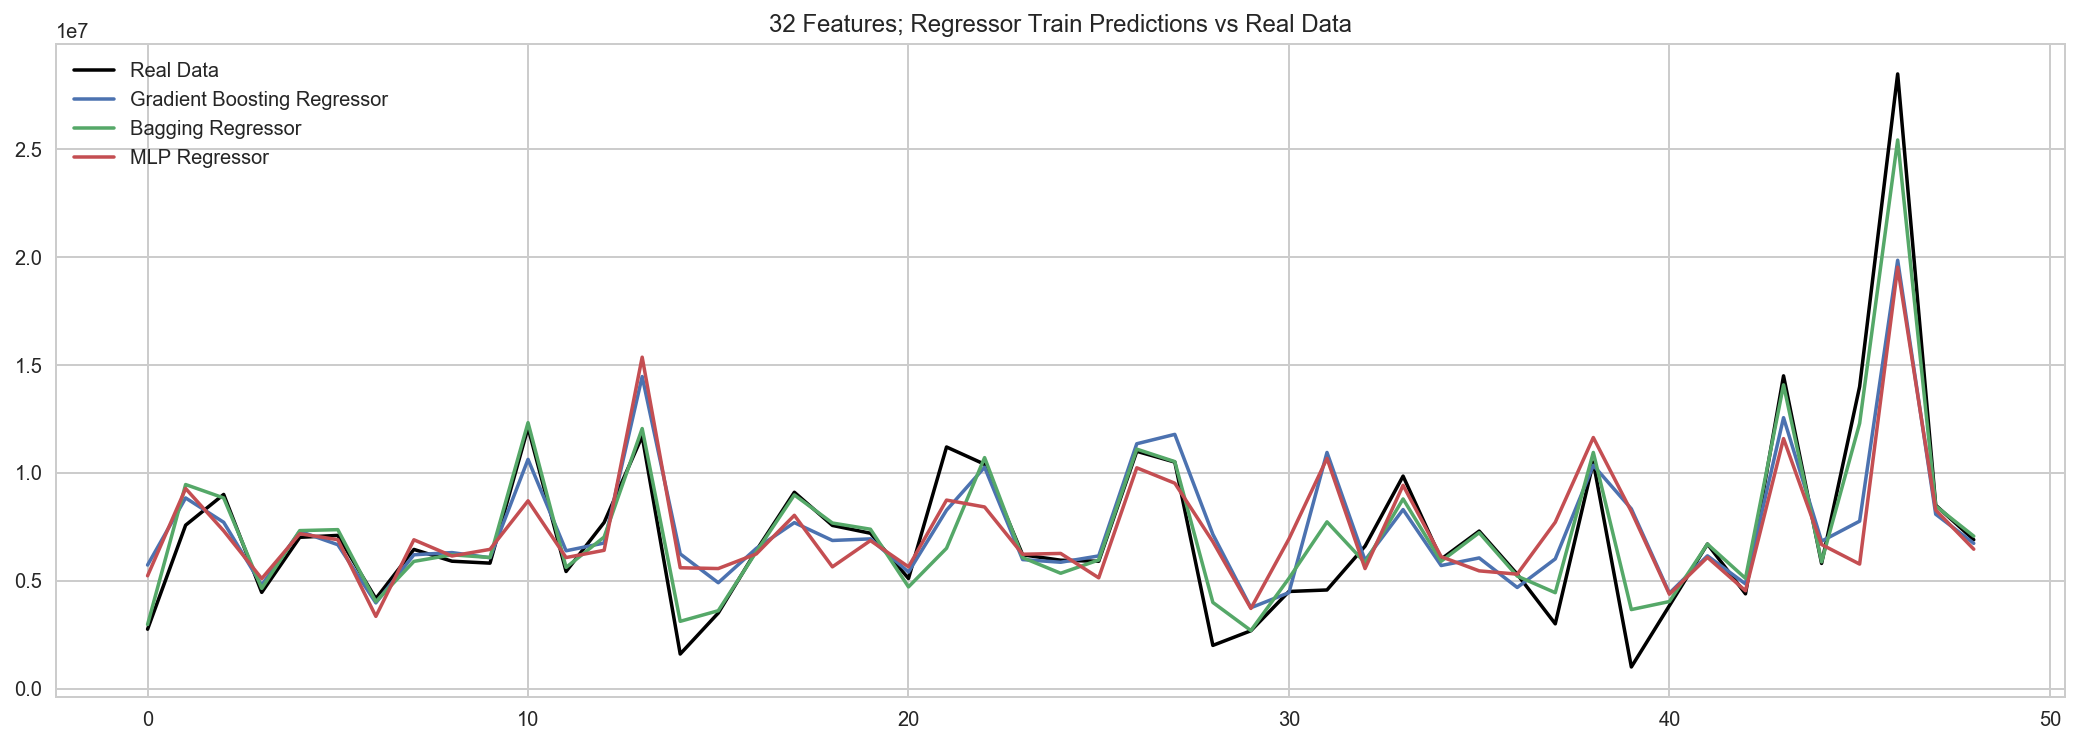

In [287]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_train2[1:50], color = 'black', label='Real Data')

plt.plot(target_train_predict_gbr2[1:50], label='Gradient Boosting Regressor')
plt.plot(target_train_predict_br2[1:50], label='Bagging Regressor')
plt.plot(target_train_predict_mlpr2[1:50], label='MLP Regressor')

plt.legend()
plt.title("32 Features; Regressor Train Predictions vs Real Data");

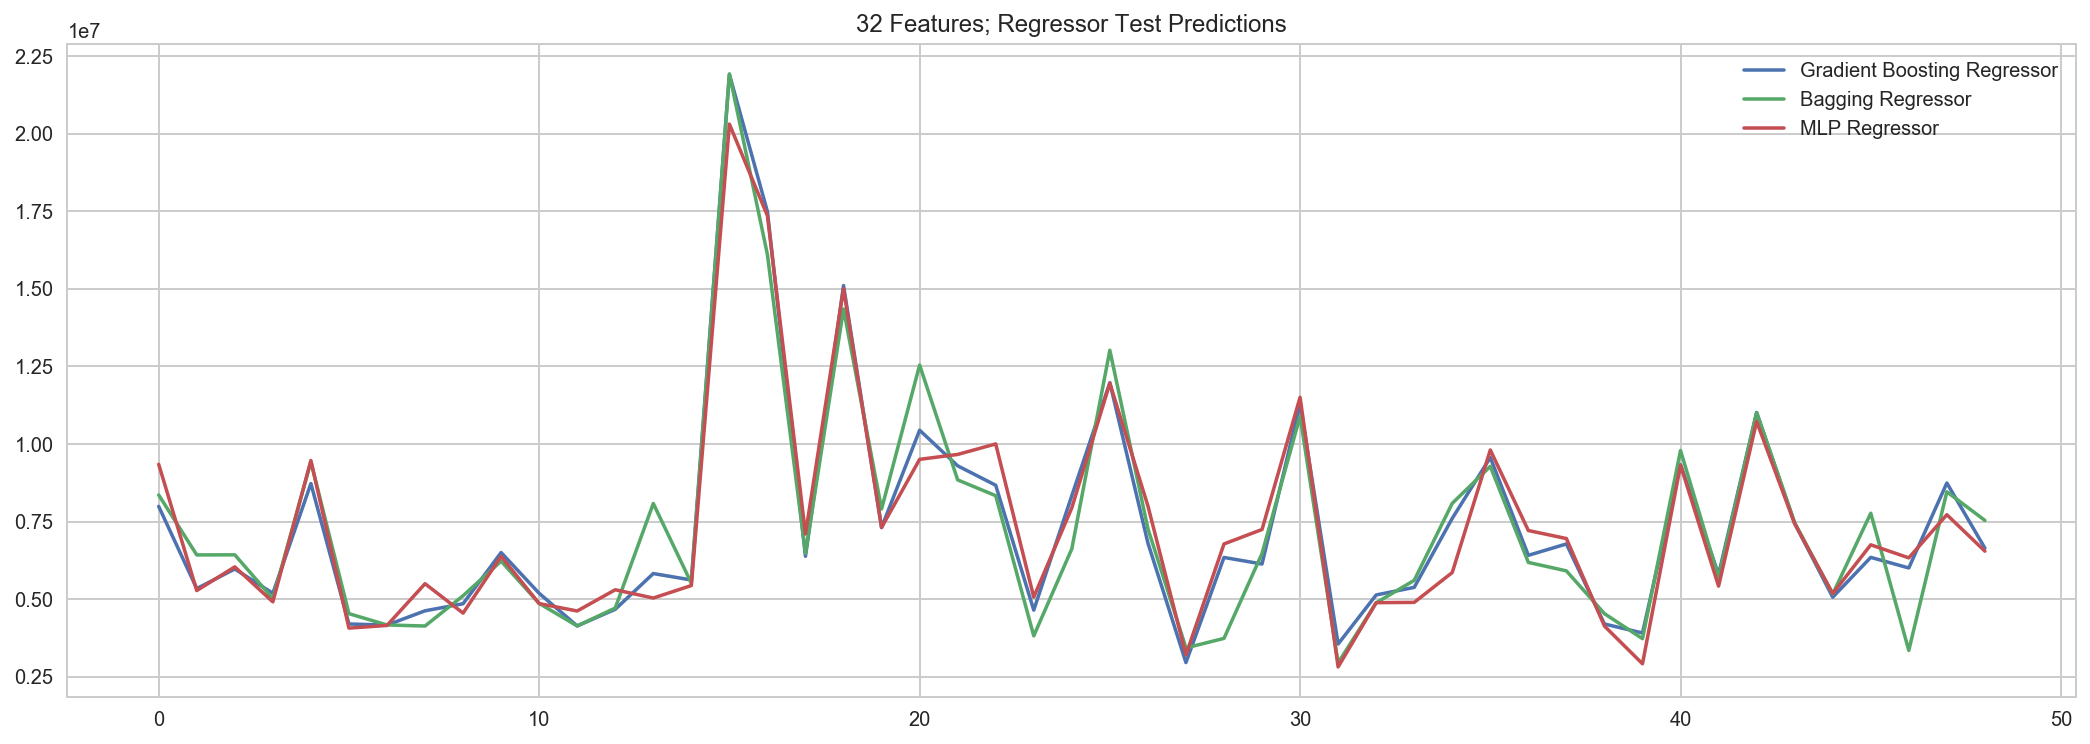

In [273]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_test_predict_gbr2[1:50], label='Gradient Boosting Regressor')
plt.plot(target_test_predict_br2[1:50], label='Bagging Regressor')
plt.plot(target_test_predict_mlpr2[1:50], label='MLP Regressor')

plt.legend()
plt.title("32 Features; Regressor Test Predictions");

### 7.2 Neural Networks; Keras
#### 48 Features

In [328]:
hide_code
s_target_train_predict_mlp = mlp_model.predict(s_features_train)
s_target_test_predict_mlp = mlp_model.predict(s_features_test)

scores2('MLP #1', s_target_train, s_target_train_predict_mlp)

_______________________________________
MLP #1
_______________________________________
EV score: 0.659932976857
---------
R2 score: 0.65991589204
---------
MSE score: 0.627694086816
---------
MAE score: 0.409889233662
---------
MdAE score: 0.204511690657


In [329]:
hide_code
s_target_train_predict_cnn = cnn_model.predict(s_features_train.reshape(20899, 48, 1))
s_target_test_predict_cnn = cnn_model.predict(s_features_test.reshape(7662, 48, 1))

scores2('CNN #1', s_target_train, s_target_train_predict_cnn)

_______________________________________
CNN #1
_______________________________________
EV score: 0.709791724567
---------
R2 score: 0.706366979916
---------
MSE score: 0.541959197993
---------
MAE score: 0.442228825269
---------
MdAE score: 0.274670204096


In [330]:
hide_code
s_target_train_predict_rnn = rnn_model.predict(s_features_train.reshape(20899, 1, 48))
s_target_test_predict_rnn = rnn_model.predict(s_features_test.reshape(7662, 1, 48))

scores2('RNN #1', s_target_train, s_target_train_predict_rnn)

_______________________________________
RNN #1
_______________________________________
EV score: 0.689047916827
---------
R2 score: 0.688915940005
---------
MSE score: 0.57416862591
---------
MAE score: 0.416860225458
---------
MdAE score: 0.2055714523


In [331]:
hide_code
target_train_predict_mlp = target_scale.inverse_transform(s_target_train_predict_mlp)
target_test_predict_mlp = target_scale.inverse_transform(s_target_test_predict_mlp)

target_train_predict_cnn = target_scale.inverse_transform(s_target_train_predict_cnn)
target_test_predict_cnn = target_scale.inverse_transform(s_target_test_predict_cnn)

target_train_predict_rnn = target_scale.inverse_transform(s_target_train_predict_rnn)
target_test_predict_rnn = target_scale.inverse_transform(s_target_test_predict_rnn)

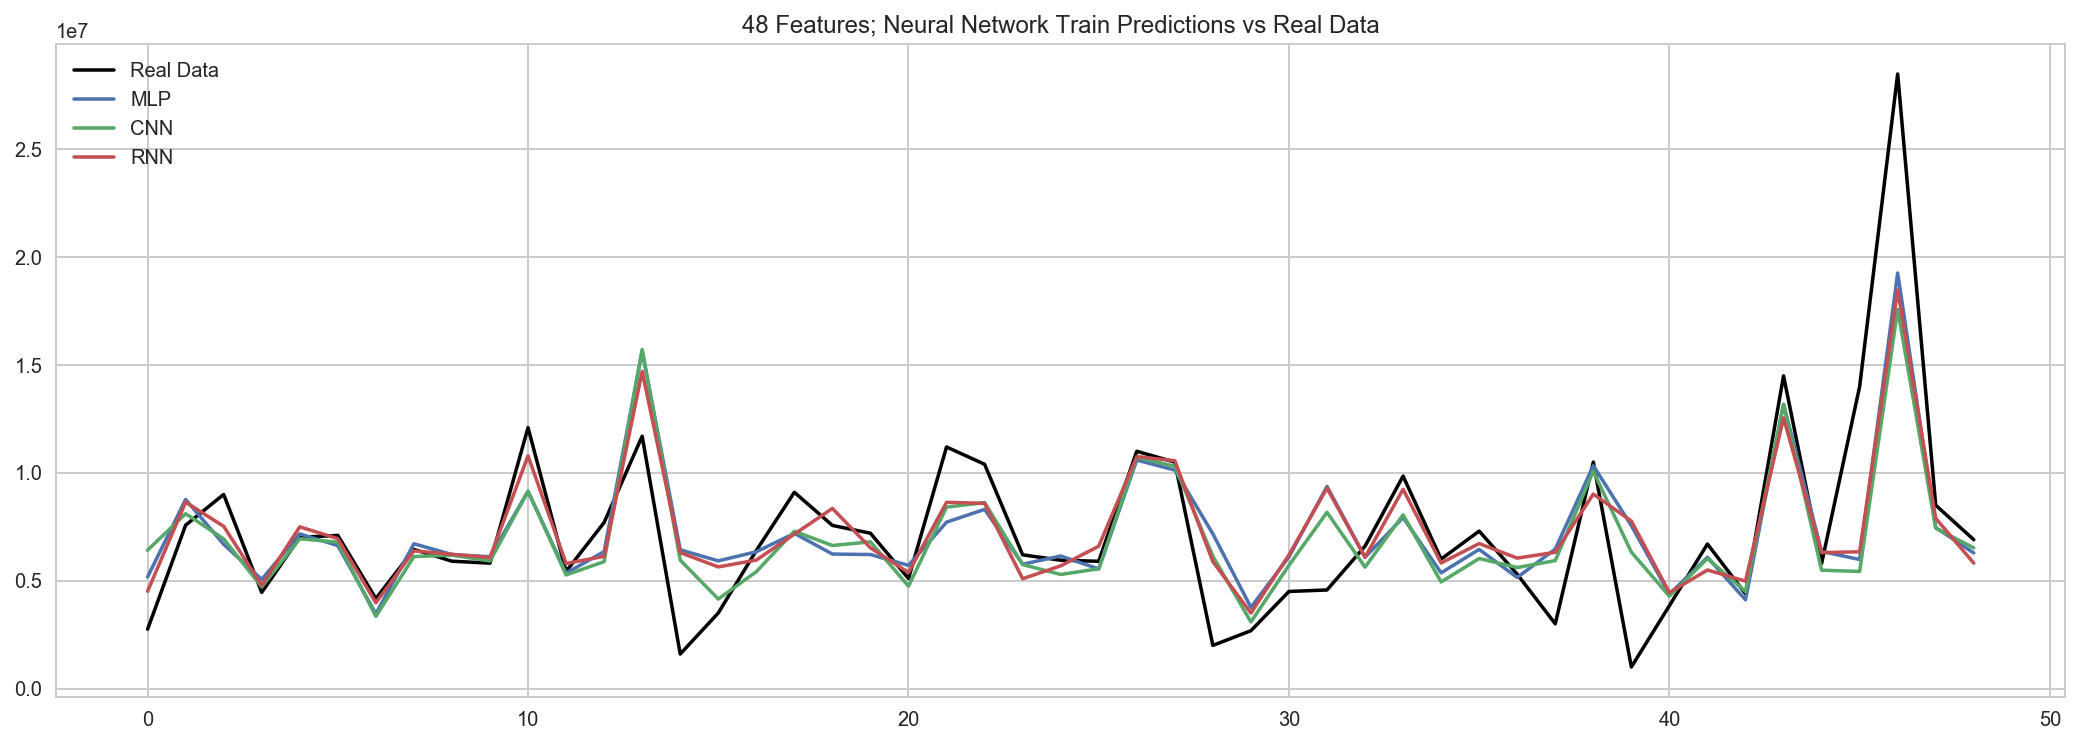

In [332]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_train[1:50], color = 'black', label='Real Data')

plt.plot(target_train_predict_mlp[1:50], label='MLP')
plt.plot(target_train_predict_cnn[1:50], label='CNN')
plt.plot(target_train_predict_rnn[1:50], label='RNN')

plt.legend()
plt.title("48 Features; Neural Network Train Predictions vs Real Data");

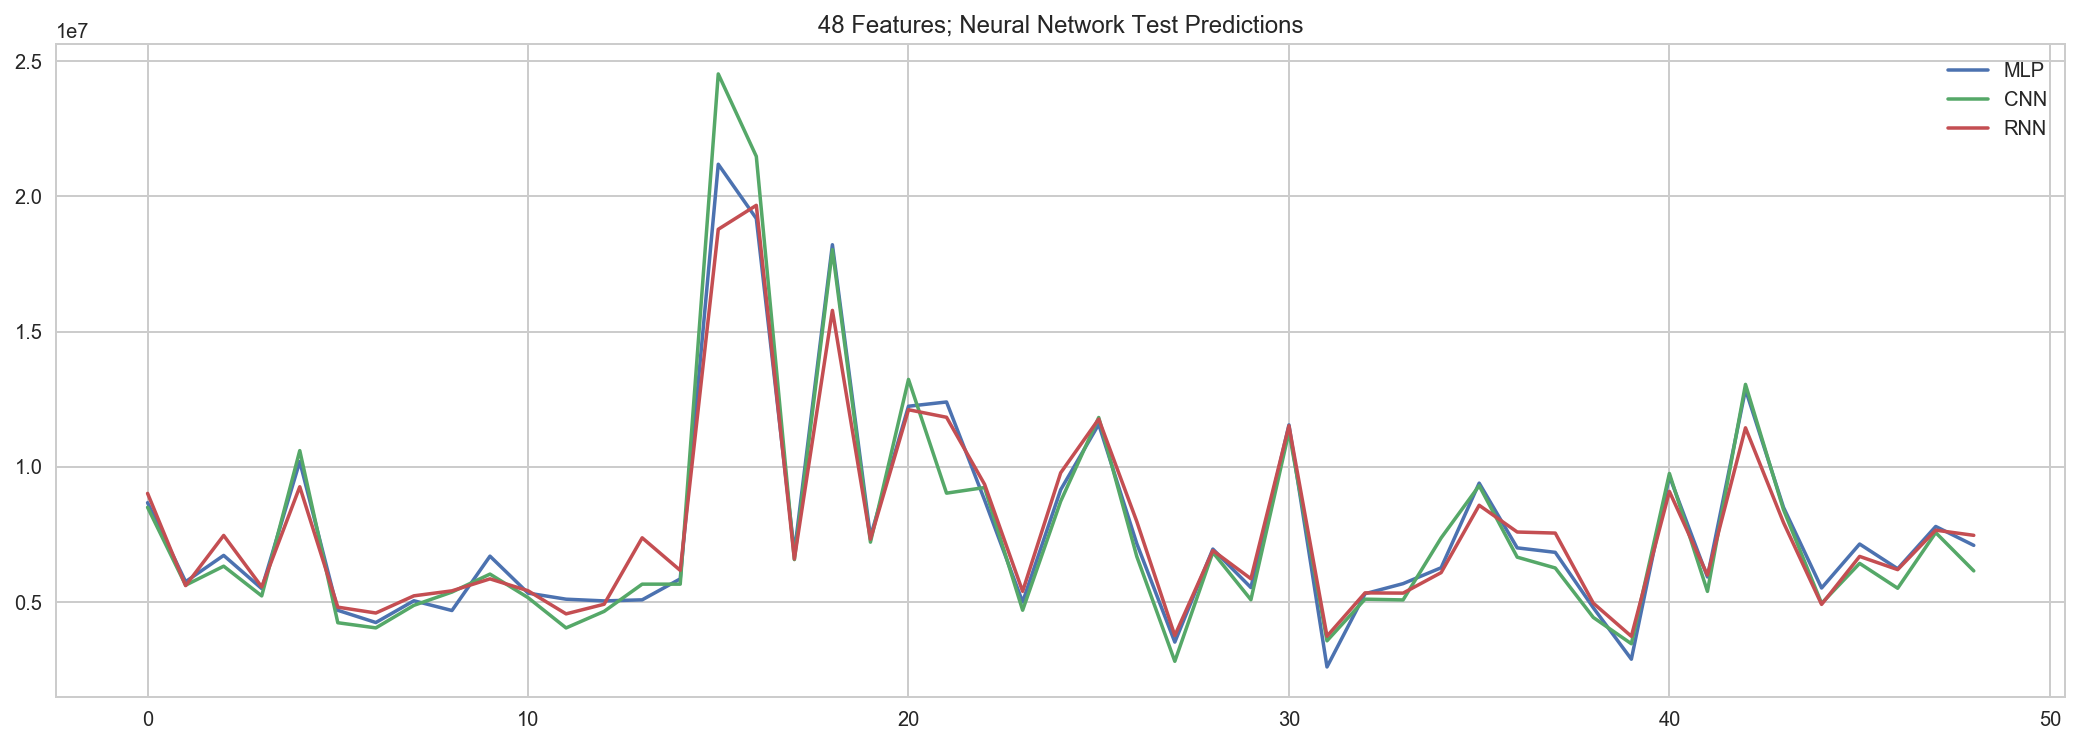

In [333]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_test_predict_mlp[1:50], label='MLP')
plt.plot(target_test_predict_cnn[1:50], label='CNN')
plt.plot(target_test_predict_rnn[1:50], label='RNN')

plt.legend()
plt.title("48 Features; Neural Network Test Predictions");

#### 32 Features

In [334]:
hide_code

s_target_train_predict_mlp2 = mlp_model2.predict(s_features_train2)
s_target_test_predict_mlp2 = mlp_model2.predict(s_features_test2)

scores2('MLP #2', s_target_train2, s_target_train_predict_mlp2)

_______________________________________
MLP #2
_______________________________________
EV score: 0.650691445827
---------
R2 score: 0.638044350772
---------
MSE score: 0.668062445119
---------
MAE score: 0.445446480158
---------
MdAE score: 0.223421678064


In [335]:
hide_code

s_target_train_predict_cnn2 = cnn_model2.predict(s_features_train2.reshape(20899, 32, 1))
s_target_test_predict_cnn2 = cnn_model2.predict(s_features_test2.reshape(7662, 32, 1))

scores2('CNN #2', s_target_train2, s_target_train_predict_cnn2)

_______________________________________
CNN #2
_______________________________________
EV score: 0.684566911131
---------
R2 score: 0.683761274822
---------
MSE score: 0.583682604304
---------
MAE score: 0.421296994369
---------
MdAE score: 0.215244899004


In [336]:
hide_code

s_target_train_predict_rnn2 = rnn_model2.predict(s_features_train2.reshape(20899, 1, 32))
s_target_test_predict_rnn2 = rnn_model2.predict(s_features_test2.reshape(7662, 1, 32))

scores2('RNN #2', s_target_train2, s_target_train_predict_rnn2)

_______________________________________
RNN #2
_______________________________________
EV score: 0.684508238477
---------
R2 score: 0.681688799995
---------
MSE score: 0.587507776263
---------
MAE score: 0.445205277085
---------
MdAE score: 0.249079478908


In [337]:
hide_code
target_train_predict_mlp2 = target_scale2.inverse_transform(s_target_train_predict_mlp2)
target_test_predict_mlp2 = target_scale2.inverse_transform(s_target_test_predict_mlp2)

target_train_predict_cnn2 = target_scale2.inverse_transform(s_target_train_predict_cnn2)
target_test_predict_cnn2 = target_scale2.inverse_transform(s_target_test_predict_cnn2)

target_train_predict_rnn2 = target_scale2.inverse_transform(s_target_train_predict_rnn2)
target_test_predict_rnn2 = target_scale2.inverse_transform(s_target_test_predict_rnn2)

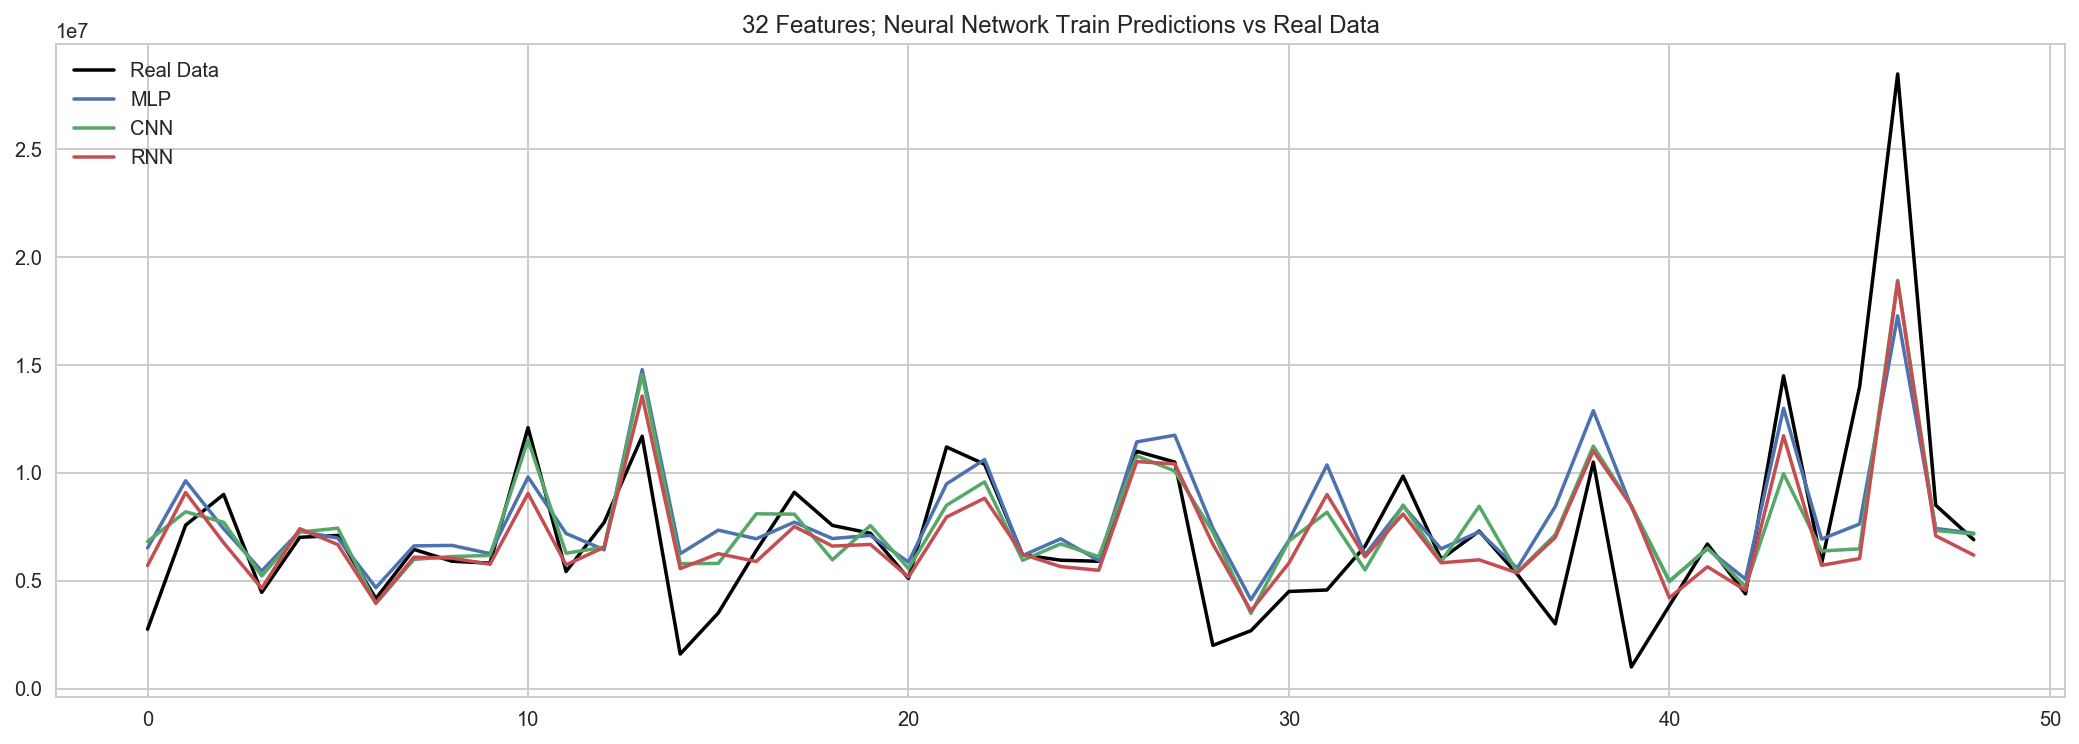

In [338]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_train2[1:50], color = 'black', label='Real Data')

plt.plot(target_train_predict_mlp2[1:50], label='MLP')
plt.plot(target_train_predict_cnn2[1:50], label='CNN')
plt.plot(target_train_predict_rnn2[1:50], label='RNN')

plt.legend()
plt.title("32 Features; Neural Network Train Predictions vs Real Data");

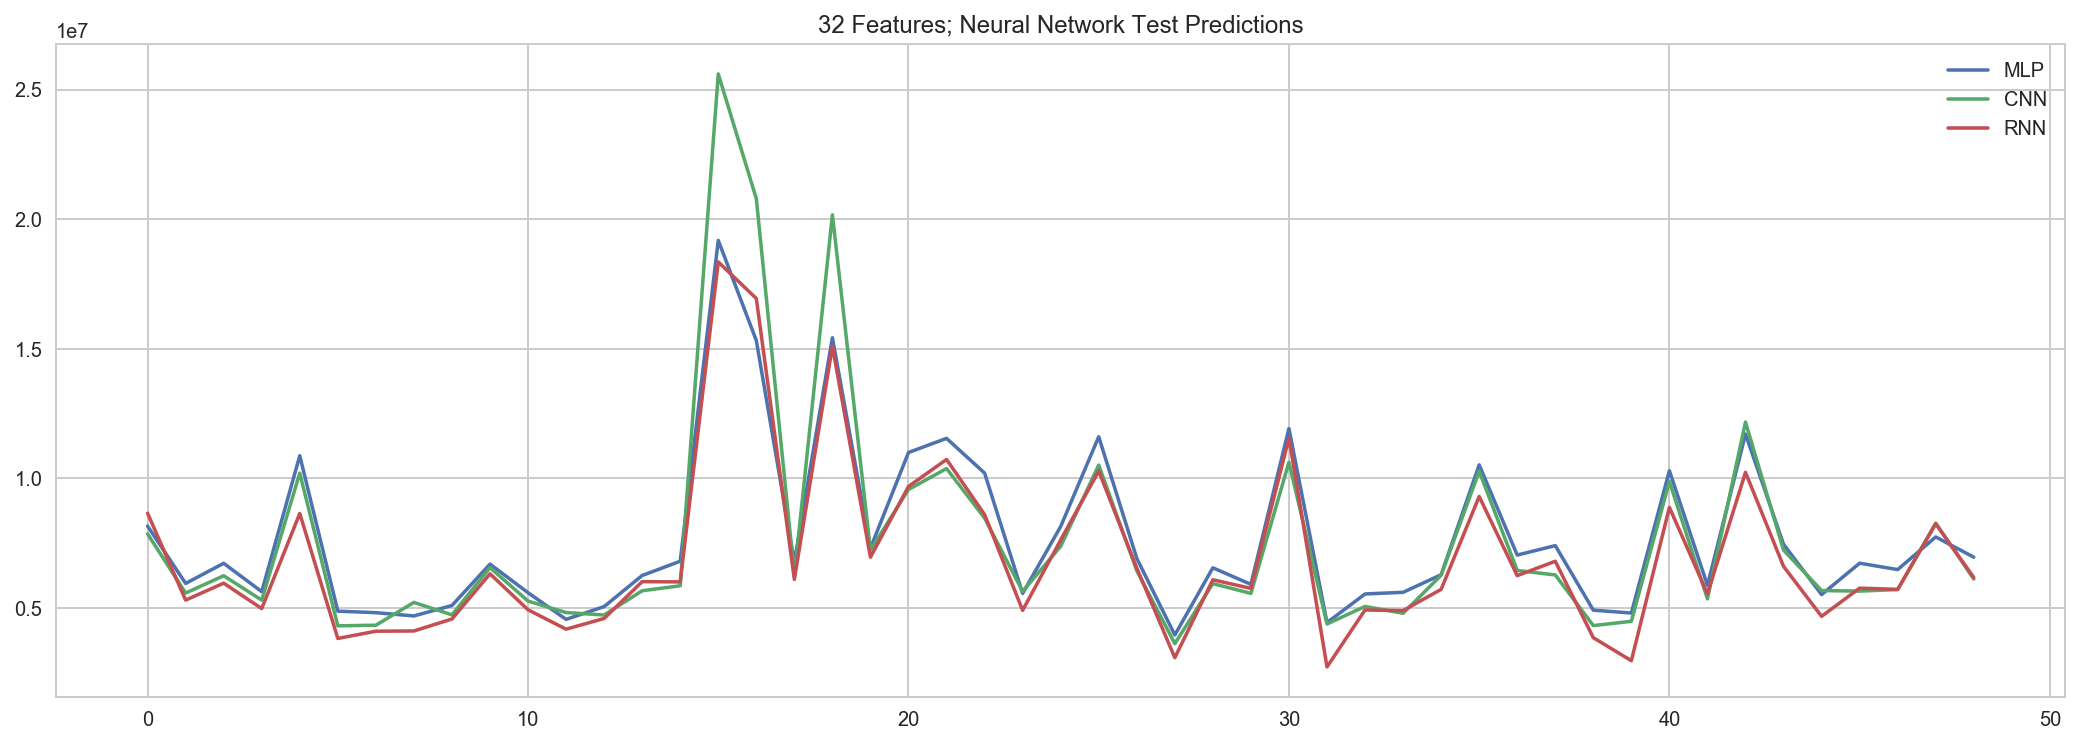

In [339]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_test_predict_mlp2[1:50], label='MLP')
plt.plot(target_test_predict_cnn2[1:50], label='CNN')
plt.plot(target_test_predict_rnn2[1:50], label='RNN')

plt.legend()
plt.title("32 Features; Neural Network Test Predictions");

#### Display All Predictions

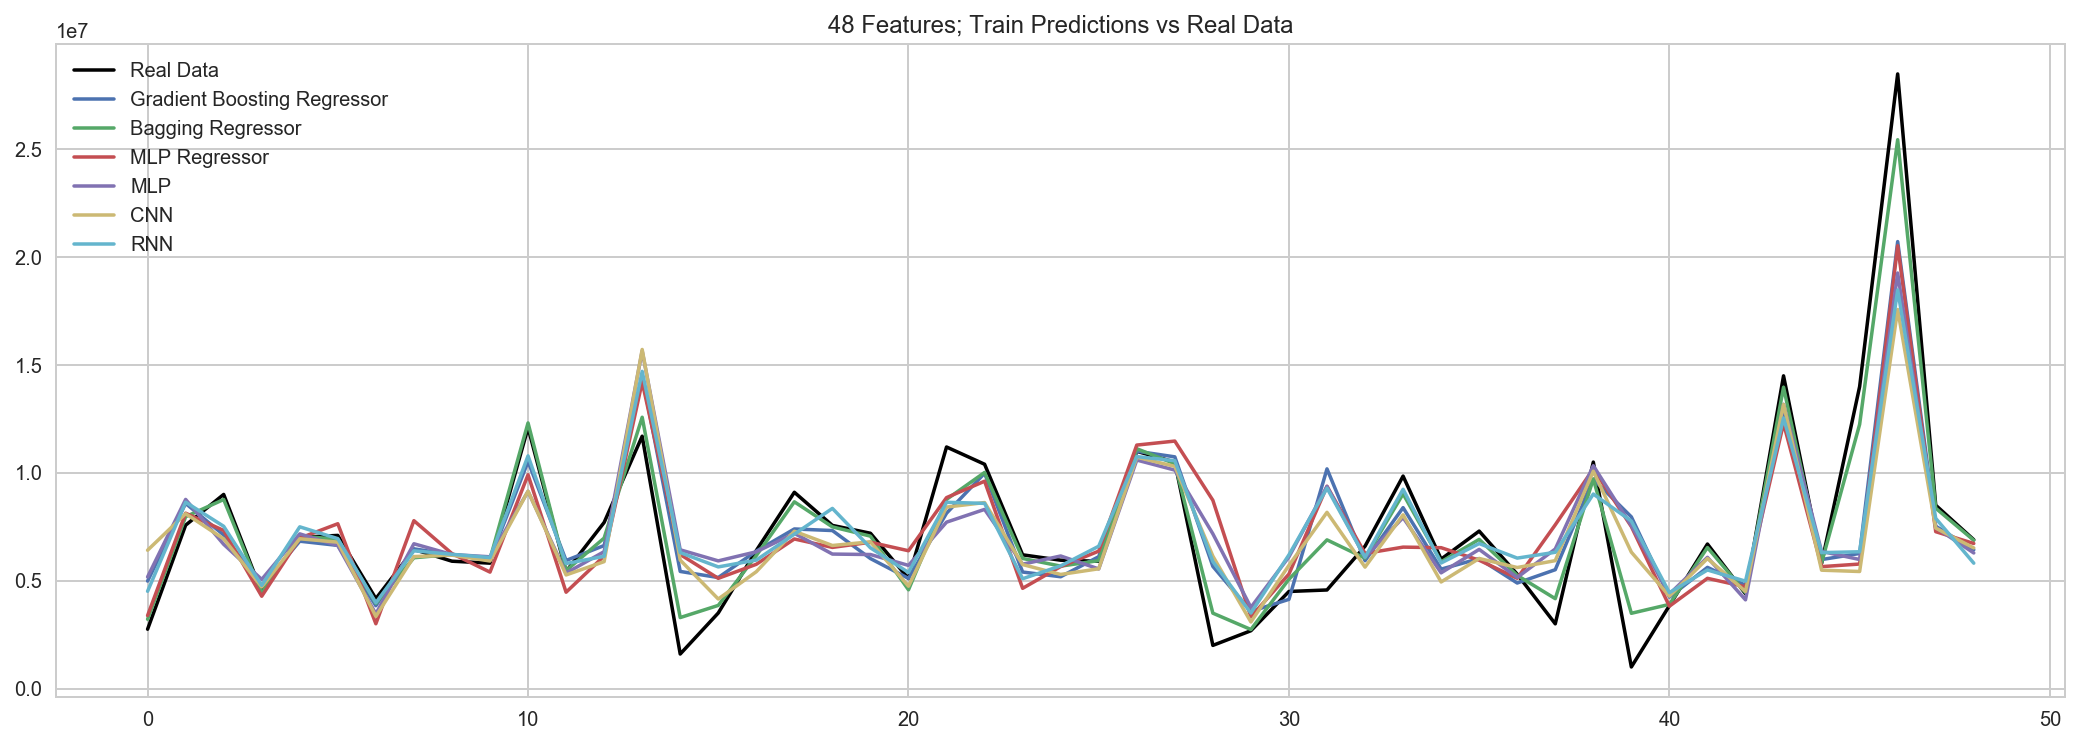

In [340]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_train[1:50], color = 'black', label='Real Data')

plt.plot(target_train_predict_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_train_predict_br[1:50], label='Bagging Regressor')
plt.plot(target_train_predict_mlpr[1:50], label='MLP Regressor')

plt.plot(target_train_predict_mlp[1:50], label='MLP')
plt.plot(target_train_predict_cnn[1:50], label='CNN')
plt.plot(target_train_predict_rnn[1:50], label='RNN')

plt.legend()
plt.title("48 Features; Train Predictions vs Real Data");

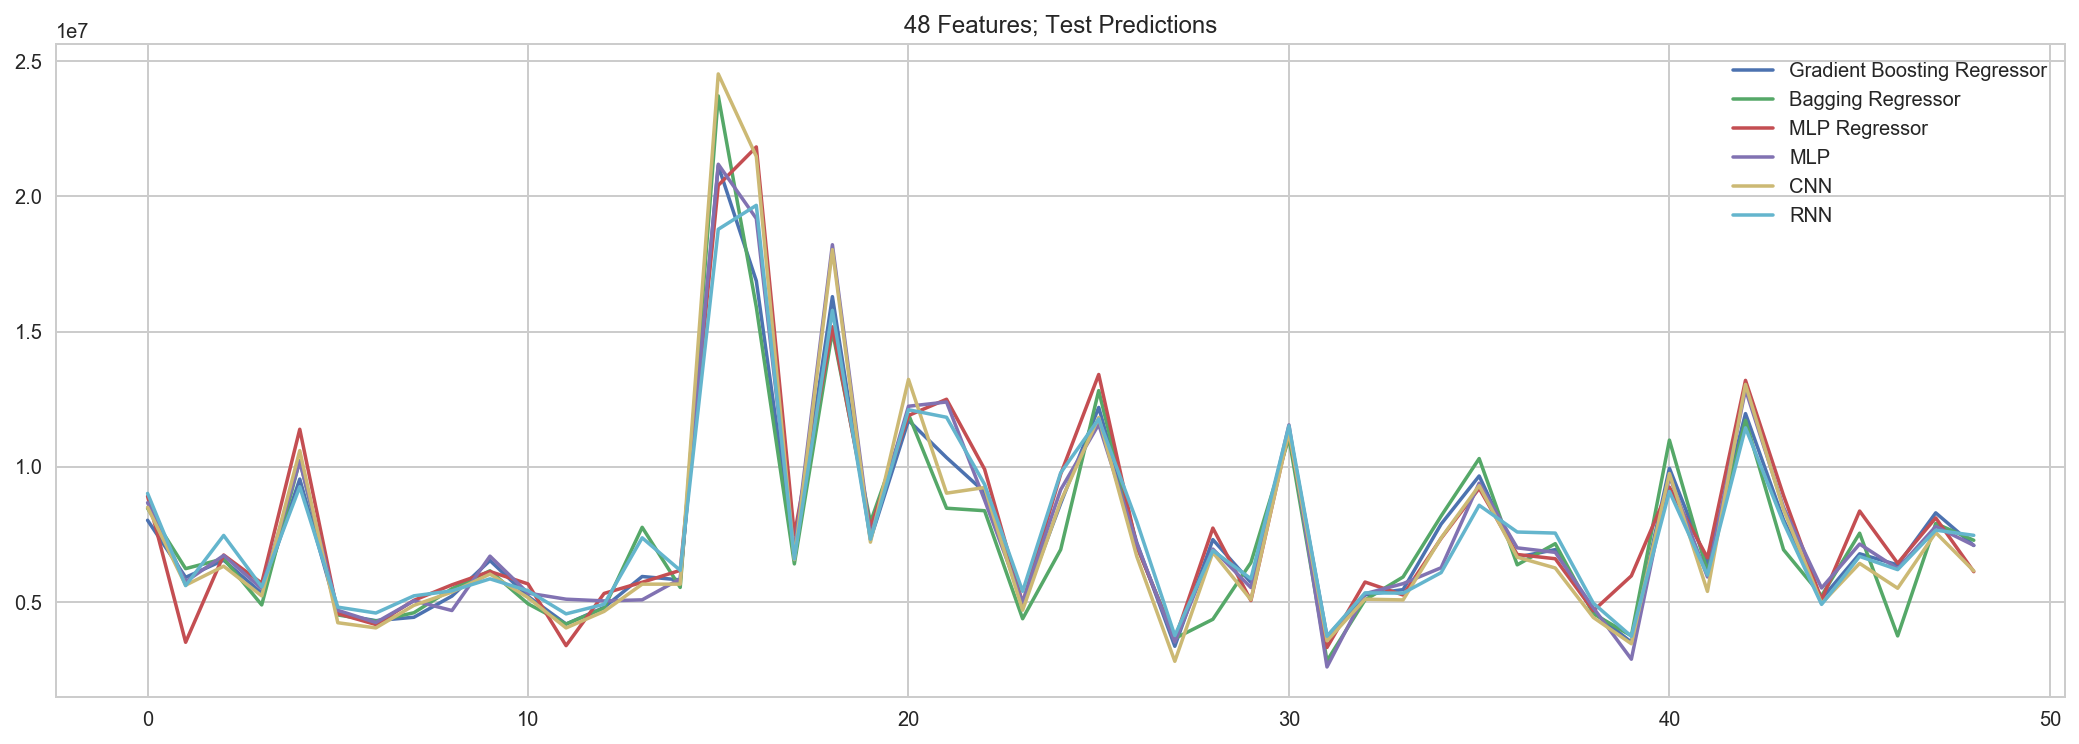

In [341]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_test_predict_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_test_predict_br[1:50], label='Bagging Regressor')
plt.plot(target_test_predict_mlpr[1:50], label='MLP Regressor')

plt.plot(target_test_predict_mlp[1:50], label='MLP')
plt.plot(target_test_predict_cnn[1:50], label='CNN')
plt.plot(target_test_predict_rnn[1:50], label='RNN')

plt.legend()
plt.title("48 Features; Test Predictions");

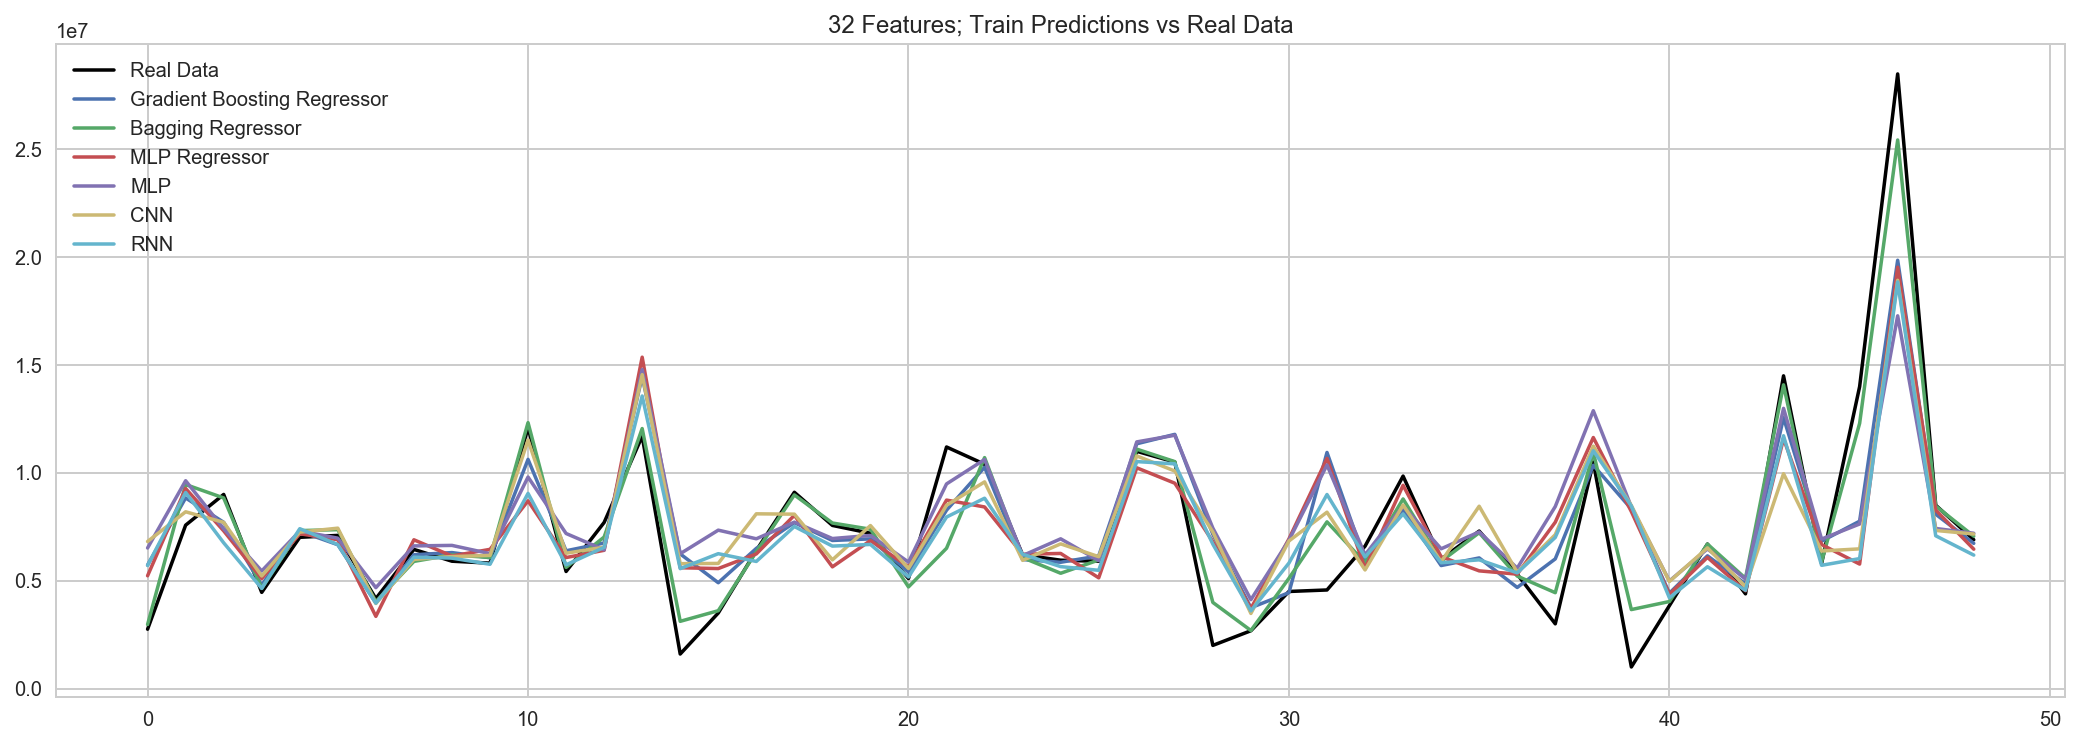

In [342]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_train2[1:50], color = 'black', label='Real Data')

plt.plot(target_train_predict_gbr2[1:50], label='Gradient Boosting Regressor')
plt.plot(target_train_predict_br2[1:50], label='Bagging Regressor')
plt.plot(target_train_predict_mlpr2[1:50], label='MLP Regressor')

plt.plot(target_train_predict_mlp2[1:50], label='MLP')
plt.plot(target_train_predict_cnn2[1:50], label='CNN')
plt.plot(target_train_predict_rnn2[1:50], label='RNN')

plt.legend()
plt.title("32 Features; Train Predictions vs Real Data");

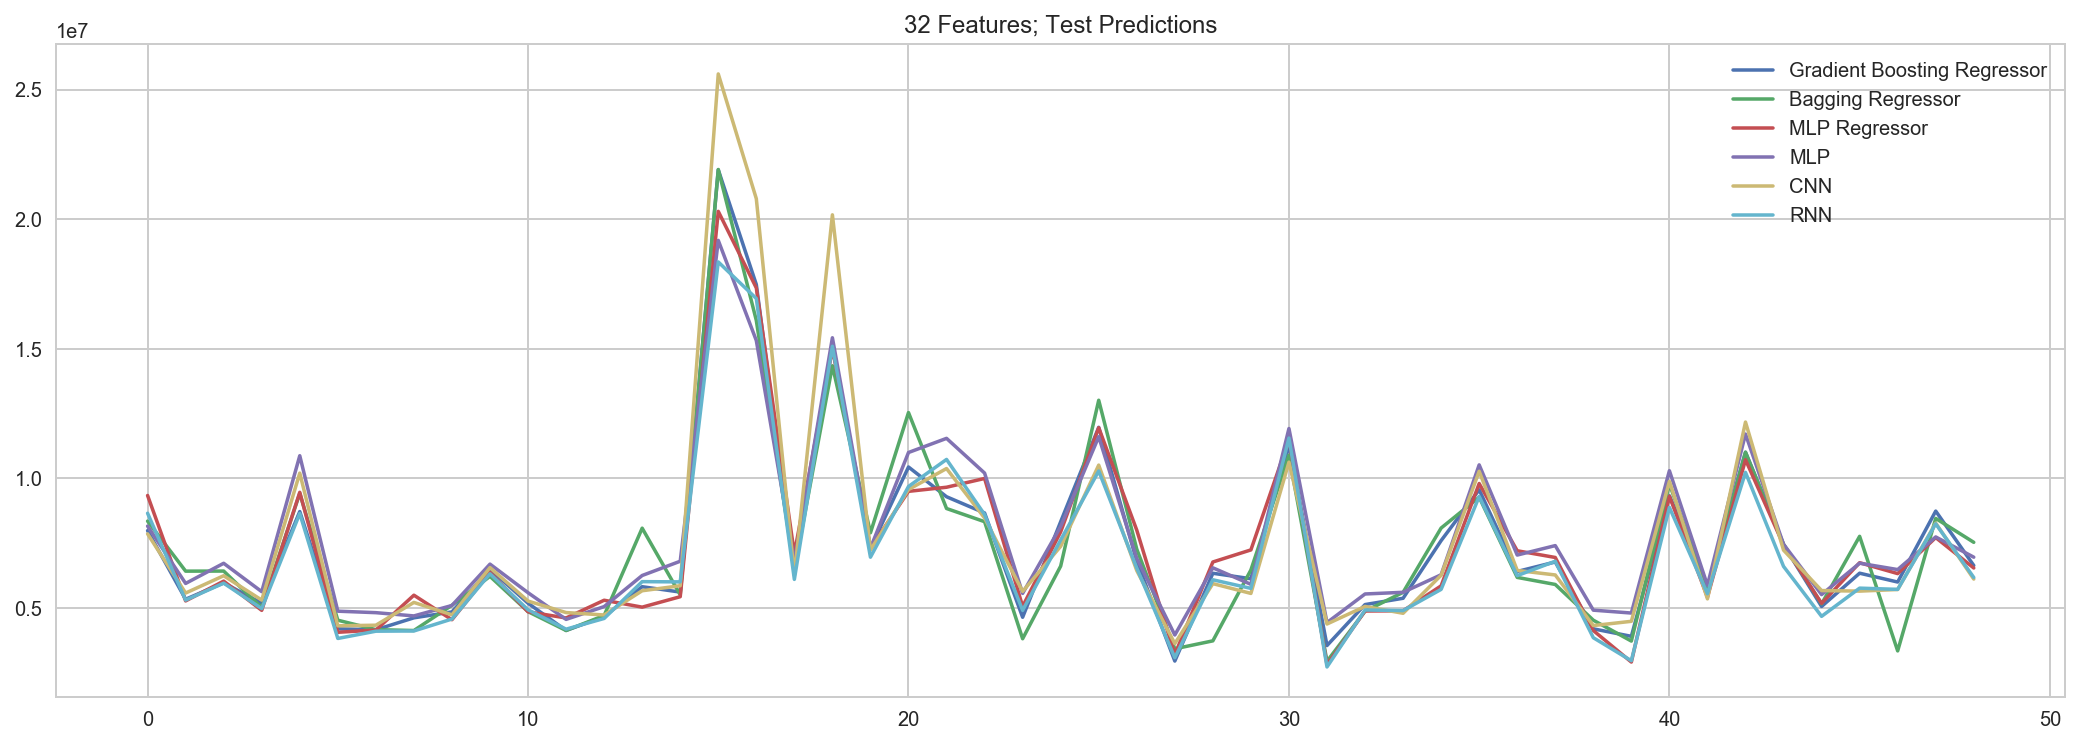

In [343]:
hide_code
plt.figure(figsize = (18, 6))

plt.plot(target_test_predict_gbr2[1:50], label='Gradient Boosting Regressor')
plt.plot(target_test_predict_br2[1:50], label='Bagging Regressor')
plt.plot(target_test_predict_mlpr2[1:50], label='MLP Regressor')

plt.plot(target_test_predict_mlp2[1:50], label='MLP')
plt.plot(target_test_predict_cnn2[1:50], label='CNN')
plt.plot(target_test_predict_rnn2[1:50], label='RNN')

plt.legend()
plt.title("32 Features; Test Predictions");

----
## $\mathfrak {\color{#228B22} {8. \  Project \ Design }}$

The project was built on the basis of the competition offered on the site https://www.kaggle.com. The competition version of this notebook is avalible here: https://www.kaggle.com/olgabelitskaya/sberbank-russian-housing-market . 

There are several popular resources (numpy, pandas, matplotlib, scikit-learn and keras) for regression models were used. 

The most valuable in this project is the study of real data and the attempt to approximate the predictions on them to the threshold of 70-80 percent.